![imagen](./img/1366_2000.jpeg)

# EDA Pokemon 


## Fase 1: Lectura y limpieza.


In [102]:
#Importo las librerías necesarias.
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
import plotly.graph_objects as go 

In [103]:
#Importo el Dataset y le asigno el nombre pokemon.
pokemon = pd.read_csv('./data/pokemon.csv')

### Descripción del Dataset.

- **#:** ID for each Pokémon in Pokedex
- **Name:** Name of each Pokémon
- **Type 1:** Each Pokémon has a type; this determines weakness/resistance to attacks
- **Type 2:** Some Pokémon are dual type and have two types
- **Total:** Sum of all stats that come after this; a general guide to how strong a Pokémon is
- **HP:** Hit points, or health, defines how much damage a Pokémon can withstand before fainting
- **Attack:** The base modifier for normal attacks (e.g., Scratch, Punch)
- **Defense:** The base damage resistance against normal attacks
- **SP Atk:** Special attack, the base modifier for special attacks (e.g., Fire Blast, Bubble Beam)
- **SP Def:** The base damage resistance against special attacks
- **Speed:** Determines which Pokémon attacks first each round

In [104]:
pokemon

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 13 columns]

In [105]:
#Cinco primeros valores del DataFrame. 
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [106]:
#Cinco últimos valores del DataFrame.
pokemon.tail()

#                 Name   Type 1 Type 2  Total  HP  Attack  Defense  \
795  719              Diancie     Rock  Fairy    600  50     100      150   
796  719  DiancieMega Diancie     Rock  Fairy    700  50     160      110   
797  720  HoopaHoopa Confined  Psychic  Ghost    600  80     110       60   
798  720   HoopaHoopa Unbound  Psychic   Dark    680  80     160       60   
799  721            Volcanion     Fire  Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True

In [107]:
#Información del DataFrame. 
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [108]:
#Descripción de estadísticas generales.
pokemon.describe(include = 'all')

#                 Name Type 1  Type 2      Total          HP  \
count   800.000000                  800    800     414  800.00000  800.000000   
unique         NaN                  800     18      18        NaN         NaN   
top            NaN  PumpkabooSuper Size  Water  Flying        NaN         NaN   
freq           NaN                    1    112      97        NaN         NaN   
mean    362.813750                  NaN    NaN     NaN  435.10250   69.258750   
std     208.343798                  NaN    NaN     NaN  119.96304   25.534669   
min       1.000000                  NaN    NaN     NaN  180.00000    1.000000   
25%     184.750000                  NaN    NaN     NaN  330.00000   50.000000   
50%     364.500000                  NaN    NaN     NaN  450.00000   65.000000   
75%     539.250000                  NaN    NaN     NaN  515.00000   80.000000   
max     721.000000                  NaN    NaN     NaN  780.00000  255.000000   

            Attack     Defense     Sp. Atk     Sp. Def       Speed  \
count   800.000000  800.000000  800.000000  800.000000  800.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     79.001250   73.842500   72.820000   71.902500   68.277500   
std      32.457366   31.183501   32.722294   27.828916   29.060474   
min       5.000000    5.000000   10.000000   20.000000    5.000000   
25%      55.000000   50.000000   49.750000   50.000000   45.000000   
50%      75.000000   70.000000   65.000000   70.000000   65.000000   
75%     100.000000   90.000000   95.000000   90.000000   90.000000   
max     190.000000  230.000000  194.000000  230.000000  180.000000   

        Generation Legendary  
count    800.00000       800  
unique         NaN         2  
top            NaN     False  
freq           NaN       735  
mean       3.32375       NaN  
std        1.66129       NaN  
min        1.00000       NaN  
25%        2.00000       NaN  
50%        3.00000       NaN  
75%        5.00000       NaN  
max        6.00000       NaN

In [109]:
#Compruebo el nombre de las columnas y su correcta legibilidad (ausencia de espacios o caracteres raros).
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [110]:
#Tamaño del DataFrame.
pokemon.shape

(800, 13)

In [111]:
#La columna con el nombre '#' que corresponde a la posición en la Pokédex no me aporta nada, así que la elimino de forma definitiva con drop(inplace=True).
pokemon.drop('#', axis='columns', inplace=True)

In [112]:
#Recuento de valores únicos.
pokemon.value_counts()

Name                     Type 1  Type 2  Total  HP   Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
Zygarde50% Forme         Dragon  Ground  600    108  100     121      81       95       95     6           True         1
Abomasnow                Grass   Ice     494    90   92      75       92       85       60     4           False        1
AbomasnowMega Abomasnow  Grass   Ice     594    90   132     105      132      105      30     4           False        1
AegislashBlade Forme     Steel   Ghost   520    60   150     50       150      50       60     6           False        1
AegislashShield Forme    Steel   Ghost   520    60   50      150      50       150      60     6           False        1
                                                                                                                       ..
Articuno                 Ice     Flying  580    90   85      100      95       125      85     1           True         1
Aron                     Stee

Text(0.5, 1.0, '(Heatmap)')

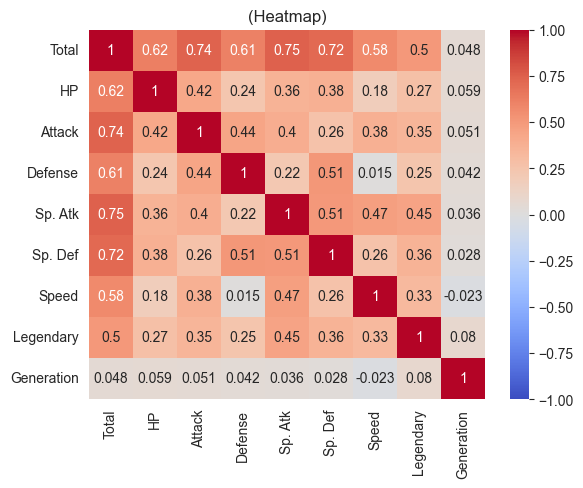

In [113]:

#Visual de Correlaciones(Heatmap). 
sns.heatmap(pokemon[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed', 'Legendary','Generation']].corr(), annot=True, cmap="coolwarm", vmin=-1)
plt.title('(Heatmap)')


In [114]:
#Comprobación de valores nulos (hay bastantes en type 2)
pokemon.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

<Axes: >

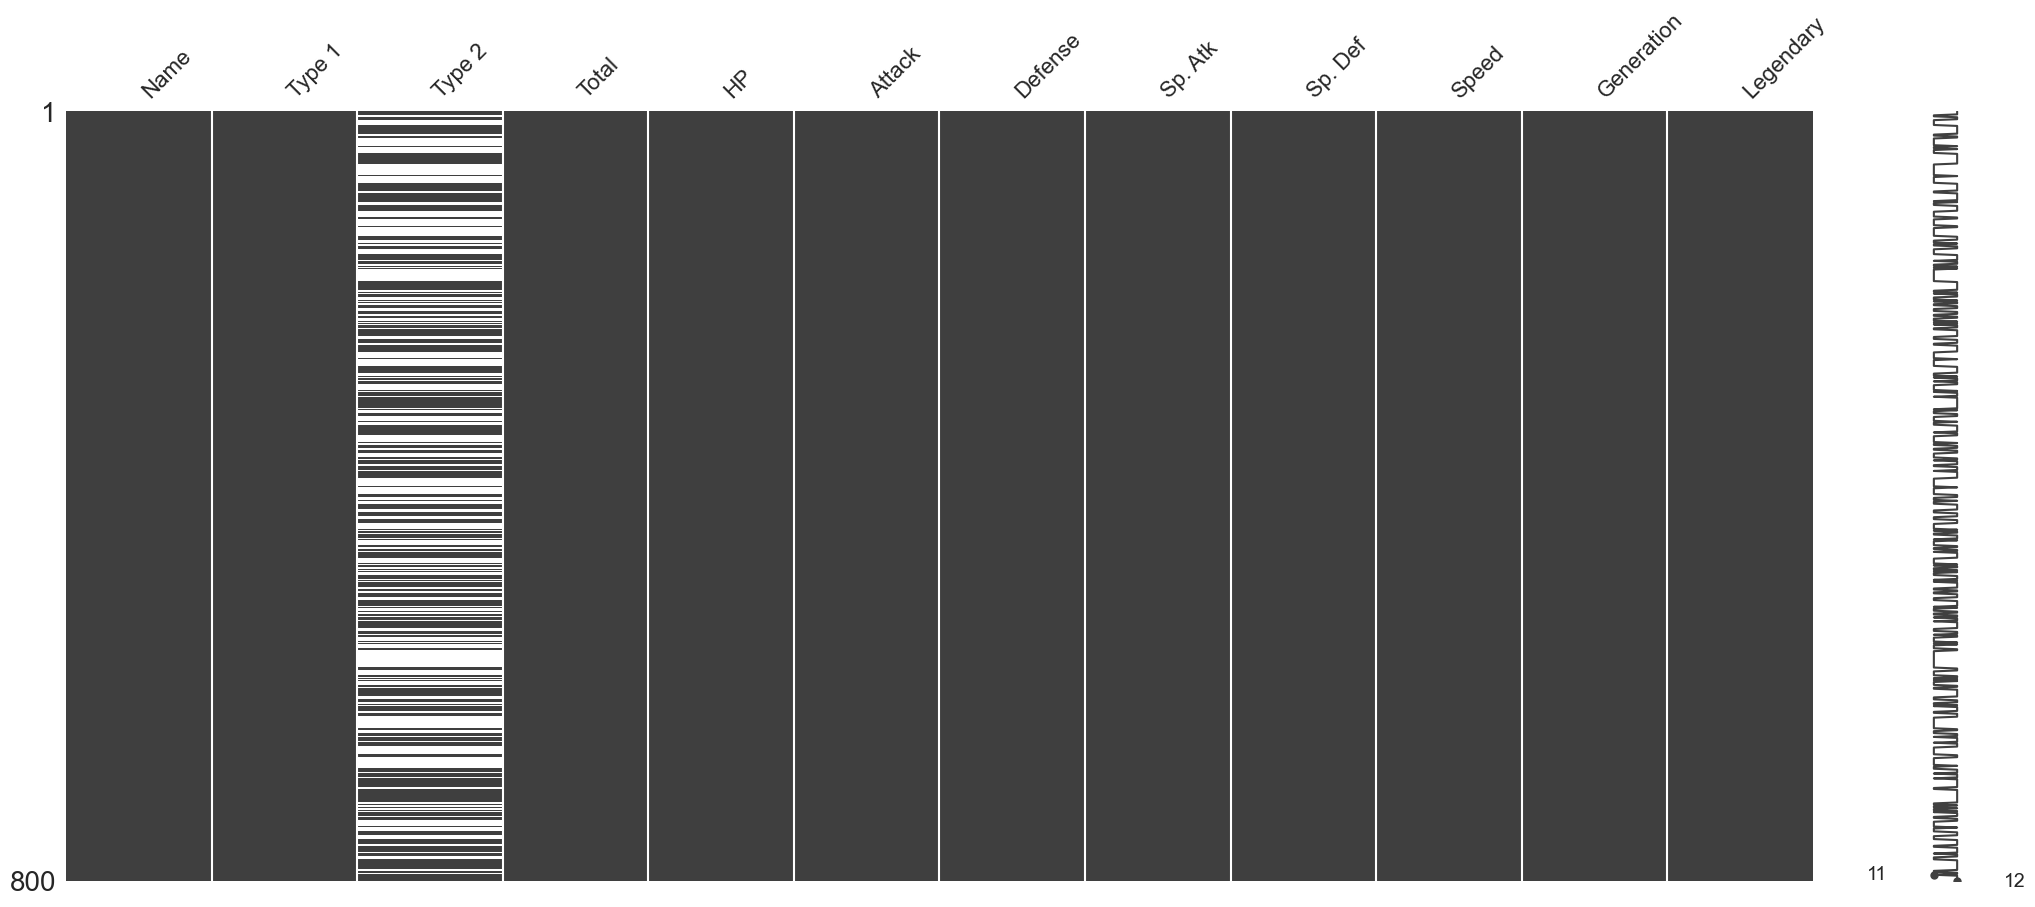

In [115]:
#Visualizo los valores nulos.
msno.matrix(pokemon)

In [116]:
#Le asigno una letra a los nulos de la columna tipo 2 para que no molesten.
pokemon['Type 2'].fillna('x', inplace=True);

C:\Users\borja\AppData\Local\Temp\ipykernel_15456\3842868730.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





---

###  x Outliers x 
Visualizo los cuartiles y valores átipicos de las columnas 'Total', 'Attack', 'HP' y 'Defense'.

Text(0.5, 1.0, 'Valores átipicos en Total')

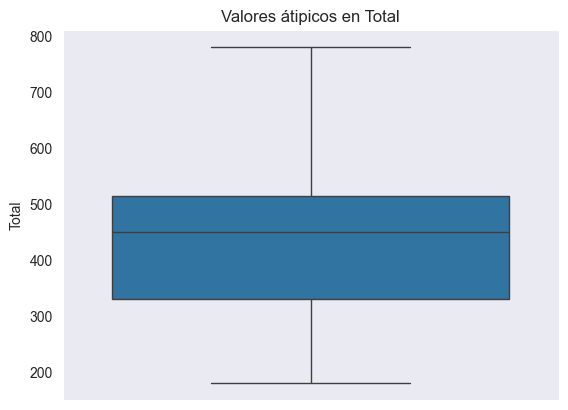

In [117]:
sns.boxplot(pokemon, y='Total')
plt.title('Valores átipicos en Total')

Text(0.5, 1.0, 'Valores átipicos en ataque')

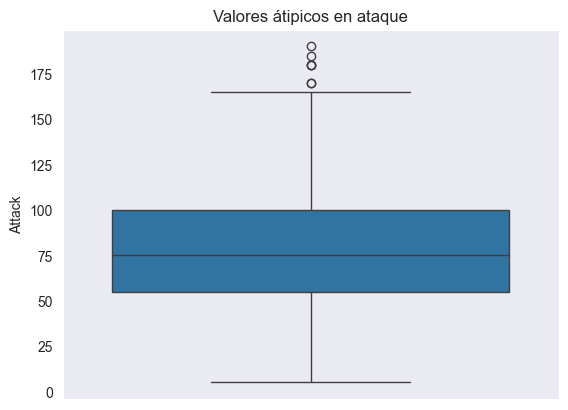

In [118]:
sns.boxplot(pokemon, y='Attack')
plt.title('Valores átipicos en ataque')

Text(0.5, 1.0, 'Valores átipicos de vida')

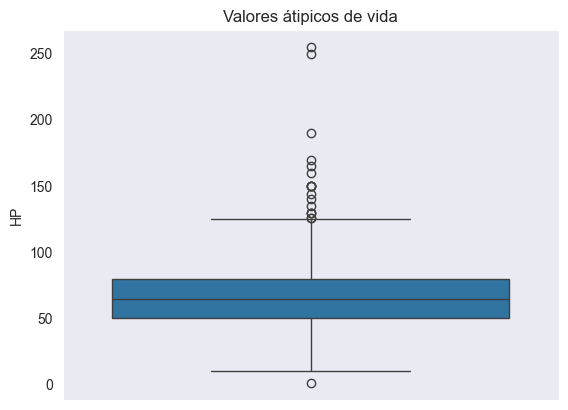

In [119]:
sns.boxplot(pokemon, y='HP')
plt.title('Valores átipicos de vida')

Text(0.5, 1.0, 'Valores átipicos en defensa')

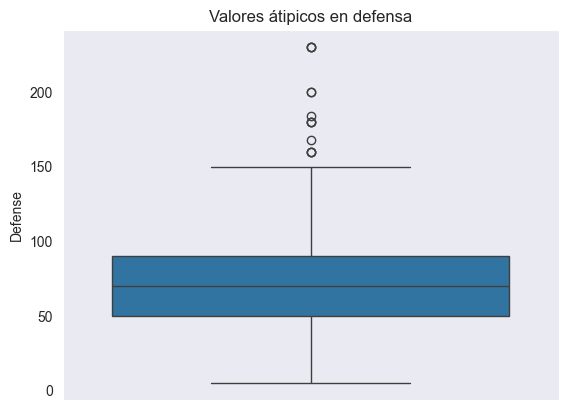

In [120]:
sns.boxplot(pokemon, y='Defense')
plt.title('Valores átipicos en defensa')

Tengo varios valores atípicos, pero, al tratarse de estadísticas de personajes de un juego, decido dejarlos, ya que en este caso no los considero realmente **outliers**. Sin embargo, existe uno que sí me llama la atención, ya que en **HP** (vida) veo un valor atípico muy cercano a cero. De hecho, encuentro un Pokémon con **HP = 1**, así que decido investigarlo y descubro a un Pokémon llamado **Shedinja**.  

**Shedinja** es una evolución de **Nincada** que aparece cuando dicho Pokémon evoluciona para convertirse en **Ninjask**. Al hacerlo, se crea una **Pokébola** extra en el inventario del jugador con un Pokémon llamado Shedinja en su interior.  

**Shedinja** es un Pokémon muy peculiar: no mueve ninguna parte de su cuerpo, ni siquiera para respirar. Este Pokémon se mantiene flotando en el aire sin mover las alas; simplemente levita. Se podría decir que representa la parte de Nincada que no ha evolucionado o la pequeña parte que "muere" de un Pokémon al evolucionar.




---

## Fase 2: Análisis y visualización.

In [121]:
#Preparo una función para una visualización de estilo videojuego que usaré en cada categoría.
def PokeFightfull(pokemon, *pokemons):
    def get_stats(df, name):
        poke = df[df["Name"] == name]
        if poke.empty:
            raise ValueError(f"Pokémon {name} no encontrado.")
        return [
            poke['HP'].values[0],
            poke['Attack'].values[0],
            poke['Defense'].values[0],
            poke['Sp. Atk'].values[0],
            poke['Sp. Def'].values[0],
            poke['Speed'].values[0],
            poke['HP'].values[0]
        ]

    traces = []
    for name in pokemons:
        trace = go.Scatterpolar(
            r=get_stats(pokemon, name),
            theta=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP'],
            fill='toself',
            name=name
        )
        traces.append(trace)

    layout = go.Layout(
        title="Pokémons' Performance",
        polar=dict(
            radialaxis=dict(visible=True)
        ),
        showlegend=True
    )

    fig = go.Figure(data=traces, layout=layout)
    fig.show()

---

###  x Generation x
Análisis agrupados por generación.

In [122]:
#¿Cuántas generaciones hay?
pokemon['Generation'].nunique()

6

In [123]:
#¿Cuántos Pokémon por cada generación?
pokemon['Generation'].value_counts()

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

In [124]:
#Añado un estilo general.
sns.set_style('dark')

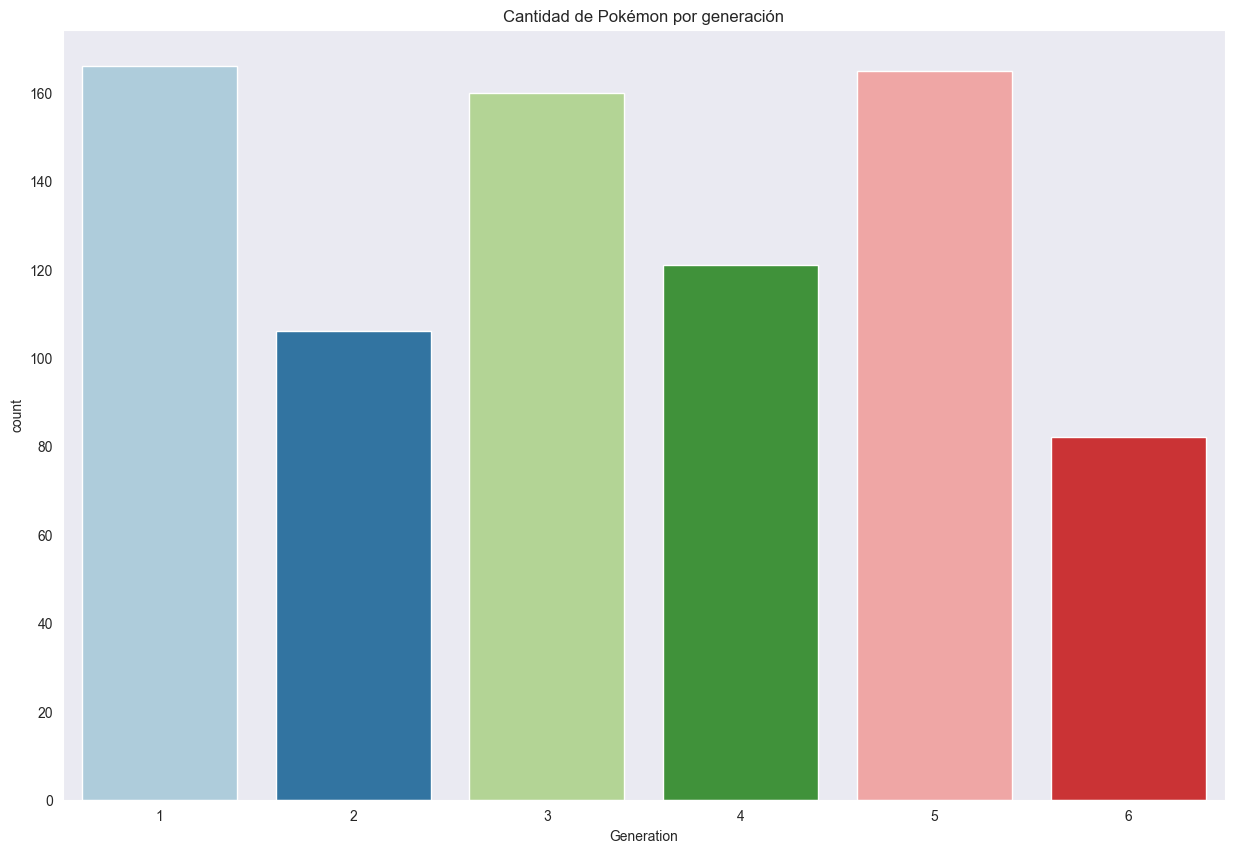

In [125]:
#Visualización 'count' por generación.
plt.figure(figsize=(15,10))
sns.countplot(x='Generation', data=pokemon, hue='Generation', palette='Paired', legend=False)
plt.title('Cantidad de Pokémon por generación')


plt.show()

In [126]:
#Selección de colores para diagrama de dispersión por generación.

palette_generation = {
    1: '#0865de',      
    2: '#08d8de',     
    3: '#de0859',       
    4: '#d108de',    
    5: '#de8d08',    
    6: '#272625',           
}


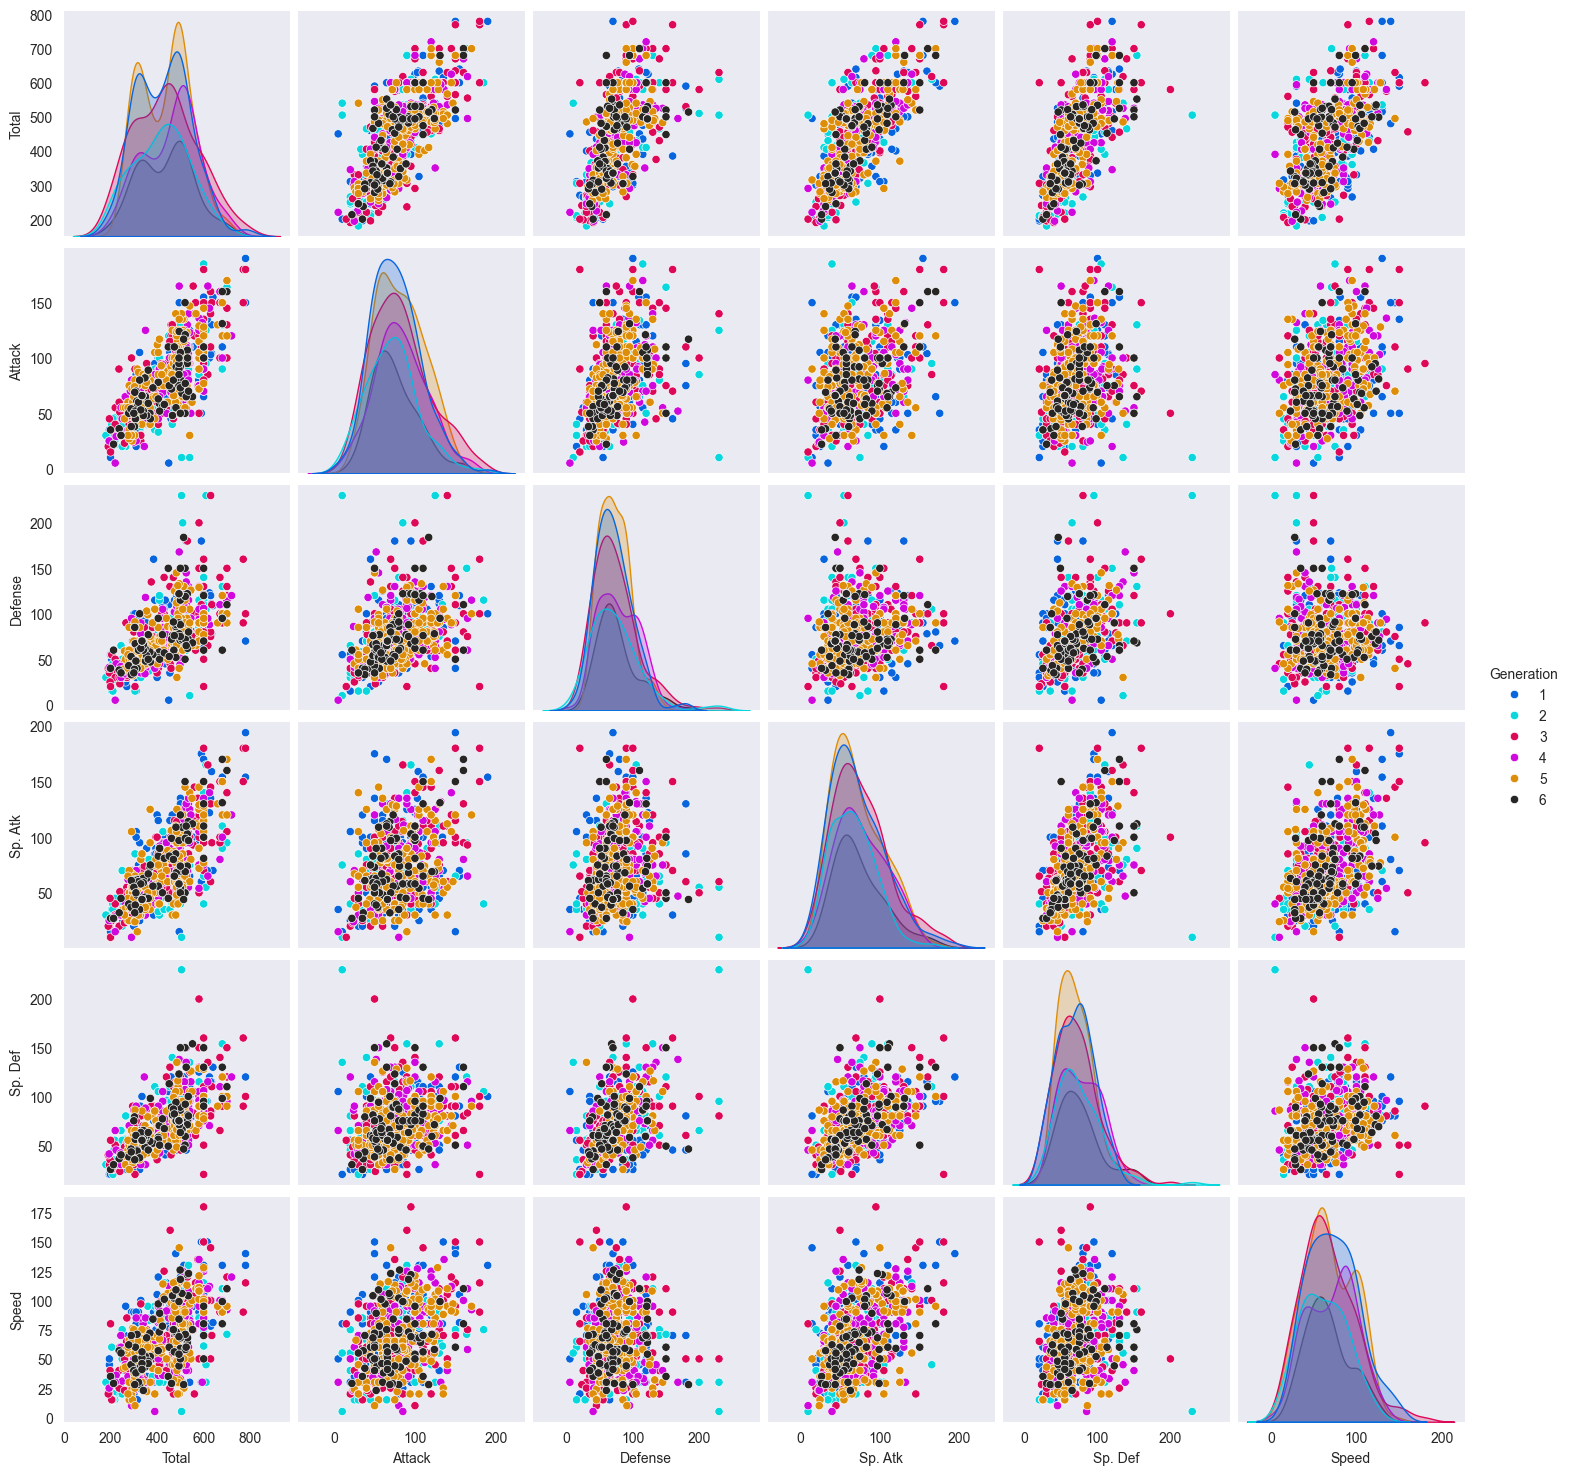

In [127]:
#Diagrama de dispersión para el análisis de las relaciones entre variables y su correlación por generación. 
sns.pairplot(pokemon, vars=['Total','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], hue='Generation', palette=palette_generation)
plt.show()


Como podemos observar al analizar la correlación entre generaciones:

- **Total vs. Attack, Defense, Sp. Atk, Sp. Def, Speed**: Hay una correlación positiva entre el Total y cada una de las otras estadísticas, lo que indica que a medida que aumenta el Total, también lo hacen las otras estadísticas.
- **Attack vs. Defense, Sp. Atk, Sp. Def, Speed**: Hay una correlación positiva entre Attack y las otras estadísticas, aunque la correlación con Speed parece ser más débil.
- **Defense vs. Sp. Atk, Sp. Def, Speed**: Defense muestra una correlación positiva con Sp. Atk y Sp. Def, pero una correlación más débil con Speed.
- **Sp. Atk vs. Sp. Def, Speed**: Sp. Atk tiene una correlación positiva con Sp. Def y Speed.
- **Sp. Def vs. Speed**: Sp. Def muestra una correlación positiva con Speed.

- **Generaciones 1 y 3 destacan en términos generales**:
Estas generaciones tienen una presencia notable en varias estadísticas, lo que sugiere que incluyen Pokémon con atributos equilibrados y sólidos.

- **Generación 2 sobresale en defensa**:
Los gráficos muestran que los Pokémon de la Generación 2 tienen una alta defensa en comparación con otras estadísticas, destacándolos en este aspecto particular.

- **Generaciones 4 y 5 se mantienen en un plano más modesto**:
Estas generaciones parecen tener estadísticas menos sobresalientes en comparación con las otras, manteniéndose más equilibradas pero sin destacar en ninguna estadística específica.


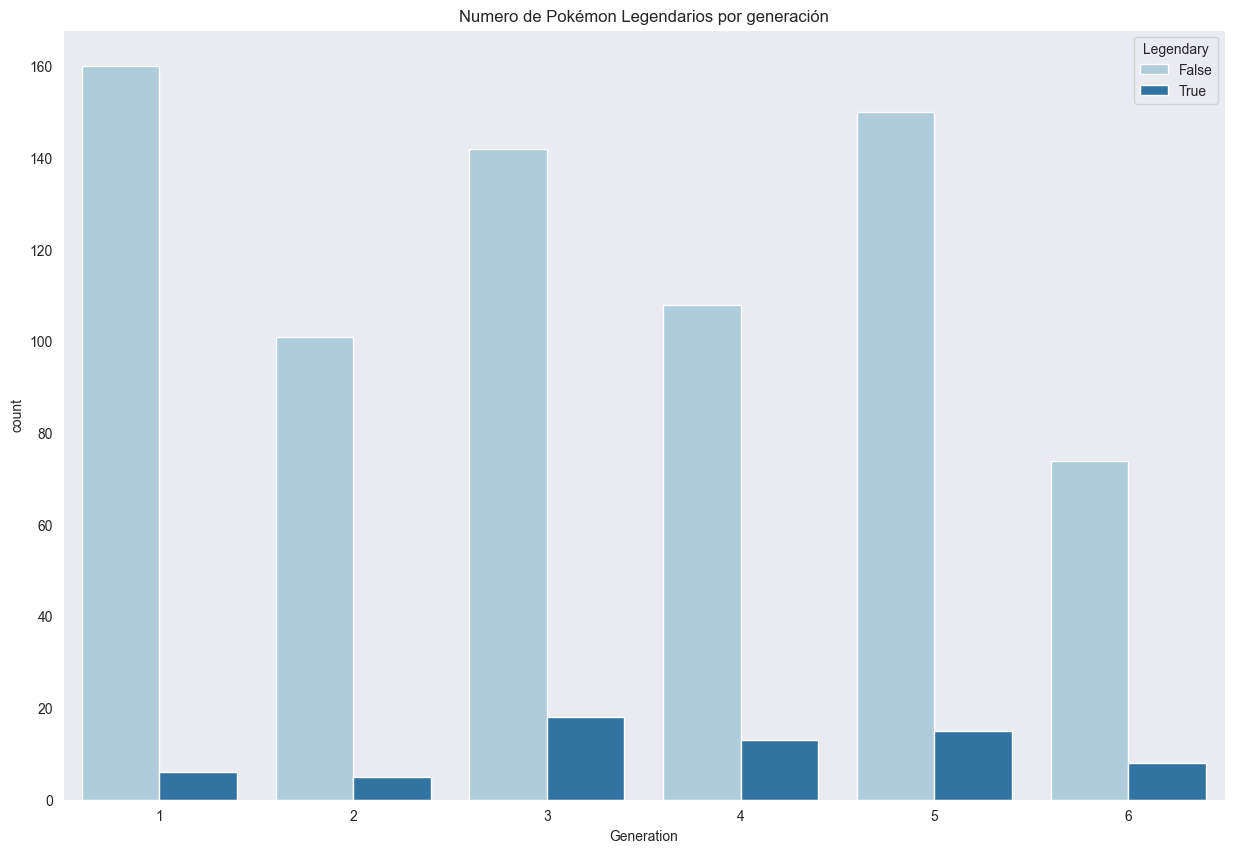

In [128]:
#Numero de Pokémon Legendarios por generación.
plt.figure(figsize=(15,10))
sns.countplot(x='Generation', data=pokemon, hue='Legendary', palette='Paired')
plt.title('Numero de Pokémon Legendarios por generación')
plt.show()


 Como podemos observar, en las generaciones 3, 4 y 5 hay un mayor número de Pokémon legendarios, 
siendo la tercera generación la que cuenta con la mayor cantidad. Por lo tanto, si buscamos un Pokémon 
legendario que se adapte a nuestras necesidades, las posibilidades de encontrarlo en dicha generación son mayores

In [129]:
#Los Pokémon más fuertes por generación.  
generation_best = pokemon.iloc[[163,268,426,552,711,796]].sort_values('Generation')
generation_best



Name   Type 1    Type 2  Total   HP  Attack  Defense  \
163      MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   
268  TyranitarMega Tyranitar     Rock      Dark    700  100     164      150   
426    RayquazaMega Rayquaza   Dragon    Flying    780  105     180      100   
552                   Arceus   Normal         x    720  120     120      120   
711       KyuremBlack Kyurem   Dragon       Ice    700  125     170      100   
796      DiancieMega Diancie     Rock     Fairy    700   50     160      110   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
163      154      100    130           1       True  
268       95      120     71           2      False  
426      180      100    115           3       True  
552      120      120    120           4       True  
711      120       90     95           5       True  
796      160      110    110           6       True

Text(0.5, 1.0, 'Pokémon con la vida más alta por generación')

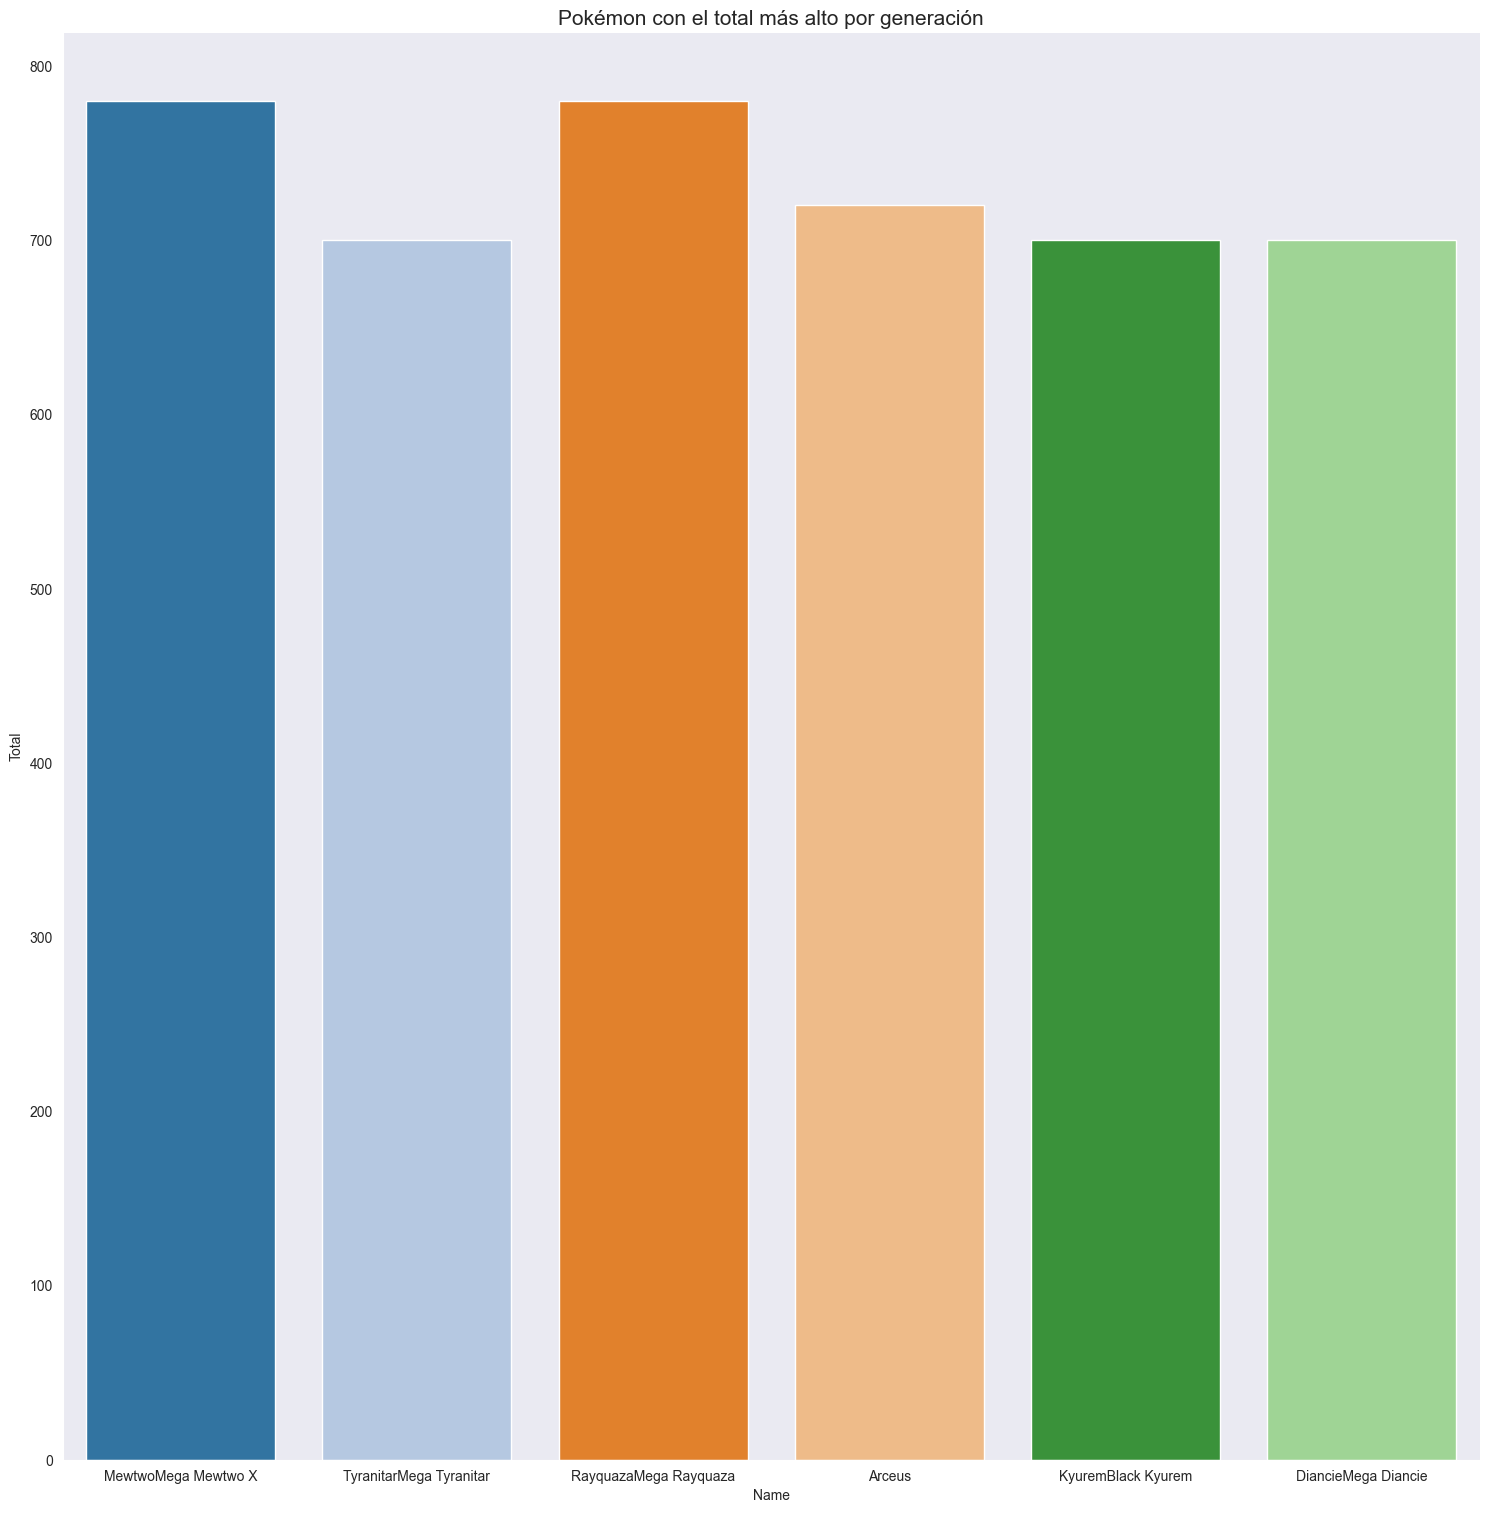

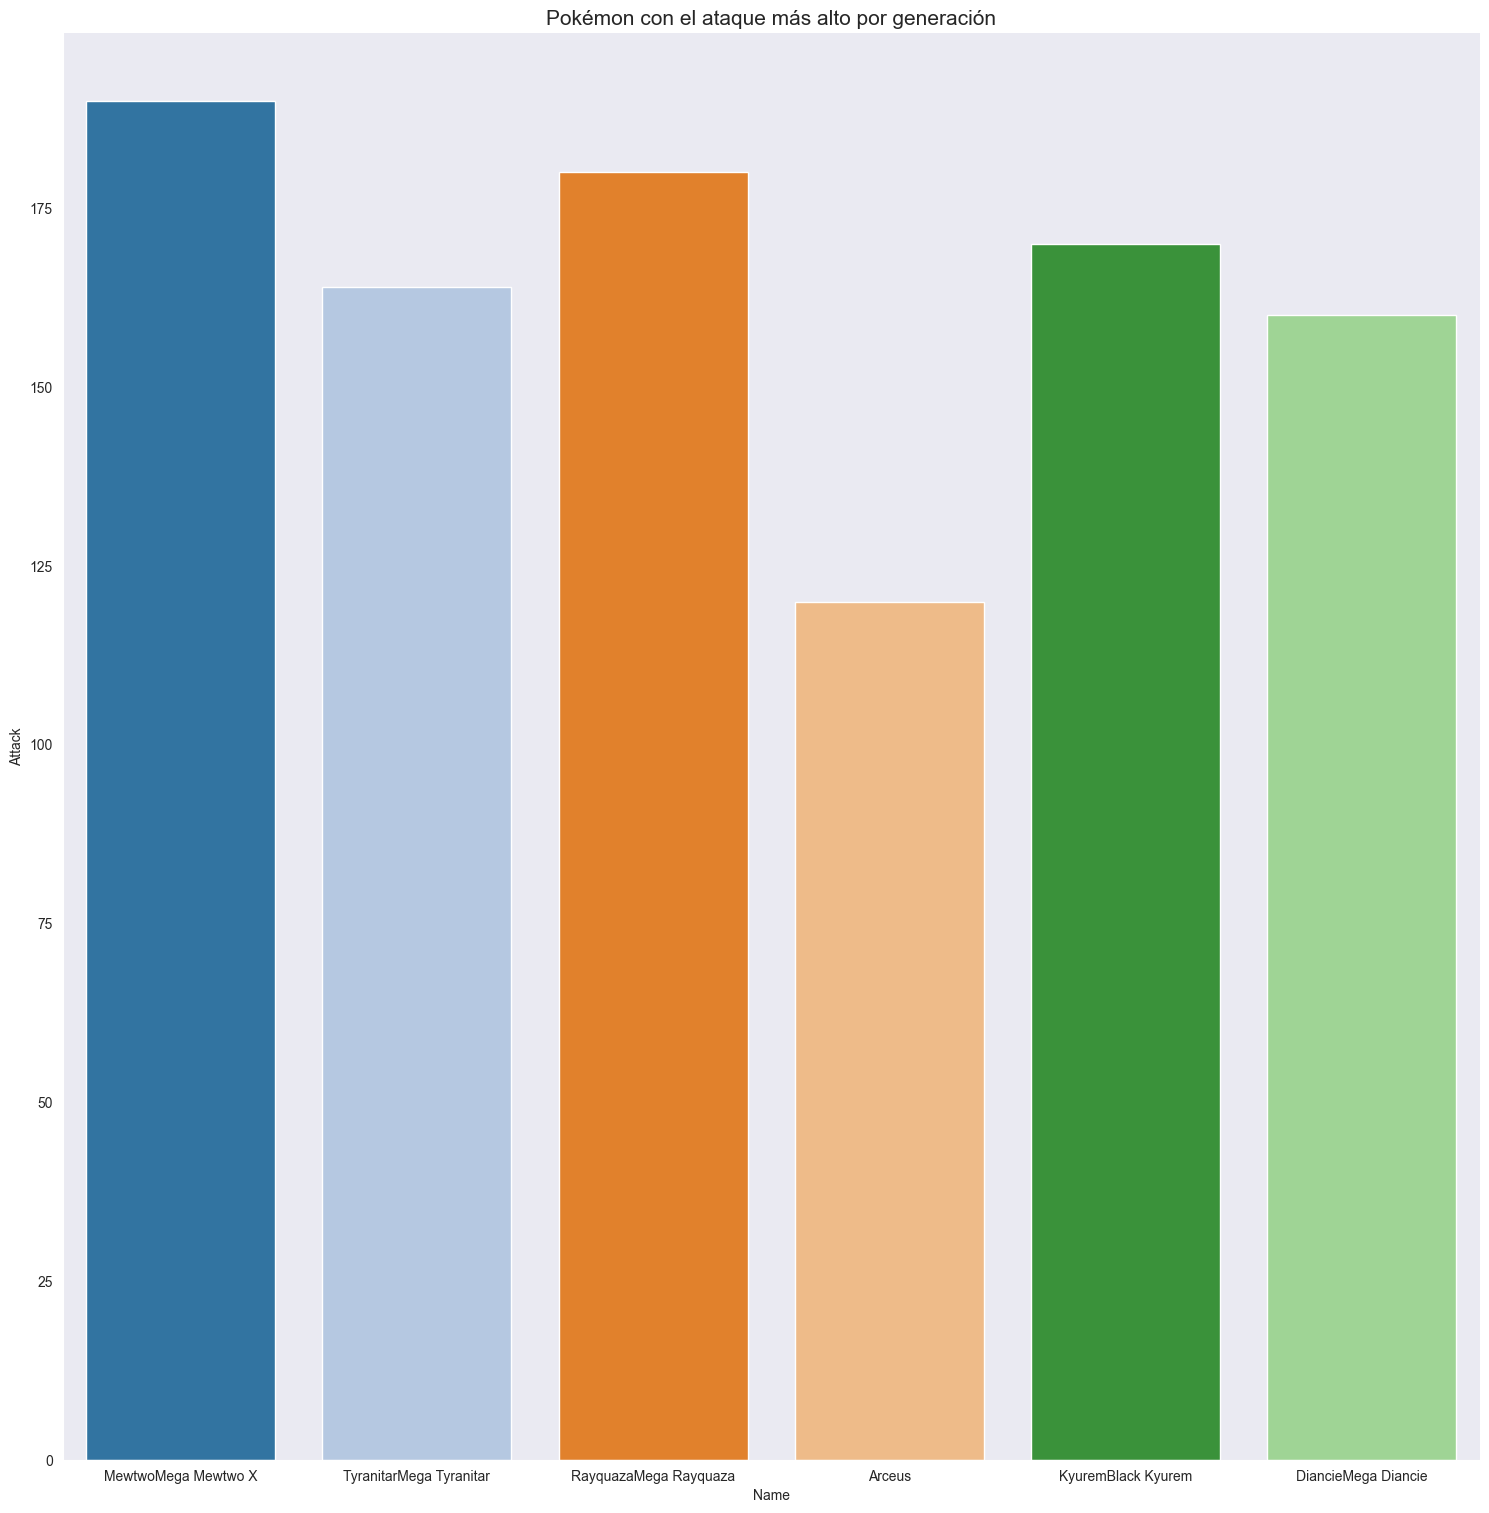

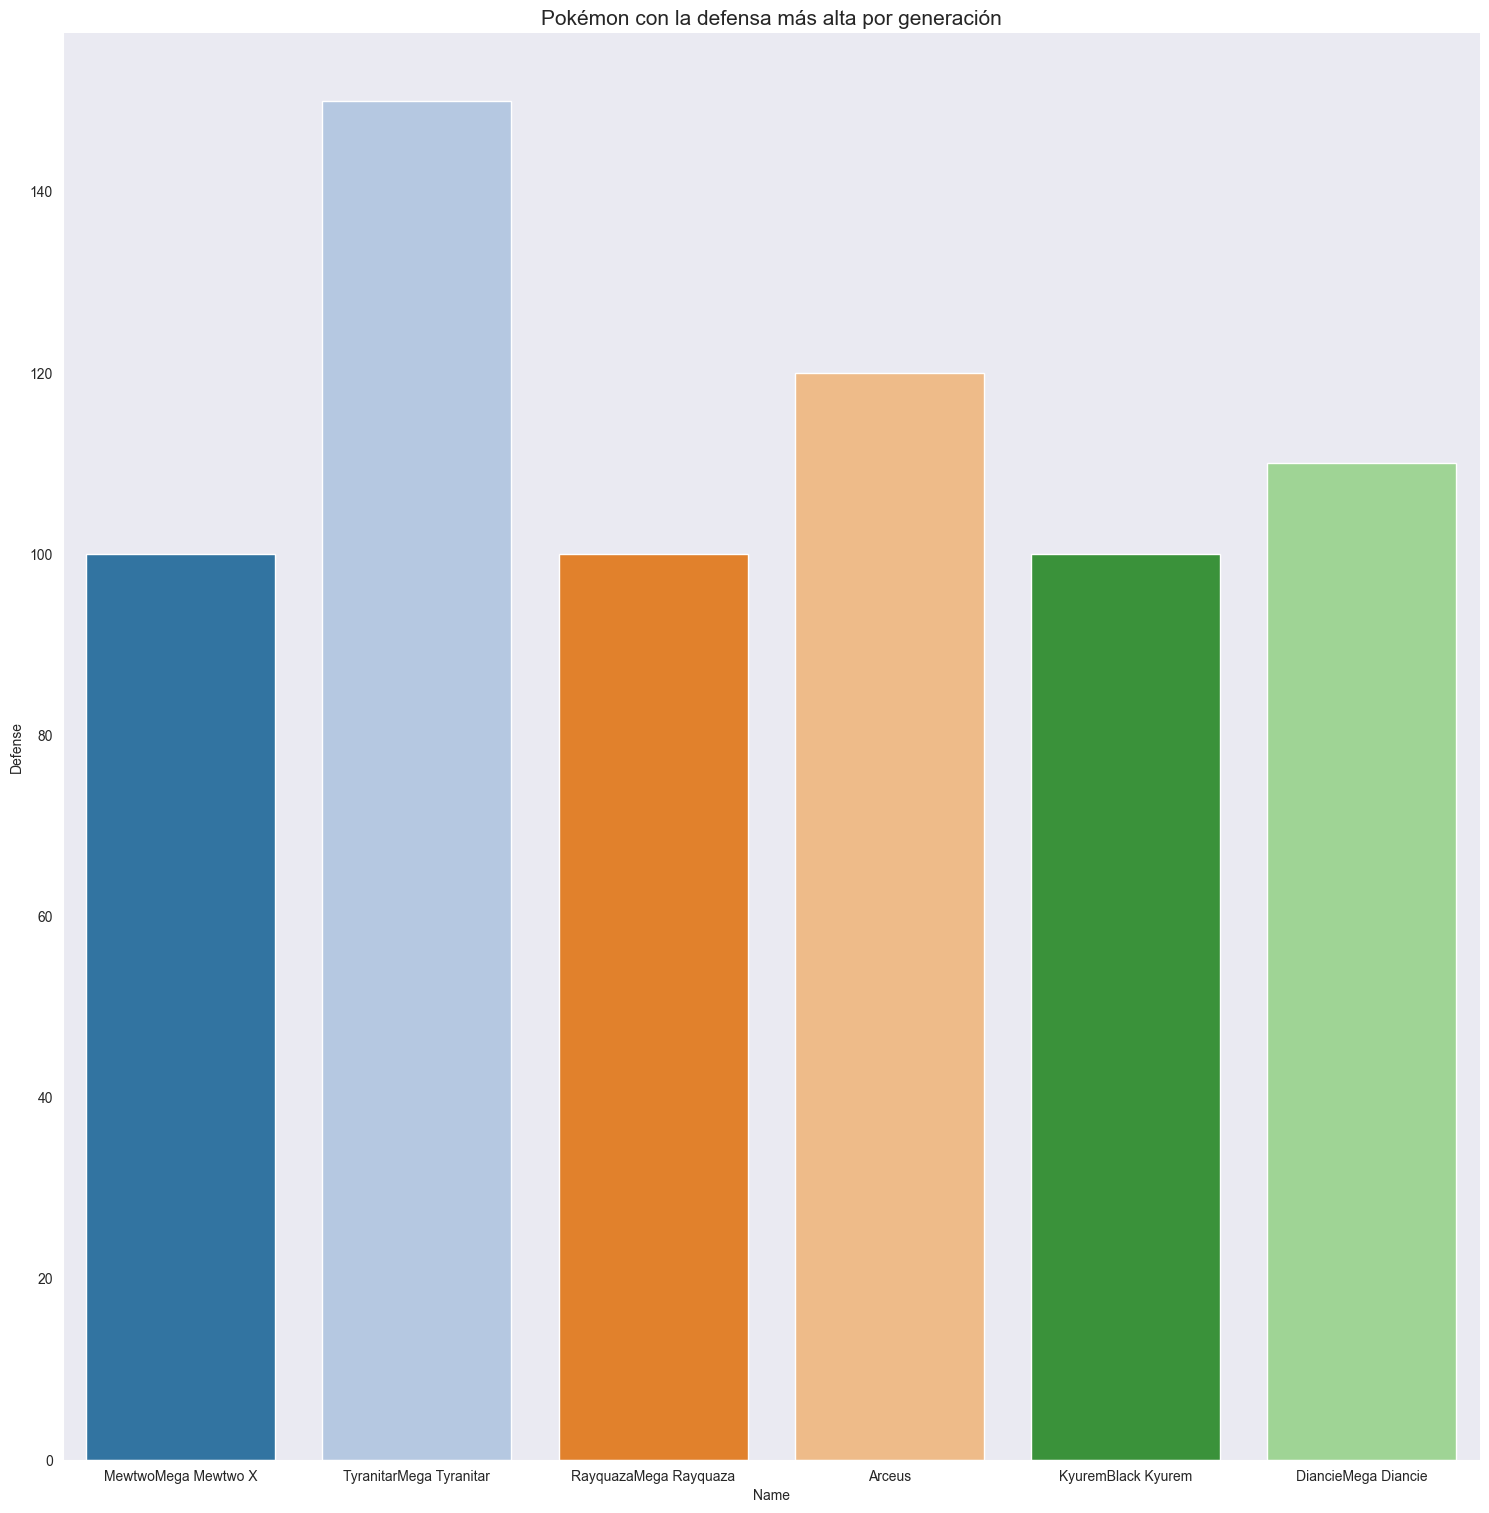

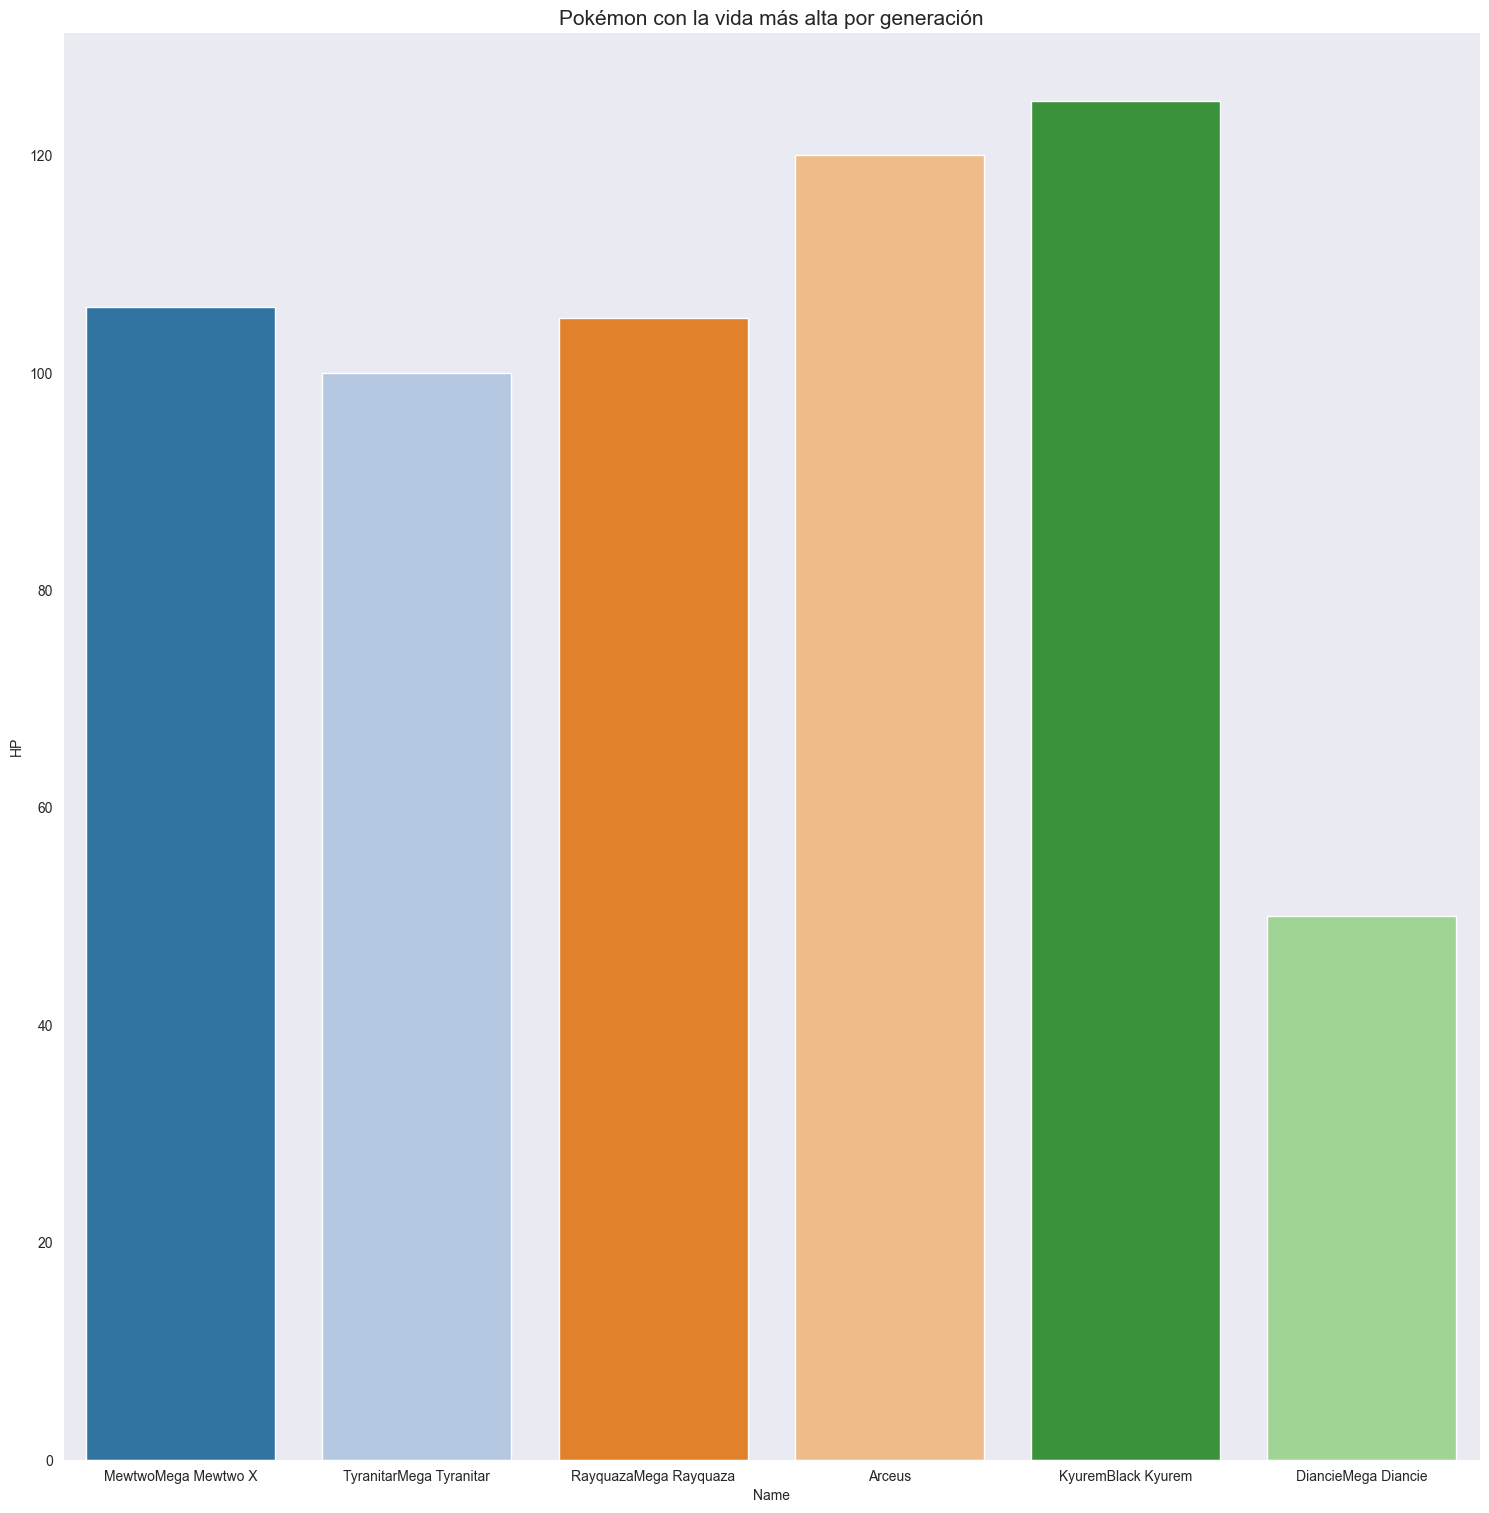

In [130]:
#Visualización de los pokémon más fuertes por generación.

sns.catplot(generation_best, x='Name', y='Total', palette='tab20',hue='Name', kind="bar",height = 15) 
plt.title('Pokémon con el total más alto por generación',fontsize=15)
sns.catplot(generation_best, x='Name', y='Attack', hue='Name', palette='tab20', kind="bar",height = 15)
plt.title('Pokémon con el ataque más alto por generación' , fontsize=15)
sns.catplot(generation_best, x='Name', y='Defense', hue='Name', palette='tab20', kind="bar",height = 15)
plt.title('Pokémon con la defensa más alta por generación', fontsize=15)
sns.catplot(generation_best, x='Name', y='HP', hue='Name', palette='tab20', kind="bar",height = 15)
plt.title('Pokémon con la vida más alta por generación', fontsize=15)






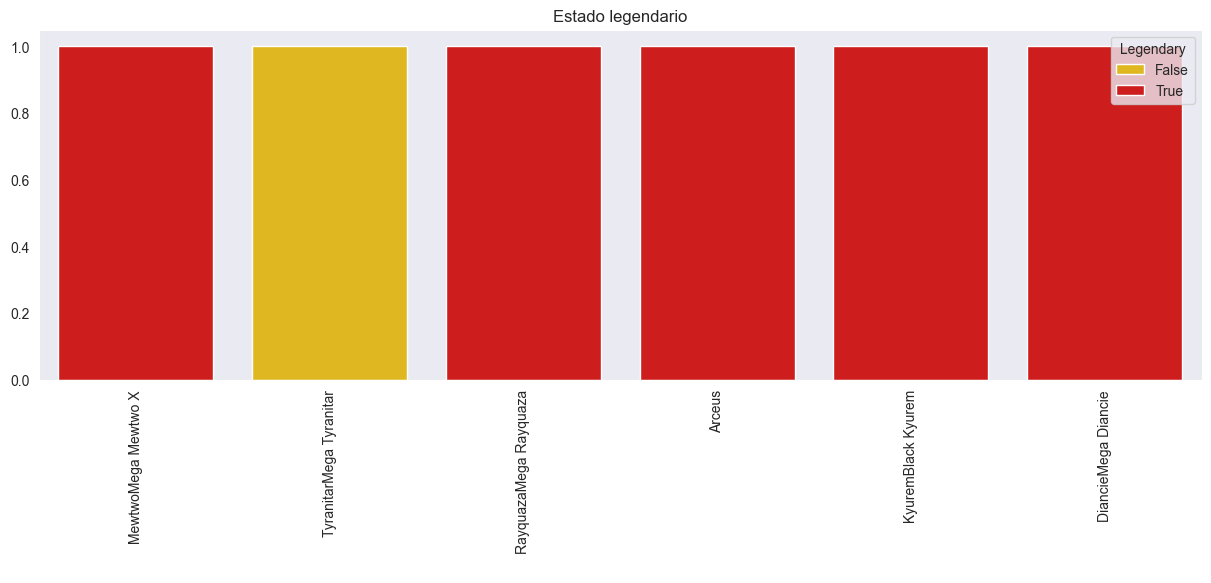

In [131]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 2)
sns.countplot(data=generation_best, x='Name', hue='Legendary', palette='hot_r', )
plt.xticks(rotation = 90)
plt.title('Estado legendario')
plt.xlabel(' ')
plt.ylabel('')
plt.show()

En todas las generaciones menos en la 2º, el Pokémon más fuerte es un legendario, lo cual nos lleva a afirmar que en el 90% de los casos, el Pokémon más fuerte por cada generación también será legendario.

In [132]:
#Comparativa de estadisticas de los Pokémon seleccionados.
PokeFightfull(pokemon, 'MewtwoMega Mewtwo X', 'TyranitarMega Tyranitar', 'RayquazaMega Rayquaza', 'Arceus', 'KyuremBlack Kyurem', 'DiancieMega Diancie')
plt.show()


---

###  x Type x
Análisis agrupados por tipo.

In [133]:

#¿Cuántos tipos de Pokémon existen?
pokemon['Type 1'].nunique()

18

In [134]:
#¿Cuántos Pokémon por tipo existen?
pokemon['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [135]:
#Creo la variable de control que usaré para ordenar algunos visuales.
type_counts = pokemon['Type 1'].value_counts()

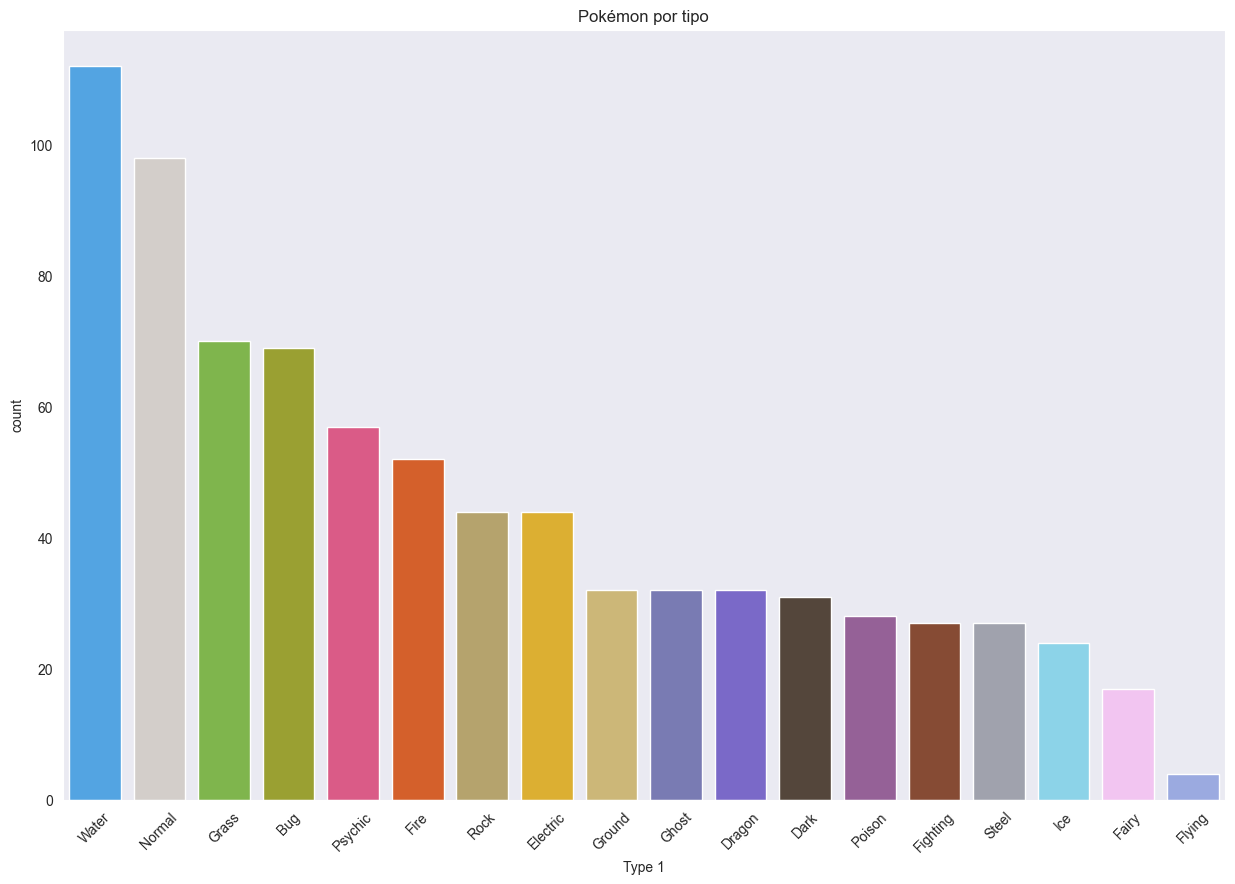

In [136]:
#Visualizacion del numero de Pokémon por tipo.
plt.figure(figsize=(15,10))
sns.countplot(x='Type 1',hue='Type 1' , order=type_counts.index , data=pokemon, palette=['#7ec63c','#f0560f','#3ba7fa','#aab31f','#d5cec8','#9e58a0','#f8bc16','#dabe6a','#f9bef8','#944526','#ef4681','#c1a961','#6f72bd','#7ddbf7','#7059d8','#584537','#9ea0af','#8fa3ec'])
plt.title('Pokémon por tipo')
plt.xticks(rotation = 45)
plt.show()

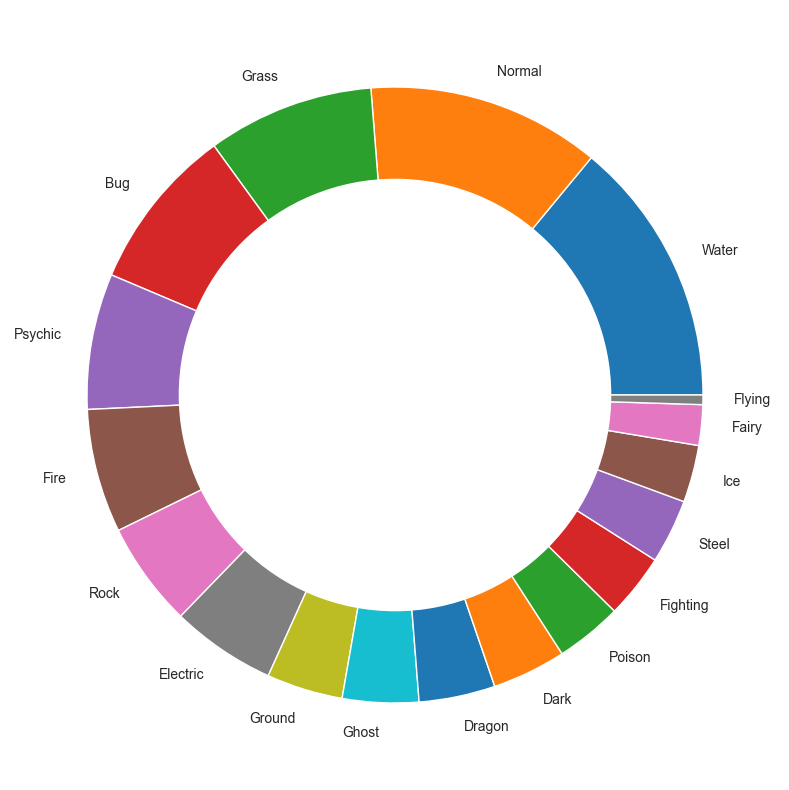

In [137]:

#Visualización del número de Pokémon por tipo en formato de tarta.
plt.figure(figsize=(15,10))
plt.pie(pokemon['Type 1'].value_counts(), labels = pokemon['Type 1'].value_counts().index)
my_circle=plt.Circle( (0,0),
                     0.7, # Grosor del donut
                     color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);
plt.show();

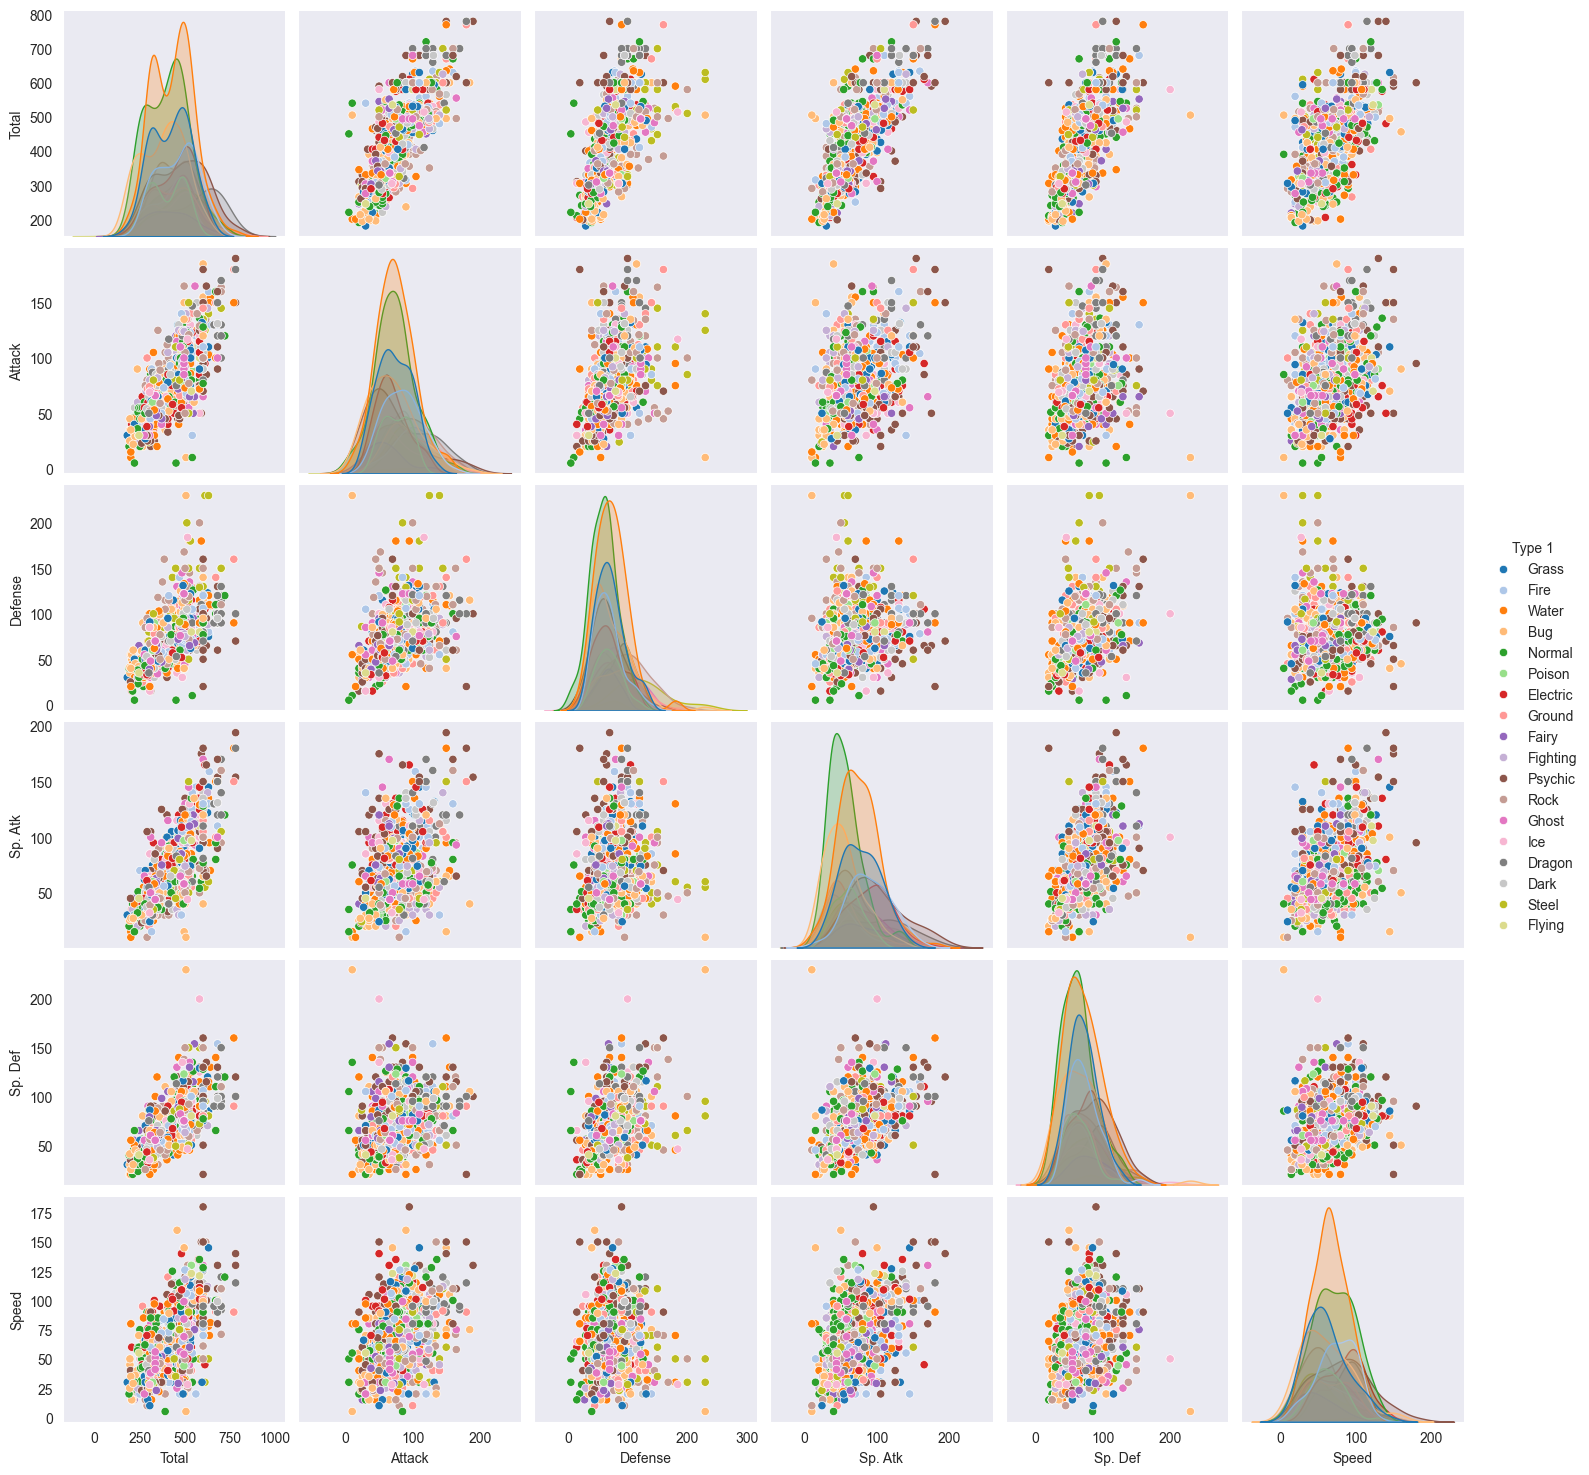

In [138]:
sns.pairplot(pokemon, vars=['Total','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], hue='Type 1', palette='tab20', height=2.5)
plt.show()

Interpretación de la estadística de correlación:

- **Total vs. Attack, Defense, Sp. Atk, Sp. Def, Speed**: Similar al análisis anterior, hay una correlación positiva entre Total y cada una de las otras estadísticas.
- **Attack vs. Defense, Sp. Atk, Sp. Def, Speed**: Hay una correlación positiva entre Attack y las otras estadísticas, aunque la correlación con Speed sigue siendo moderadamente más débil.
- **Defense vs. Sp. Atk, Sp. Def, Speed**: Defense muestra una correlación positiva con Sp. Atk y Sp. Def, pero una correlación baja con Speed.
- **Sp. Atk vs. Sp. Def, Speed**: Sp. Atk tiene una correlación positiva notable con Sp. Def y un poco menos con Speed.
- **Sp. Def vs. Speed**: Sp. Def continúa mostrando una correlación positiva con Speed.

- **Como curiosidad los Pokémon de tipo Psíquico (Psychic) suelen destacar por su alta velocidad. En los gráficos de dispersión, puedes ver que los puntos correspondientes a los tipos Psíquico se agrupan en la zona de las altas velocidades, lo que indica que estos Pokémon tienden a ser más rápidos en comparación con otros tipos**.




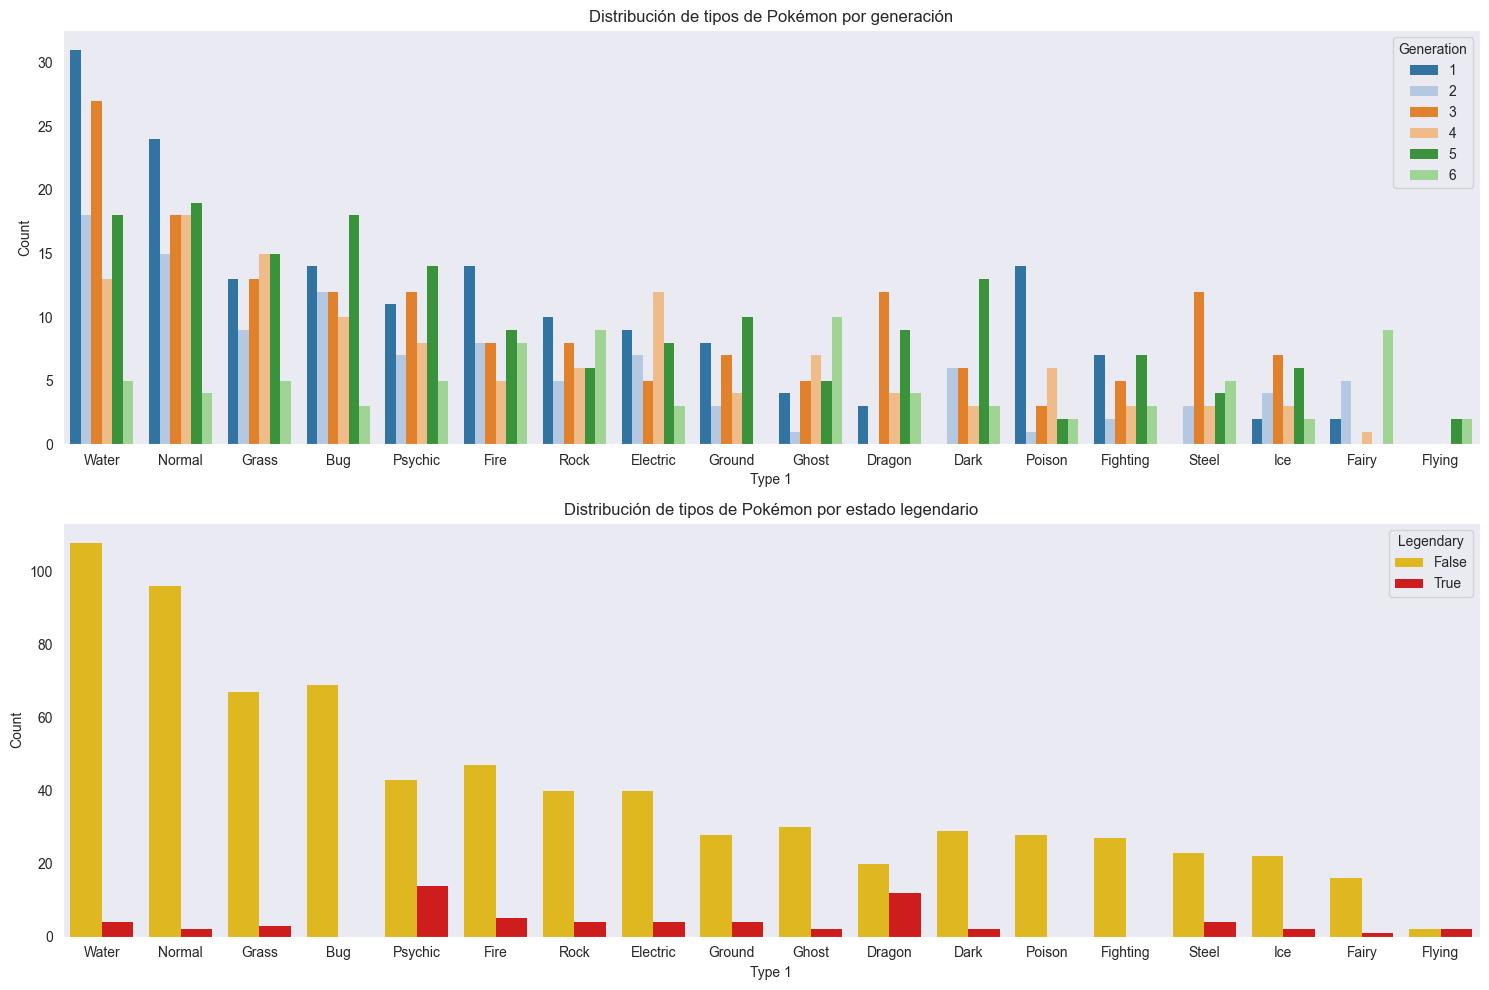

In [139]:

plt.figure(figsize=(15,10))

#Distribución de tipos de Pokémon por generación
plt.subplot(2, 1, 1)
sns.countplot(data=pokemon, x='Type 1', order=type_counts.index,hue='Generation', palette='tab20', linewidth=0, )
plt.title('Distribución de tipos de Pokémon por generación')
plt.xlabel('Type 1')
plt.ylabel('Count')

#Distribución de tipos de Pokémon por estado legendario
plt.subplot(2, 1, 2)
sns.countplot(data=pokemon, x='Type 1',order=type_counts.index , hue='Legendary', palette='hot_r', linewidth=0, )
plt.title('Distribución de tipos de Pokémon por estado legendario')
plt.xlabel('Type 1')
plt.ylabel('Count')


plt.tight_layout()
plt.show()



A pesar de que el tipo **Dragón** no cuenta con Pokémon de las seis generaciones en sus filas, su equilibrio de legendarios es bastante alto.  
El tipo **Psíquico** está mejor repartido, ya que tiene Pokémon de seis generaciones y un número muy alto de legendarios.  
En cambio, el tipo **Bicho**, a pesar de tener Pokémon de las seis generaciones, no cuenta con ningún legendario en sus filas.




In [140]:
#Creo las variables para el comando 'order'.
attack_order = pokemon.groupby('Type 1')['Attack'].mean().sort_values(ascending=False).index




In [141]:
defense_order = pokemon.groupby('Type 1')['Defense'].mean().sort_values(ascending=False).index


In [142]:
HP_order = pokemon.groupby('Type 1')['HP'].mean().sort_values(ascending=False).index

<Figure size 1500x1000 with 0 Axes>

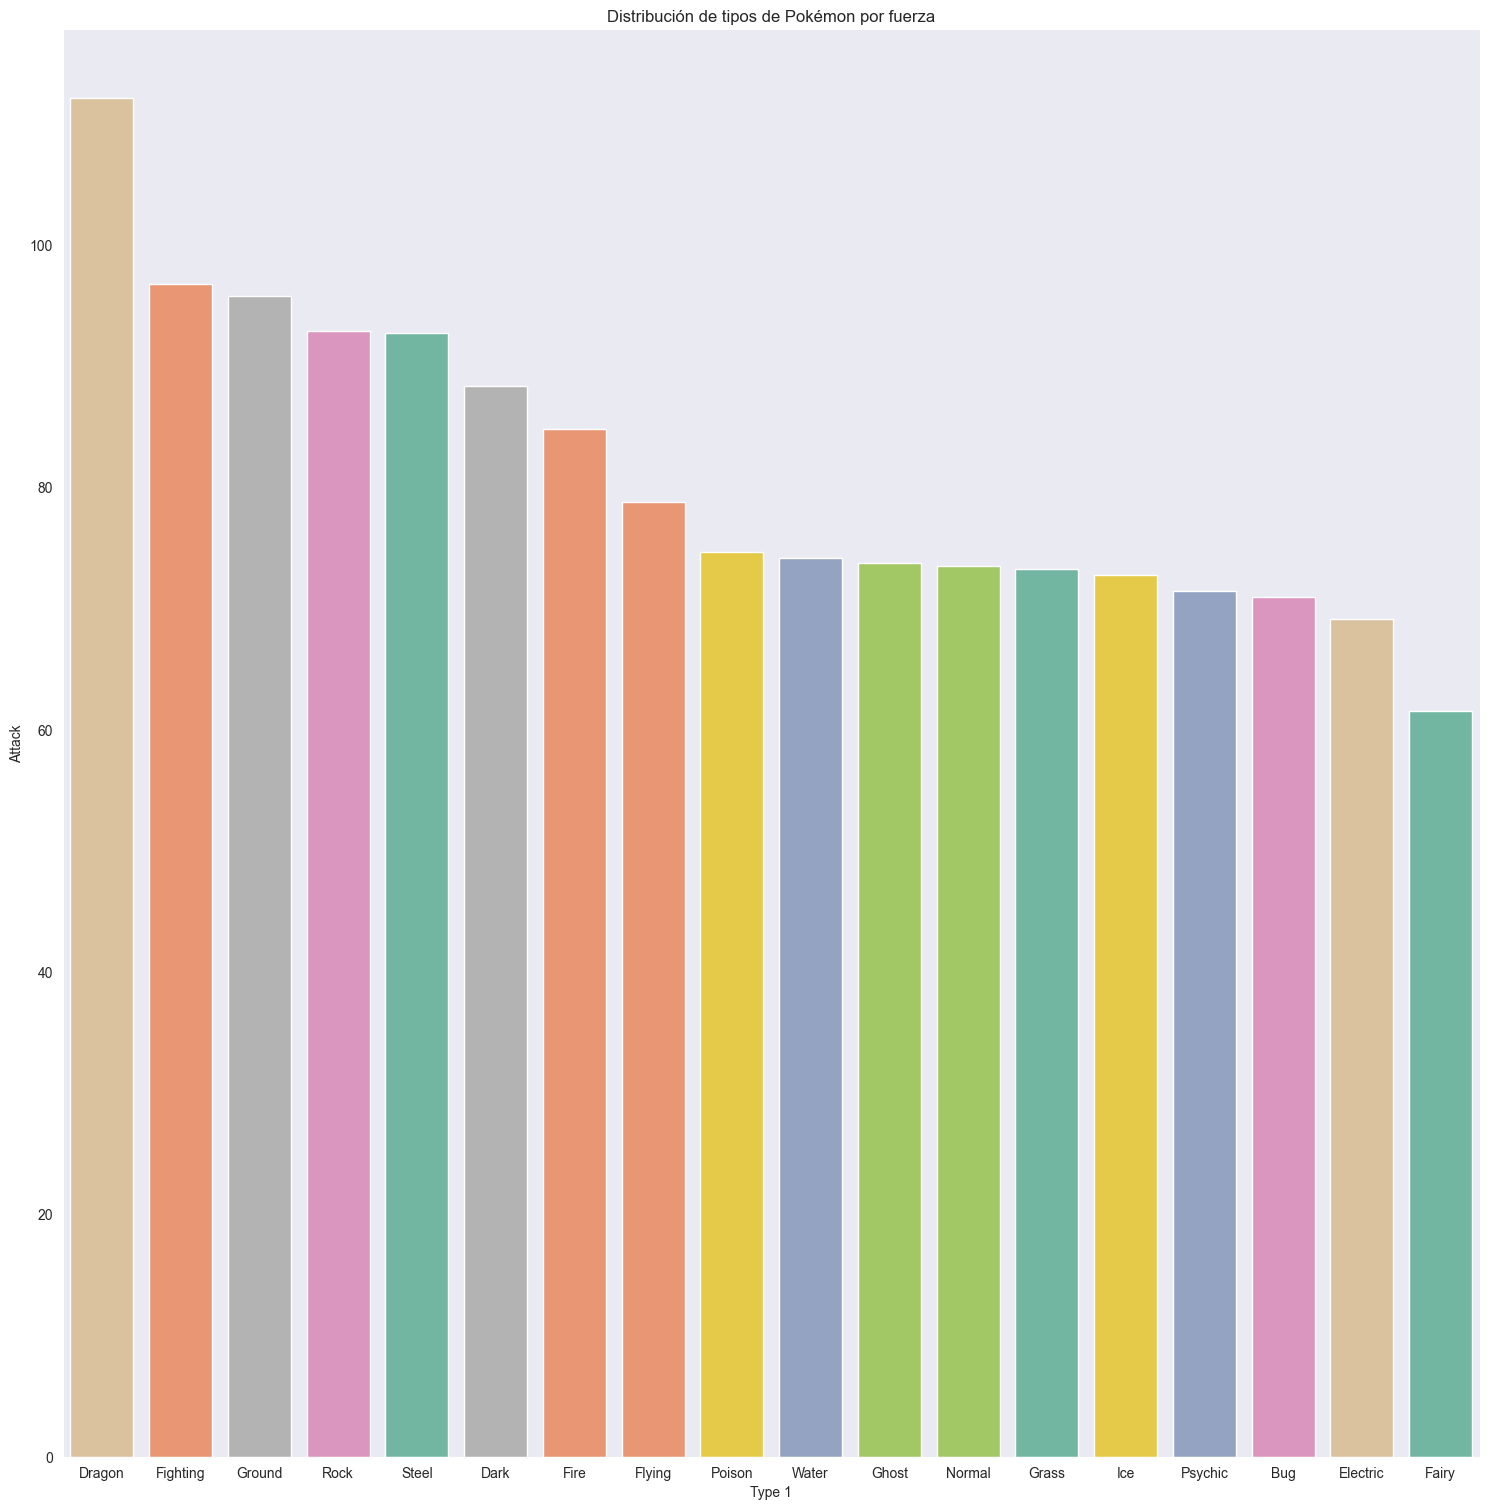

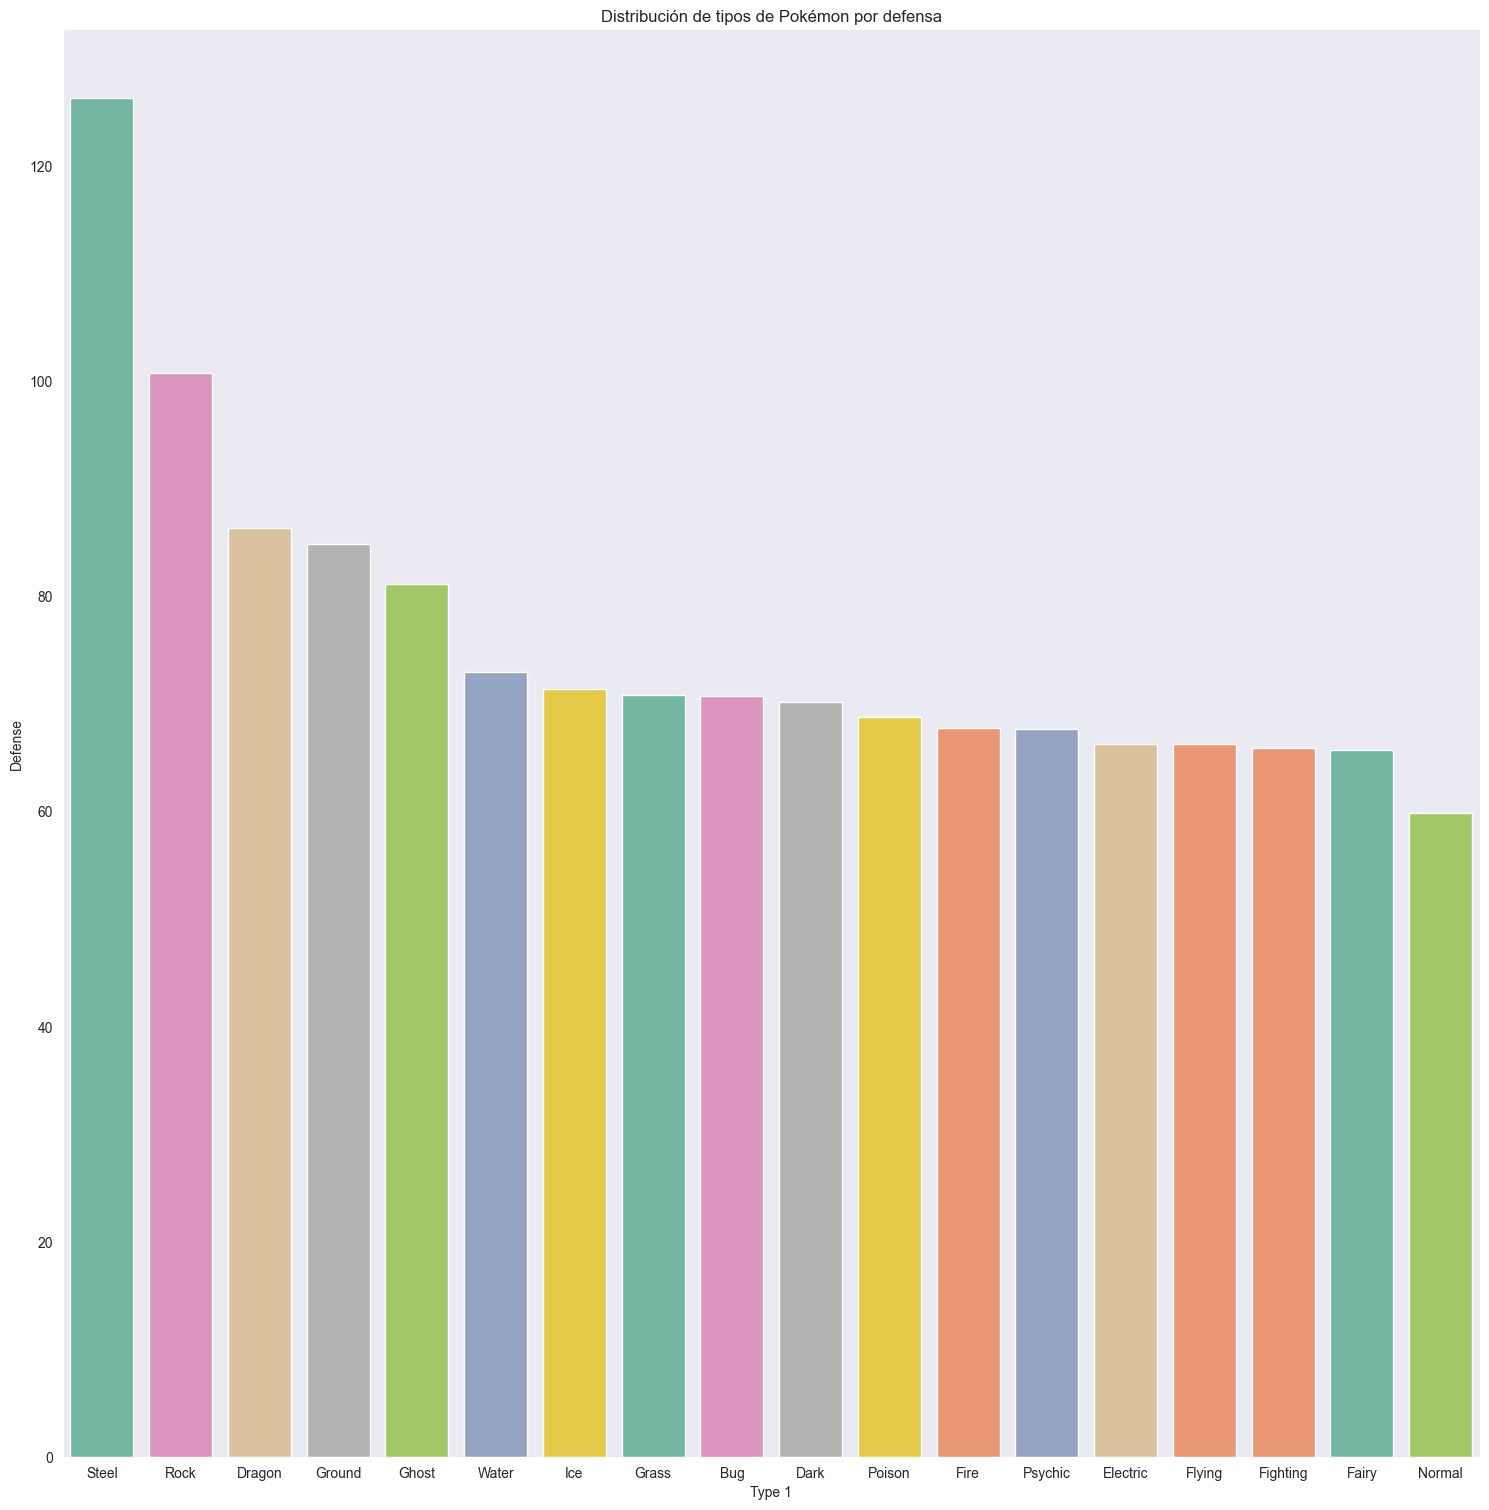

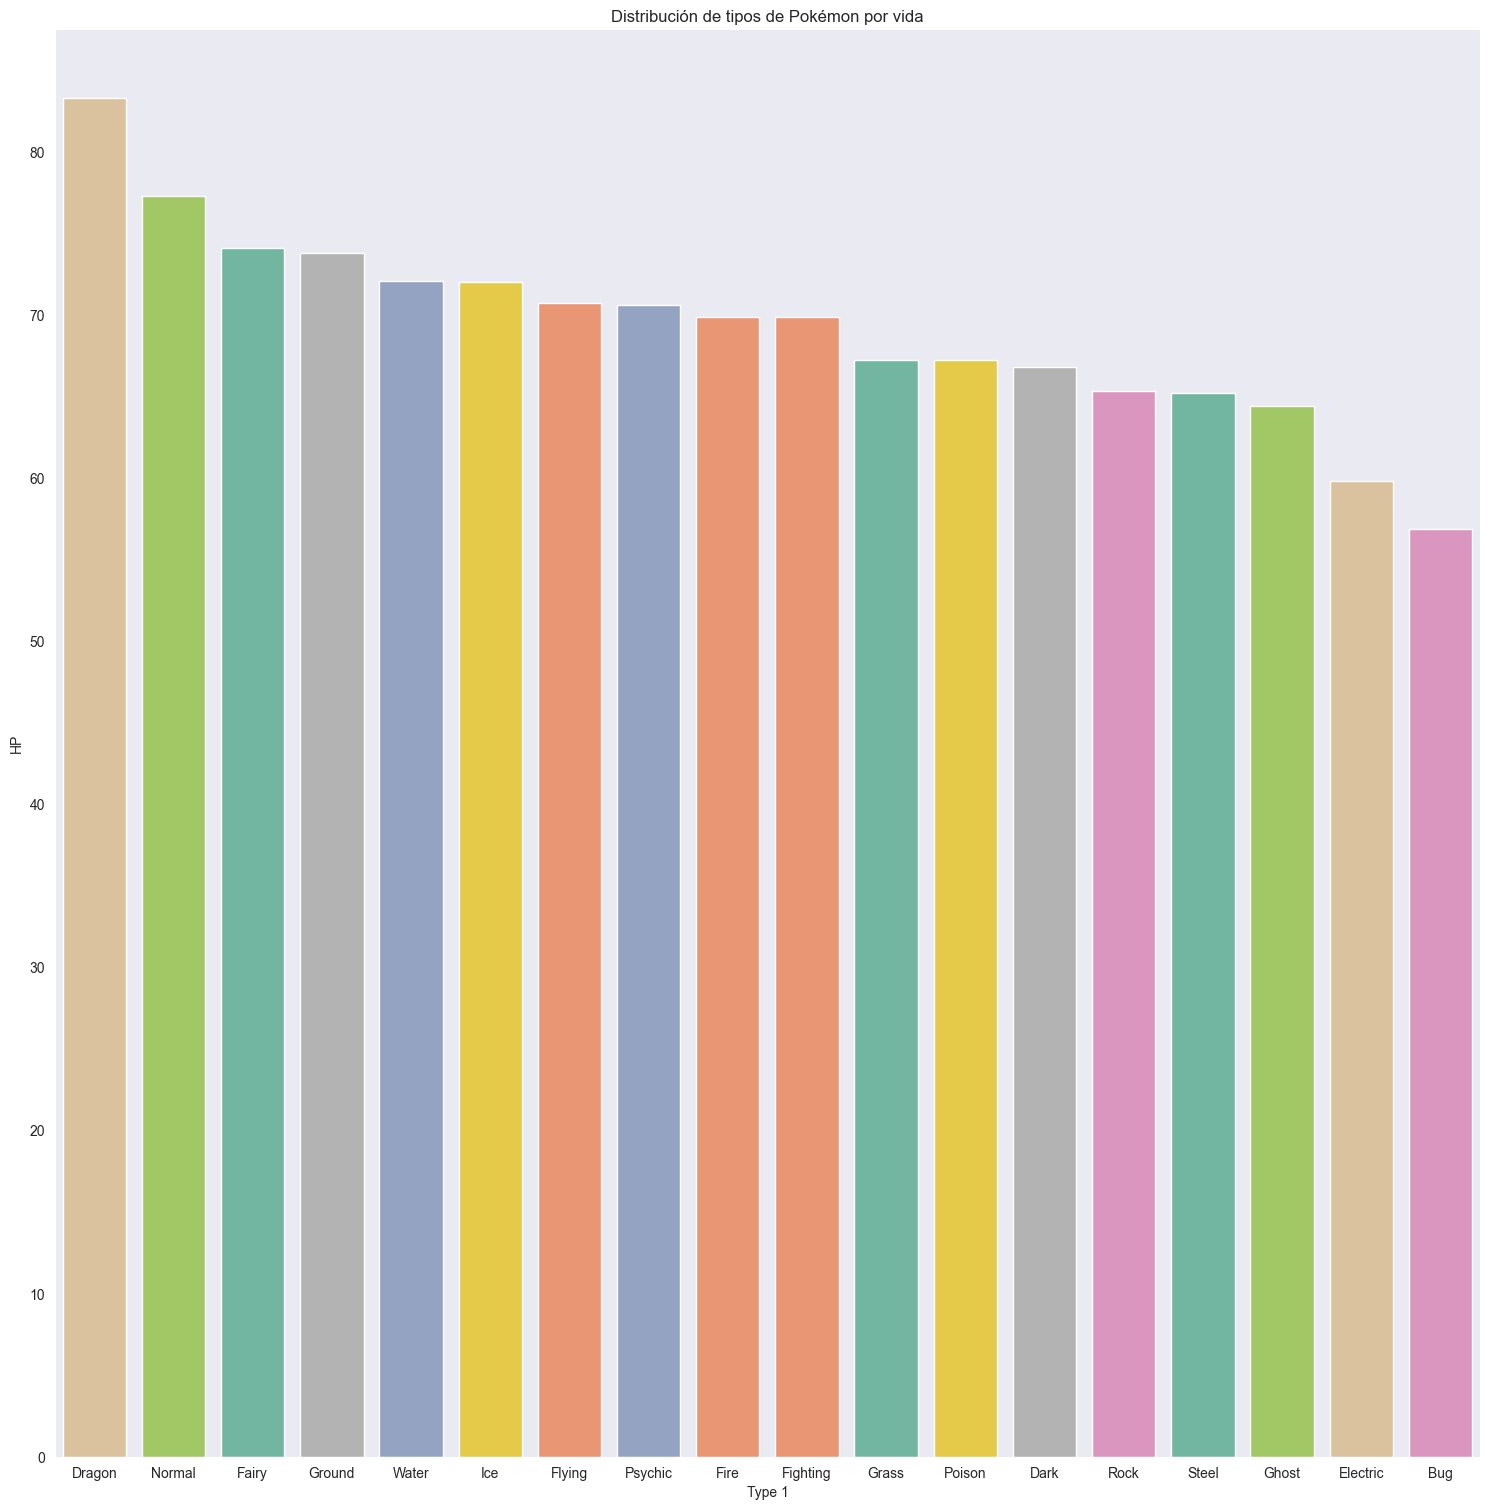

In [143]:
#Distribución de Pokémon por tipo con indicadores de fuerza, vida y defensa.
plt.figure(figsize=(15,10))
sns.catplot(pokemon, x='Type 1', hue='Type 1', y='Attack',errorbar=None, order=attack_order, palette='Set2', kind="bar", height = 15) 
plt.title('Distribución de tipos de Pokémon por fuerza')

sns.catplot(pokemon, x='Type 1', hue='Type 1', y='Defense', errorbar = None, order=defense_order, palette='Set2', kind="bar", height = 15) 
plt.title('Distribución de tipos de Pokémon por defensa')

sns.catplot(pokemon, x='Type 1', hue='Type 1', y='HP', palette='Set2', errorbar=None, order = HP_order, kind="bar", height = 15) 
plt.title('Distribución de tipos de Pokémon por vida')
plt.show()



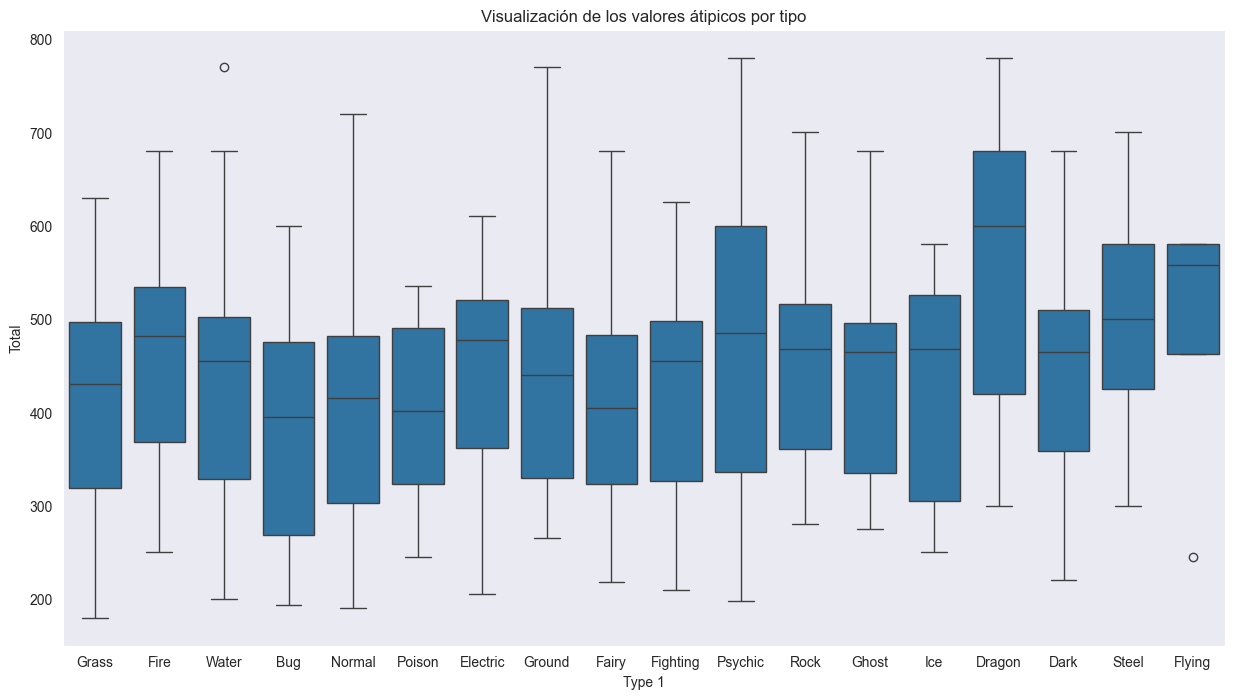

In [144]:
#Visualización de los valores átipicos por tipo.
plt.figure(figsize=(15,8)) 
sns.boxplot(x = pokemon['Type 1'],y = pokemon['Total'])
plt.title('Visualización de los valores átipicos por tipo')
plt.show()

Podemos identificar tendencias generales y desviaciones significativas:

- **Tipos con Estadísticas Elevadas**: Tipos como Dragón y Psíquico tienden a tener medianas elevadas y varios outliers, indicando que estos tipos suelen tener Pokémon con estadísticas totales altas.
- **Tipos con Estadísticas Intermedias**: Tipos como Volador y Agua muestran una distribución más centrada, con menores variabilidades.
- **Tipos con Estadísticas Menores**: Tipos como Bicho tienen estadísticas más bajas en comparación con otros tipos, con una mediana más cercana al extremo inferior de la escala.


In [145]:
#¿Cual es el pokemon más fuerte por tipo y sus estadisticas? 
best_type = pokemon.loc[pokemon.groupby('Type 1')['Attack'].idxmax(), ['Type 1','Total','Name','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']]
best_type.sort_values('Total',ascending=False)

Type 1  Total                     Name   HP  Attack  Defense  Sp. Atk  \
163   Psychic    780      MewtwoMega Mewtwo X  106     190      100      154   
426    Dragon    780    RayquazaMega Rayquaza  105     180      100      180   
424    Ground    770    GroudonPrimal Groudon  100     180      160      150   
792     Fairy    680                  Xerneas  126     131       95      131   
313    Normal    670                  Slaking  150     160      100       95   
141     Water    640    GyaradosMega Gyarados   95     155      109       70   
279      Fire    630    BlazikenMega Blaziken   80     160       80      130   
498  Fighting    625      LucarioMega Lucario   70     145       88      140   
232       Bug    600  HeracrossMega Heracross   80     185      115       40   
511     Grass    594  AbomasnowMega Abomasnow   90     132      105      132   
702    Flying    580  TornadusIncarnate Forme   79     115       70      125   
393      Dark    565          AbsolMega Absol   65     150       60      115   
387     Ghost    555      BanetteMega Banette   64     165       75       93   
517  Electric    540               Electivire   75     123       67       95   
524       Ice    530                Mamoswine  110     130       80       70   
750     Steel    520     AegislashBlade Forme   60     150       50      150   
454      Rock    495                Rampardos   97     165       60       65   
504    Poison    490                Toxicroak   83     106       65       86   

     Sp. Def  Speed  Generation  
163      100    130           1  
426      100    115           3  
424       90     90           3  
792       98     99           6  
313       65    100           3  
141      130     81           1  
279       80    100           3  
498       70    112           4  
232      105     75           2  
511      105     30           4  
702       80    111           5  
393       60    115           3  
387       83     75           3  
517       85     95           4  
524       60     80           4  
750       50     60           6  
454       50     58           4  
504       65     85           4

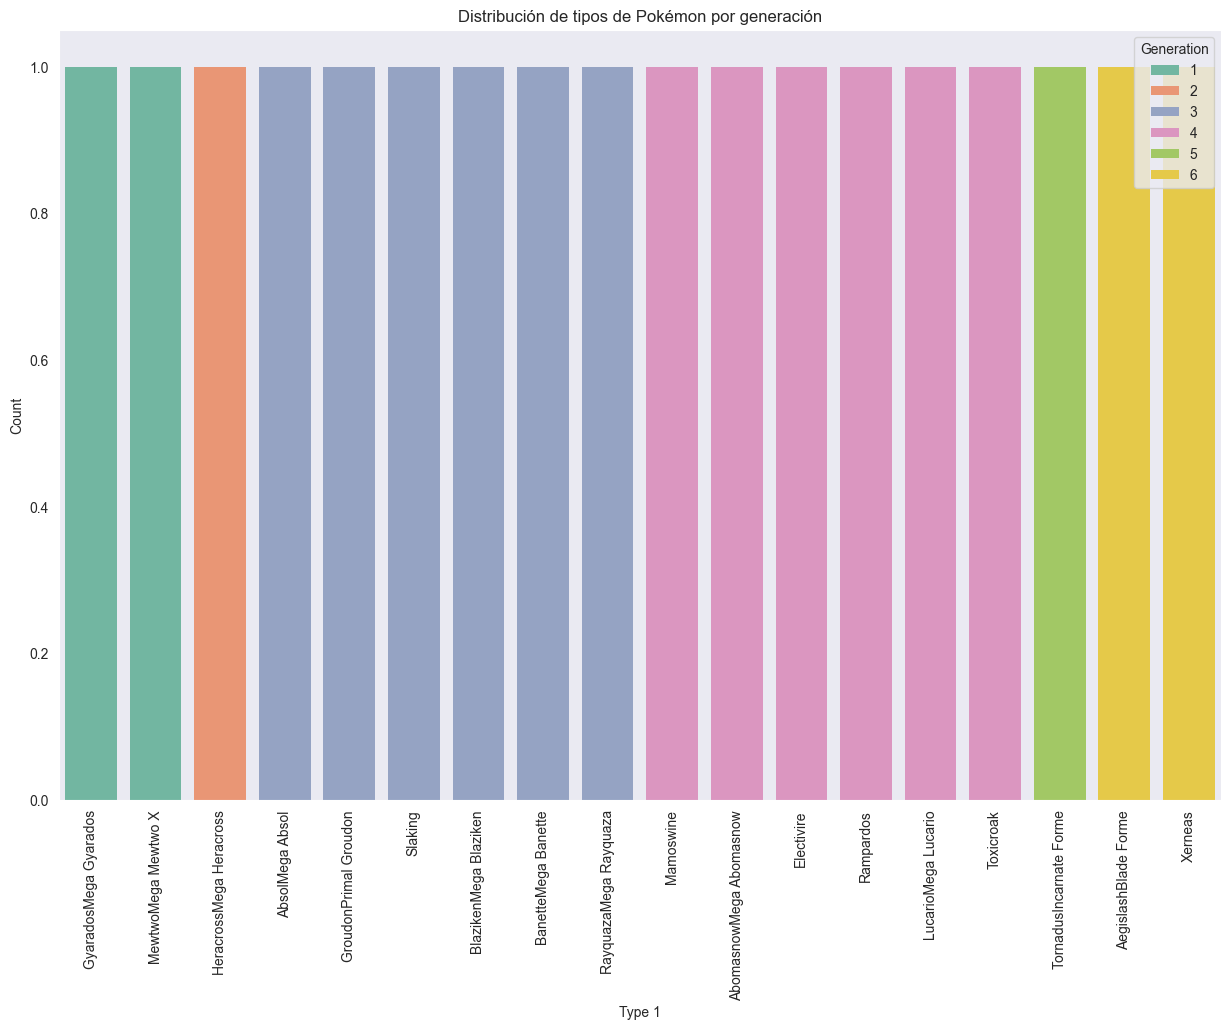

In [146]:

order_gen = best_type.groupby('Name')['Generation'].mean().sort_values().index

plt.figure(figsize=(15,10))
sns.countplot(data=best_type, x='Name', hue='Generation', order= order_gen, palette='Set2', linewidth=0, alpha=1)
plt.title('Distribución de tipos de Pokémon por generación')
plt.xticks(rotation = 90)
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.show()

Podemos destacar que, entre los más fuertes por tipo, la mayoría están repartidos entre la 3.ª y 4.ª generación.

<Figure size 1500x1000 with 0 Axes>

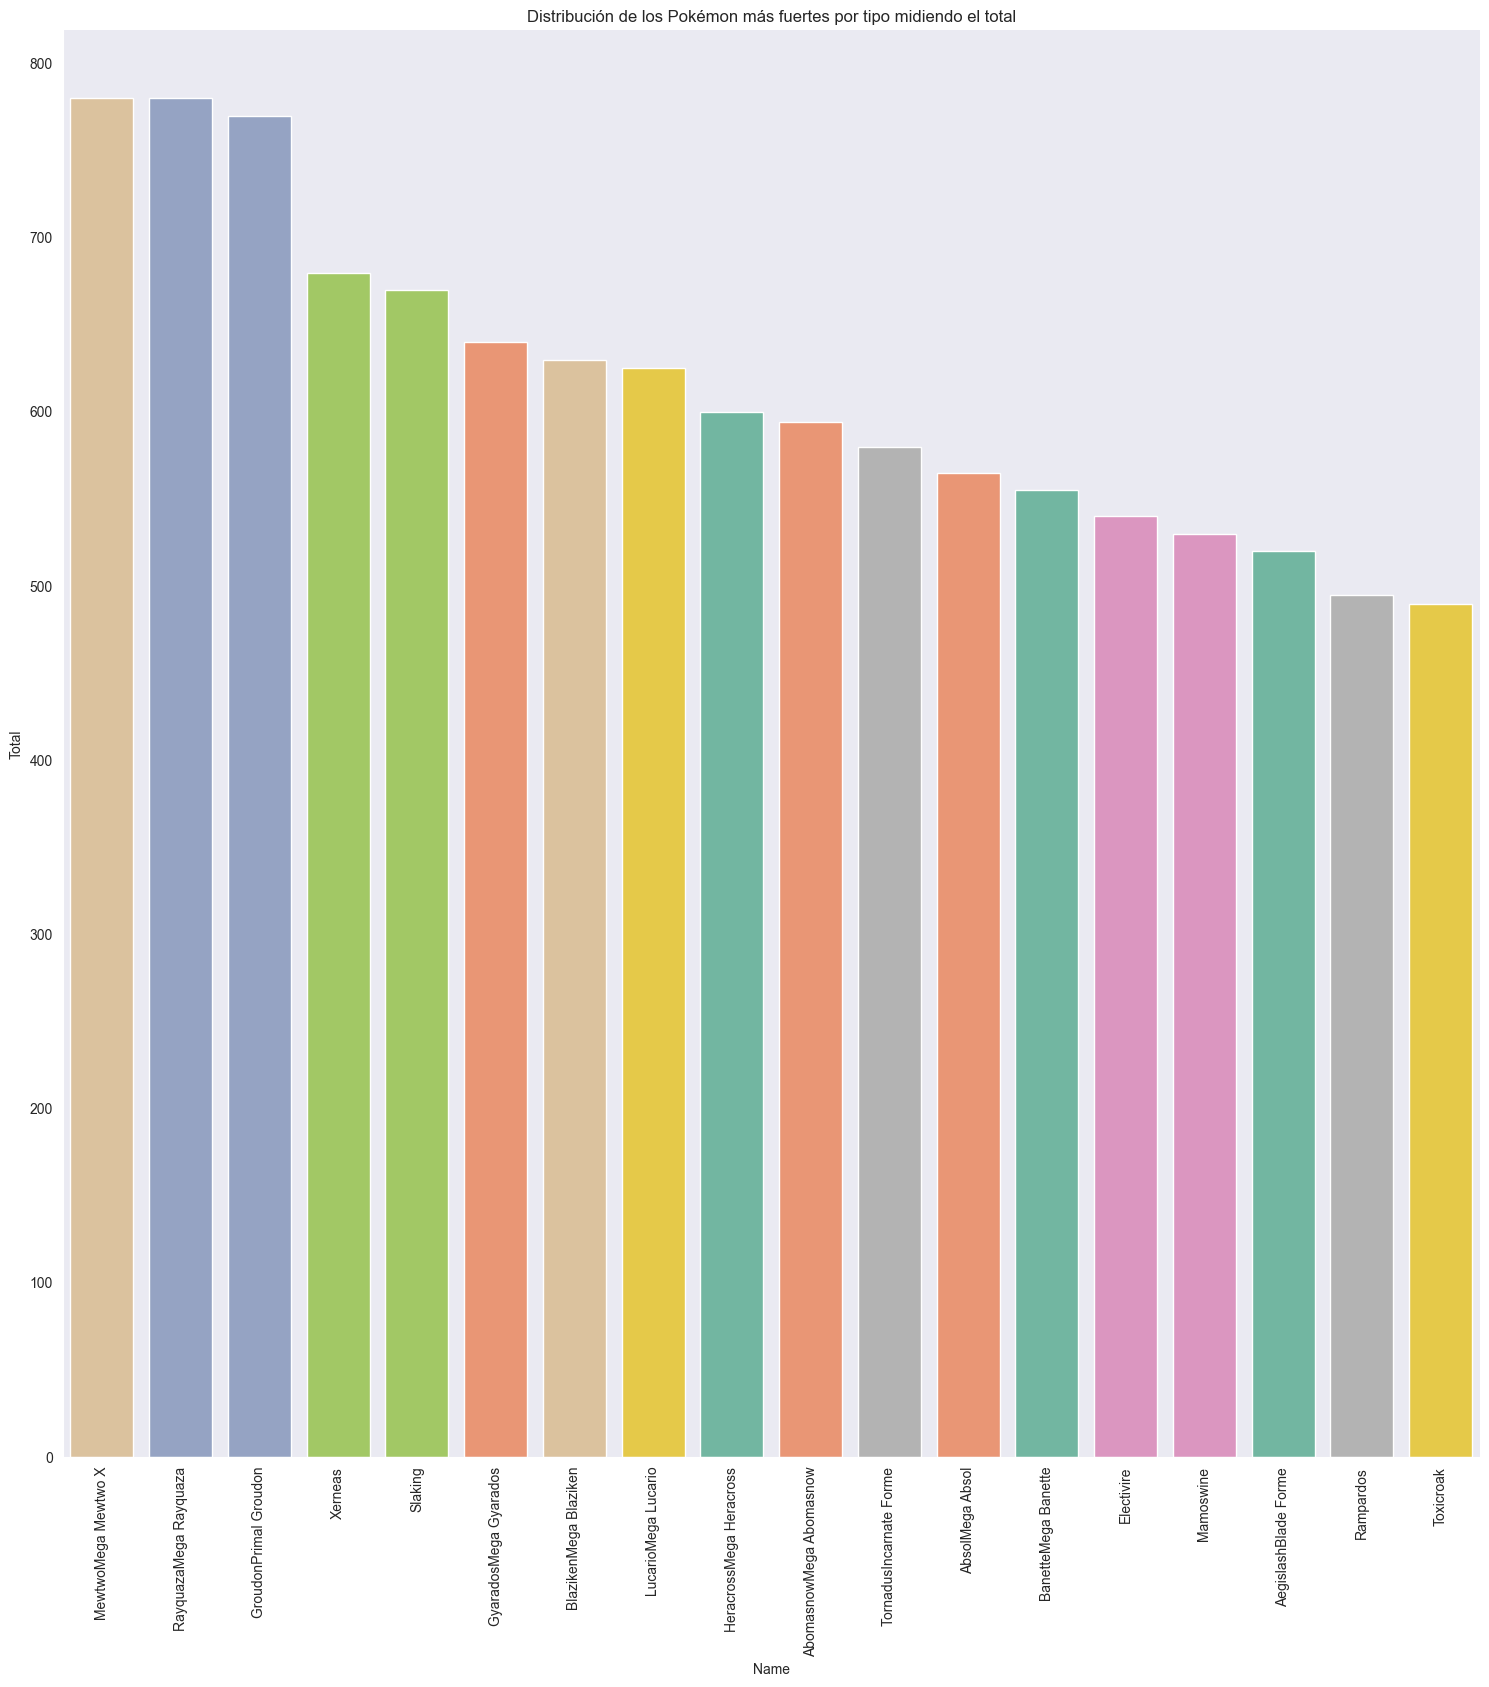

In [147]:
#Visualización: ¿Cual es el pokemon con el total más alto por tipo? 
order_total = best_type.groupby('Name')['Total'].mean().sort_values(ascending=False).index
plt.figure(figsize=(15,10))
sns.catplot(best_type, x='Name', y='Total', hue='Name',order= order_total, palette='Set2', kind="bar", height = 15) 
plt.xticks(rotation = 90)
plt.title('Distribución de los Pokémon más fuertes por tipo midiendo el total')
plt.show()

<Figure size 1500x1000 with 0 Axes>

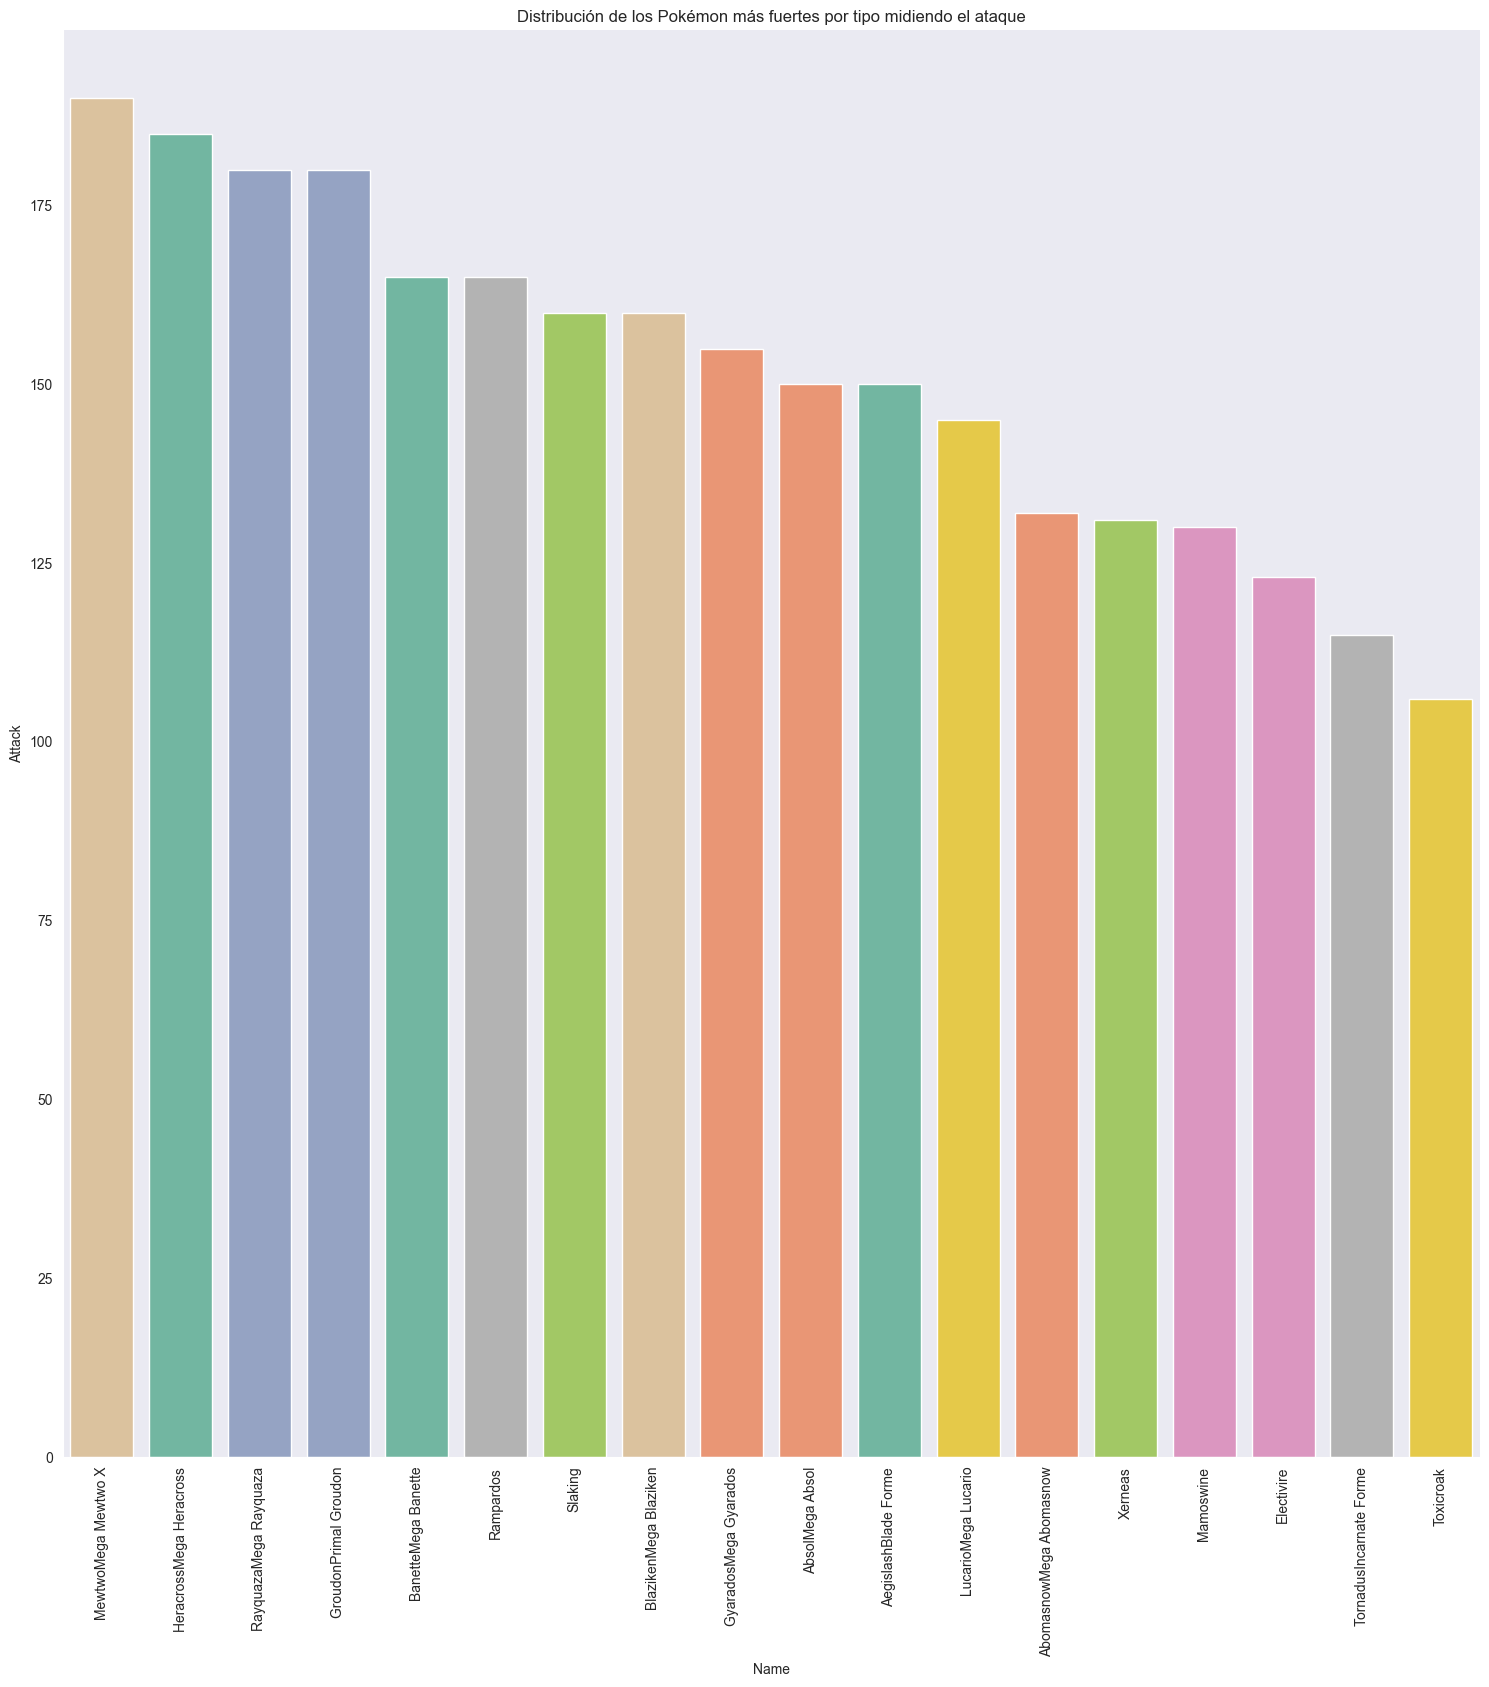

In [148]:
#Visualización: ¿Cual es el pokemon con el ataque más fuerte por tipo? 
order_attack = best_type.groupby('Name')['Attack'].mean().sort_values(ascending=False).index
plt.figure(figsize=(15,10))
sns.catplot(best_type, x='Name', y='Attack', hue='Name', order= order_attack , palette='Set2', kind="bar", height = 15) 
plt.xticks(rotation = 90)
plt.title('Distribución de los Pokémon más fuertes por tipo midiendo el ataque')
plt.show()

<Figure size 1500x1000 with 0 Axes>

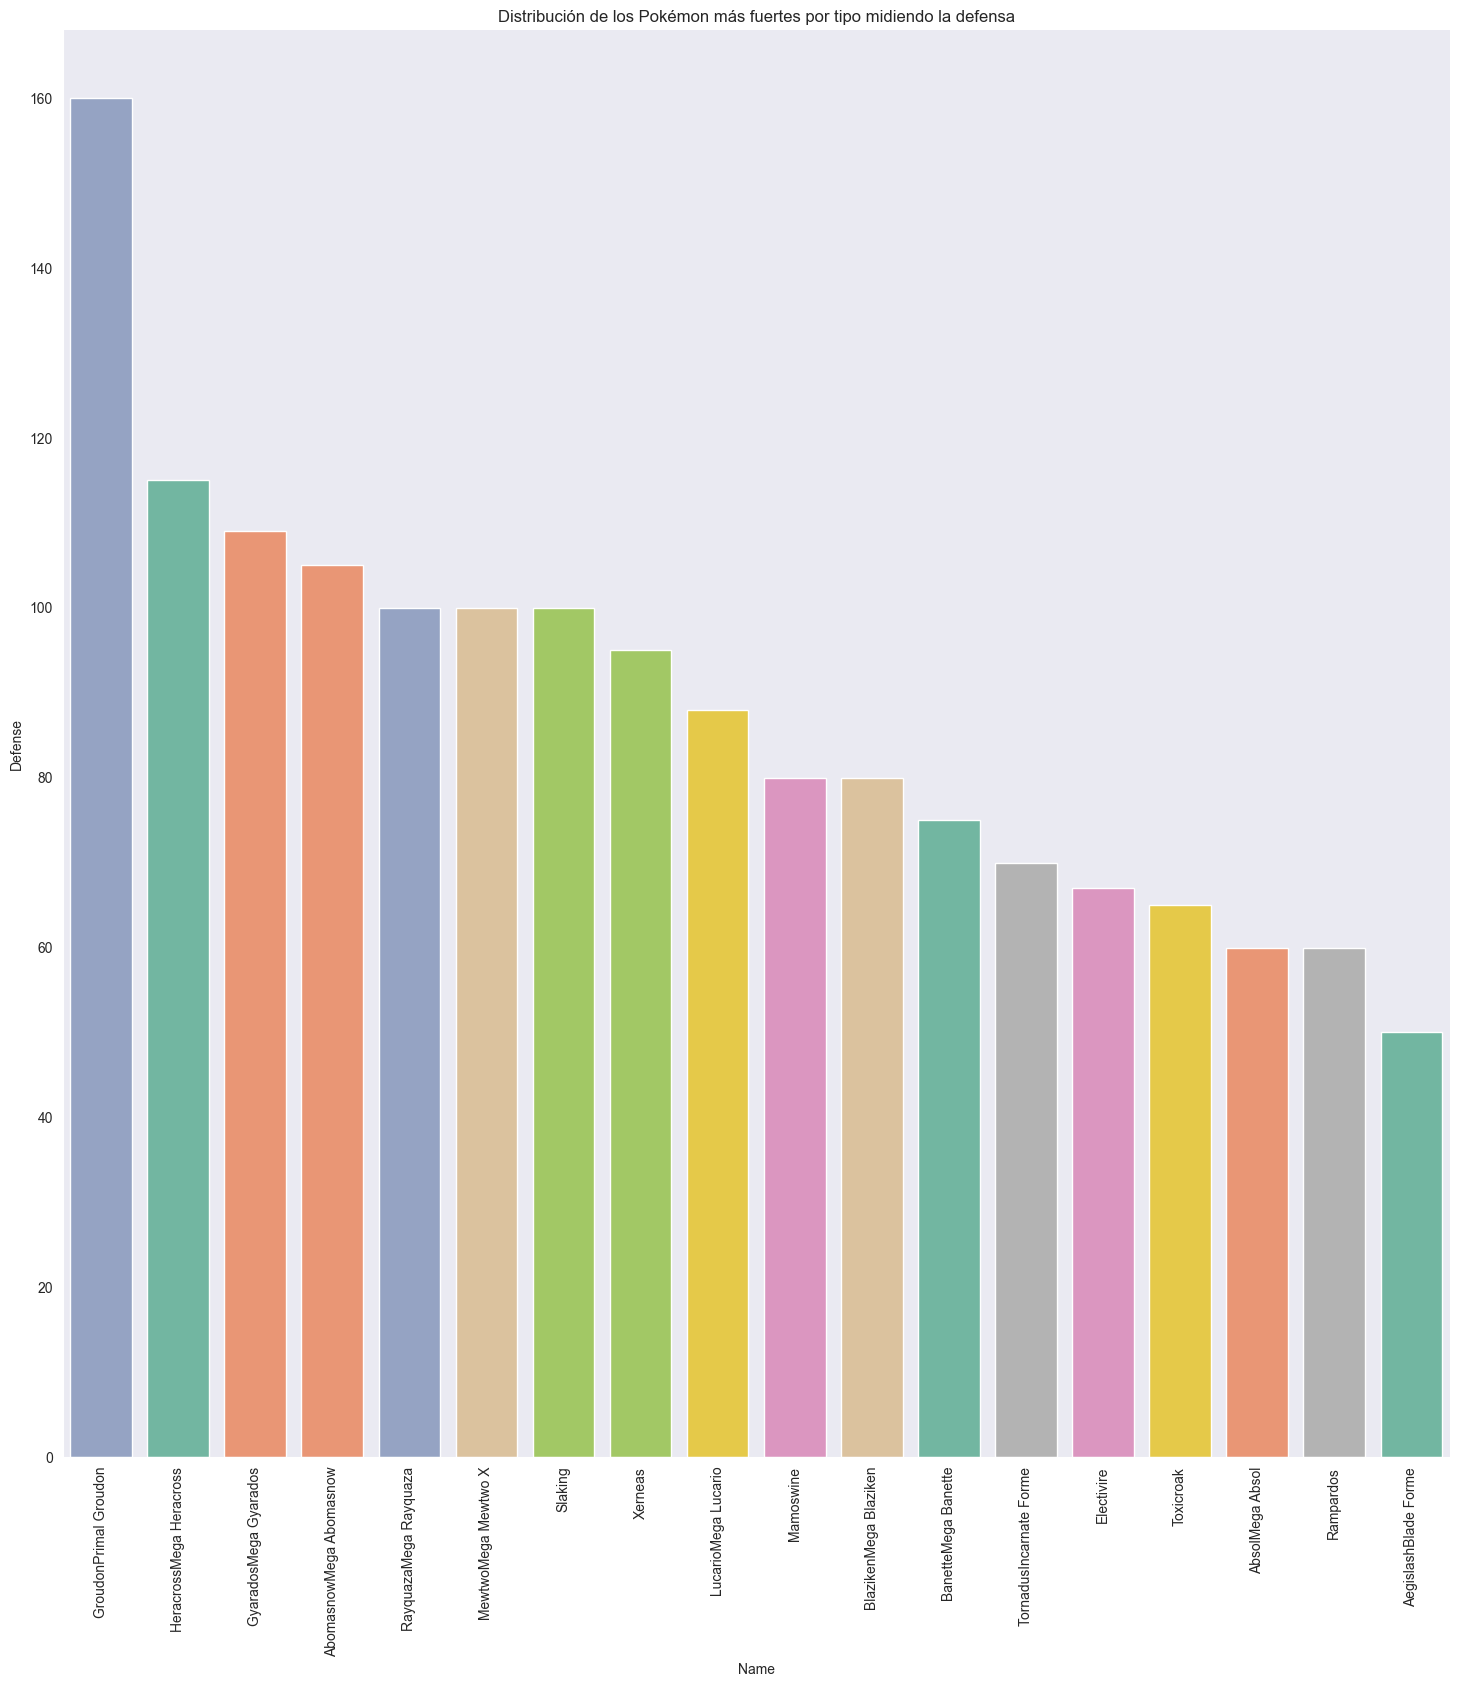

In [149]:
#Visualización: ¿Cual es el pokemon con la defensa más alta por tipo? 
order_defense = best_type.groupby('Name')['Defense'].mean().sort_values(ascending=False).index
plt.figure(figsize=(15,10))
sns.catplot(best_type, x='Name', y='Defense', hue='Name', order=order_defense, palette='Set2', kind="bar", height = 15) 
plt.xticks(rotation = 90)
plt.title('Distribución de los Pokémon más fuertes por tipo midiendo la defensa')
plt.show()

<Figure size 1500x1000 with 0 Axes>

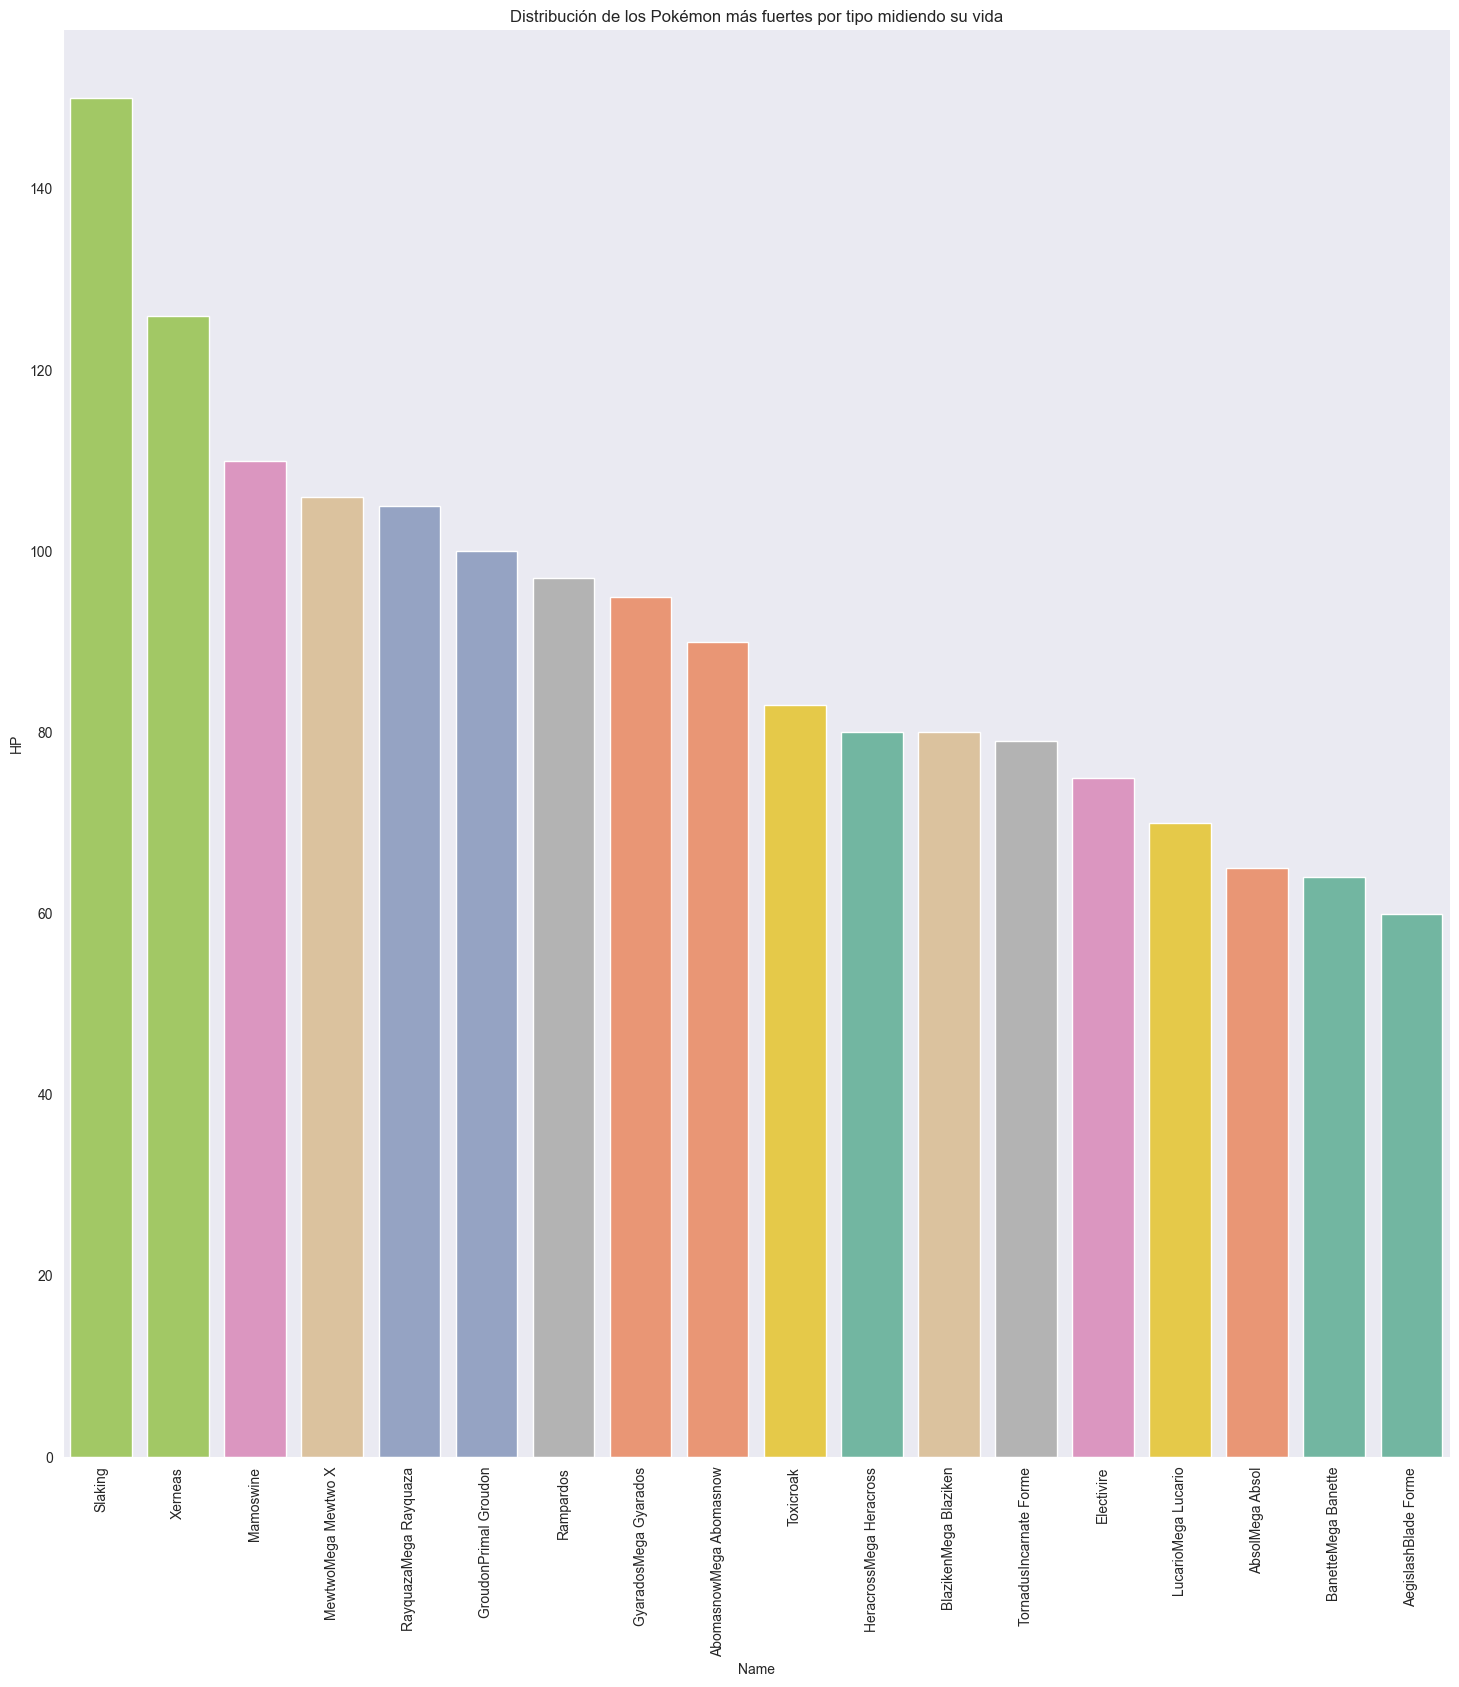

In [150]:
#Visualización: ¿Cual es el pokemon con más vida por tipo? 
order_hp = best_type.groupby('Name')['HP'].mean().sort_values(ascending=False).index
plt.figure(figsize=(15,10))
sns.catplot(best_type, x='Name',hue='Name', y='HP',order=order_hp, palette='Set2', kind="bar", height = 15) 
plt.xticks(rotation = 90)
plt.title('Distribución de los Pokémon más fuertes por tipo midiendo su vida')
plt.show()

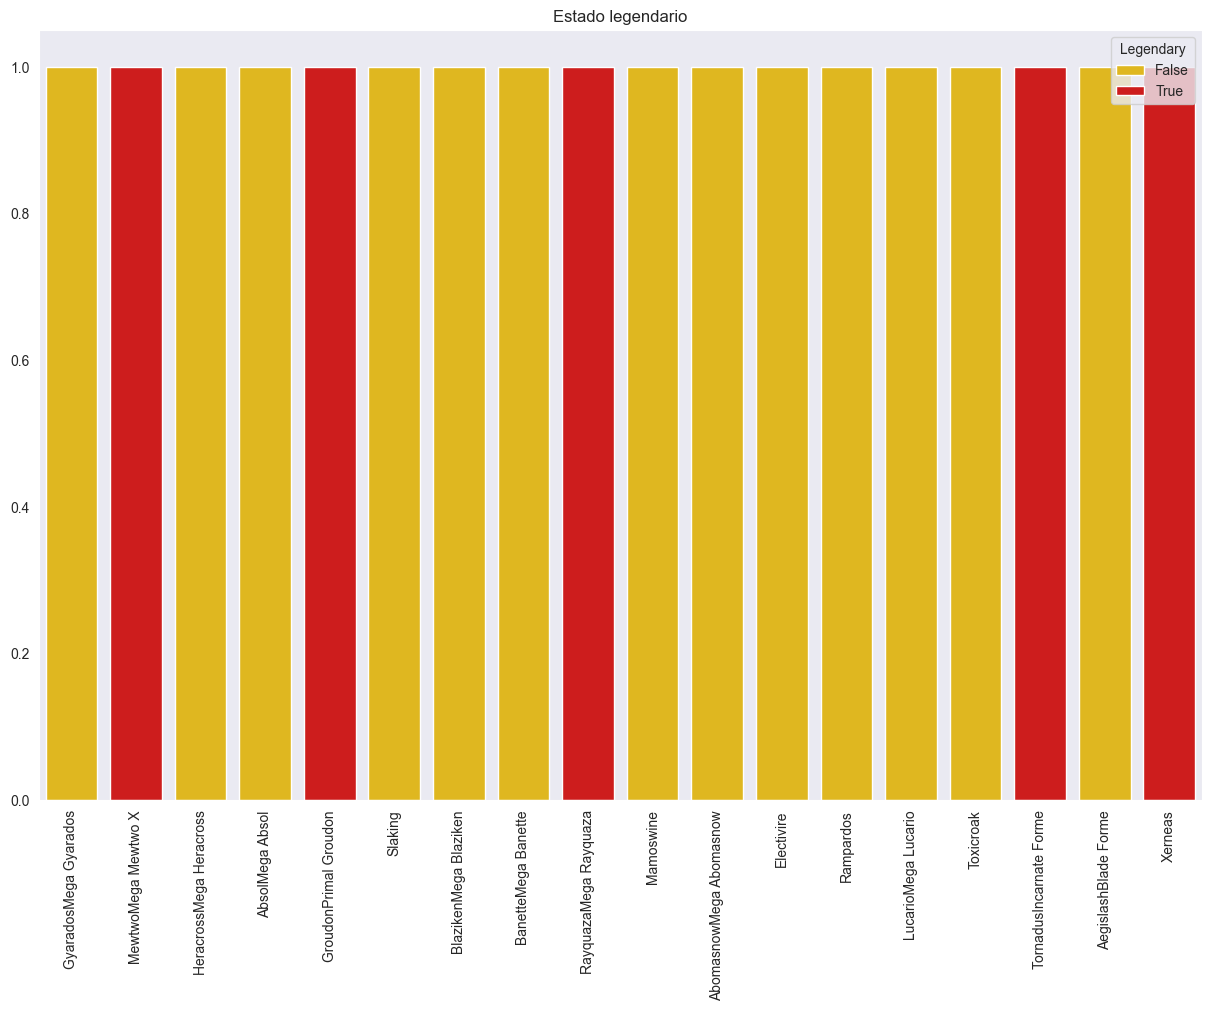

In [151]:
#Son los Pokémon más fuertes de cada tipo legendarios o no?
best_type_legend = pokemon.loc[pokemon.groupby('Type 1')['Attack'].idxmax(), ['Type 1','Total','Name','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']]
best_type_legend
plt.figure(figsize=(15,10))
sns.countplot(data=best_type_legend, x='Name',order= order_gen, hue='Legendary', palette='hot_r', )
plt.xticks(rotation = 90)
plt.title('Estado legendario')
plt.xlabel(' ')
plt.ylabel('')
plt.show()

Podemos destacar que, entre los más fuertes por tipo, la mayoría no son legendarios.

In [152]:
#Comparativa visual estilo video juego de las estadisticas de los Pokémon más fuertes por tipo. 
PokeFightfull(
    pokemon, 
    'HeracrossMega Heracross', 
    'AbsolMega Absol',
    'RayquazaMega Rayquaza',
    'Electivire',
    'Xerneas',
    'LucarioMega Lucario',
    'BlazikenMega Blaziken',
    'TornadusIncarnate Forme',
    'BanetteMega Banette',
    'AbomasnowMega Abomasnow',
    'GroudonPrimal Groudon',
    'Mamoswine',
    'Slaking',
    'Toxicroak',
    'MewtwoMega Mewtwo X',
    'Rampardos',
    'AegislashBlade Forme',
    'GyaradosMega Gyarados'
)
plt.show()


---

###  x Best of the Best x

In [153]:
#Numero total de Pokémon
len(pokemon)


800

In [154]:
#El Pokémon con el total de estadisticas más alto.
pokemon.sort_values('Total', ascending = False).head(2)

Name   Type 1    Type 2  Total   HP  Attack  Defense  \
426  RayquazaMega Rayquaza   Dragon    Flying    780  105     180      100   
163    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
426      180      100    115           3       True  
163      154      100    130           1       True

In [155]:
#El Pokémon con más vida.
pokemon.sort_values('HP', ascending = False).head(1)

Name  Type 1 Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  \
261  Blissey  Normal      x    540  255      10       10       75      135   

     Speed  Generation  Legendary  
261     55           2      False

In [156]:
#El Pokémon con el ataque más fuerte.
pokemon.sort_values('Attack', ascending = False).head(1)

Name   Type 1    Type 2  Total   HP  Attack  Defense  \
163  MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
163      154      100    130           1       True

In [157]:
#El Pokémon con la defensa más alta.
pokemon.sort_values('Defense', ascending = False).head(1)

Name Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
333  AggronMega Aggron  Steel      x    630  70     140      230       60   

     Sp. Def  Speed  Generation  Legendary  
333       80     50           3      False

In [158]:
#El Pokémon más rapido.
pokemon.sort_values('Speed', ascending = False).head(1)

Name   Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
431  DeoxysSpeed Forme  Psychic      x    600  50      95       90       95   

     Sp. Def  Speed  Generation  Legendary  
431       90    180           3       True

In [159]:
#El Pokémon más debil.
pokemon.sort_values('Total').head(1)

Name Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
206  Sunkern  Grass      x    180  30      30       30       30       30   

     Speed  Generation  Legendary  
206     30           2      False

In [160]:
#Grupo con los mejores de cada estadistica.
best_of_best = pokemon.iloc[[426,261,163,333,431]]
best_of_best

Name   Type 1    Type 2  Total   HP  Attack  Defense  \
426  RayquazaMega Rayquaza   Dragon    Flying    780  105     180      100   
261                Blissey   Normal         x    540  255      10       10   
163    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   
333      AggronMega Aggron    Steel         x    630   70     140      230   
431      DeoxysSpeed Forme  Psychic         x    600   50      95       90   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
426      180      100    115           3       True  
261       75      135     55           2      False  
163      154      100    130           1       True  
333       60       80     50           3      False  
431       95       90    180           3       True

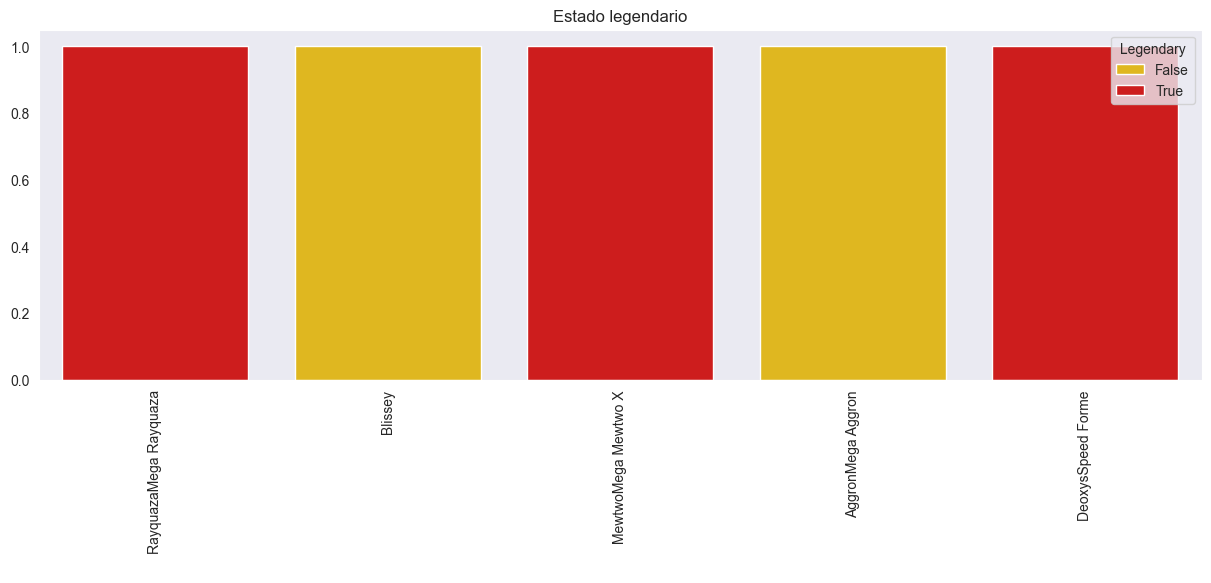

In [161]:
#¿De los mejores de cada estadística cuales son legendarios?
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 2)
sns.countplot(data=best_of_best, x='Name', hue='Legendary', palette='hot_r', )
plt.xticks(rotation = 90)
plt.title('Estado legendario')
plt.xlabel(' ')
plt.ylabel('')
plt.show()

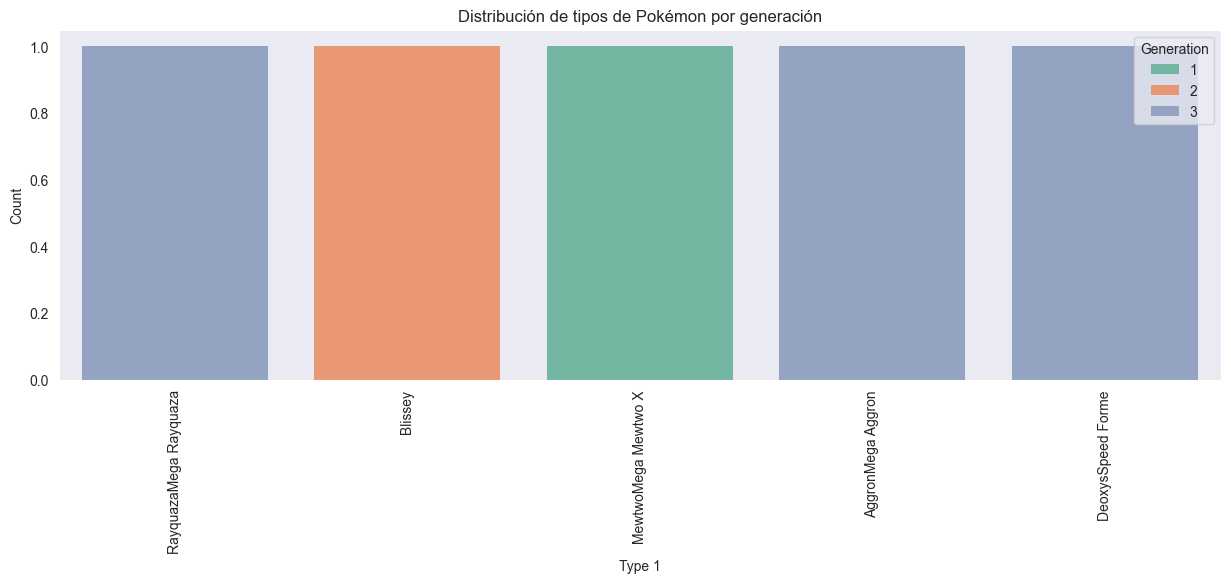

In [162]:
#¿De que generación son los mejores de cada estadistica?
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sns.countplot(data=best_of_best, x='Name', hue='Generation', palette='Set2', linewidth=0, alpha=1)
plt.title('Distribución de tipos de Pokémon por generación')
plt.xticks(rotation = 90)
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.show()

In [163]:
#Comparativa visual estilo video juego de las estadisticas del grupo Best of best.
PokeFightfull(pokemon, 'RayquazaMega Rayquaza', 'Blissey','MewtwoMega Mewtwo X', 'AggronMega Aggron','DeoxysSpeed Forme')
plt.show()

---

###  x The best initial x

In [164]:
#Selección de los Pokémon iniciales para el estudio
best_ini = pokemon.iloc[[9,4,0]]
best_ini

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
9    Squirtle  Water       x    314  44      48       65       50       64   
4  Charmander   Fire       x    309  39      52       43       60       50   
0   Bulbasaur  Grass  Poison    318  45      49       49       65       65   

   Speed  Generation  Legendary  
9     43           1      False  
4     65           1      False  
0     45           1      False

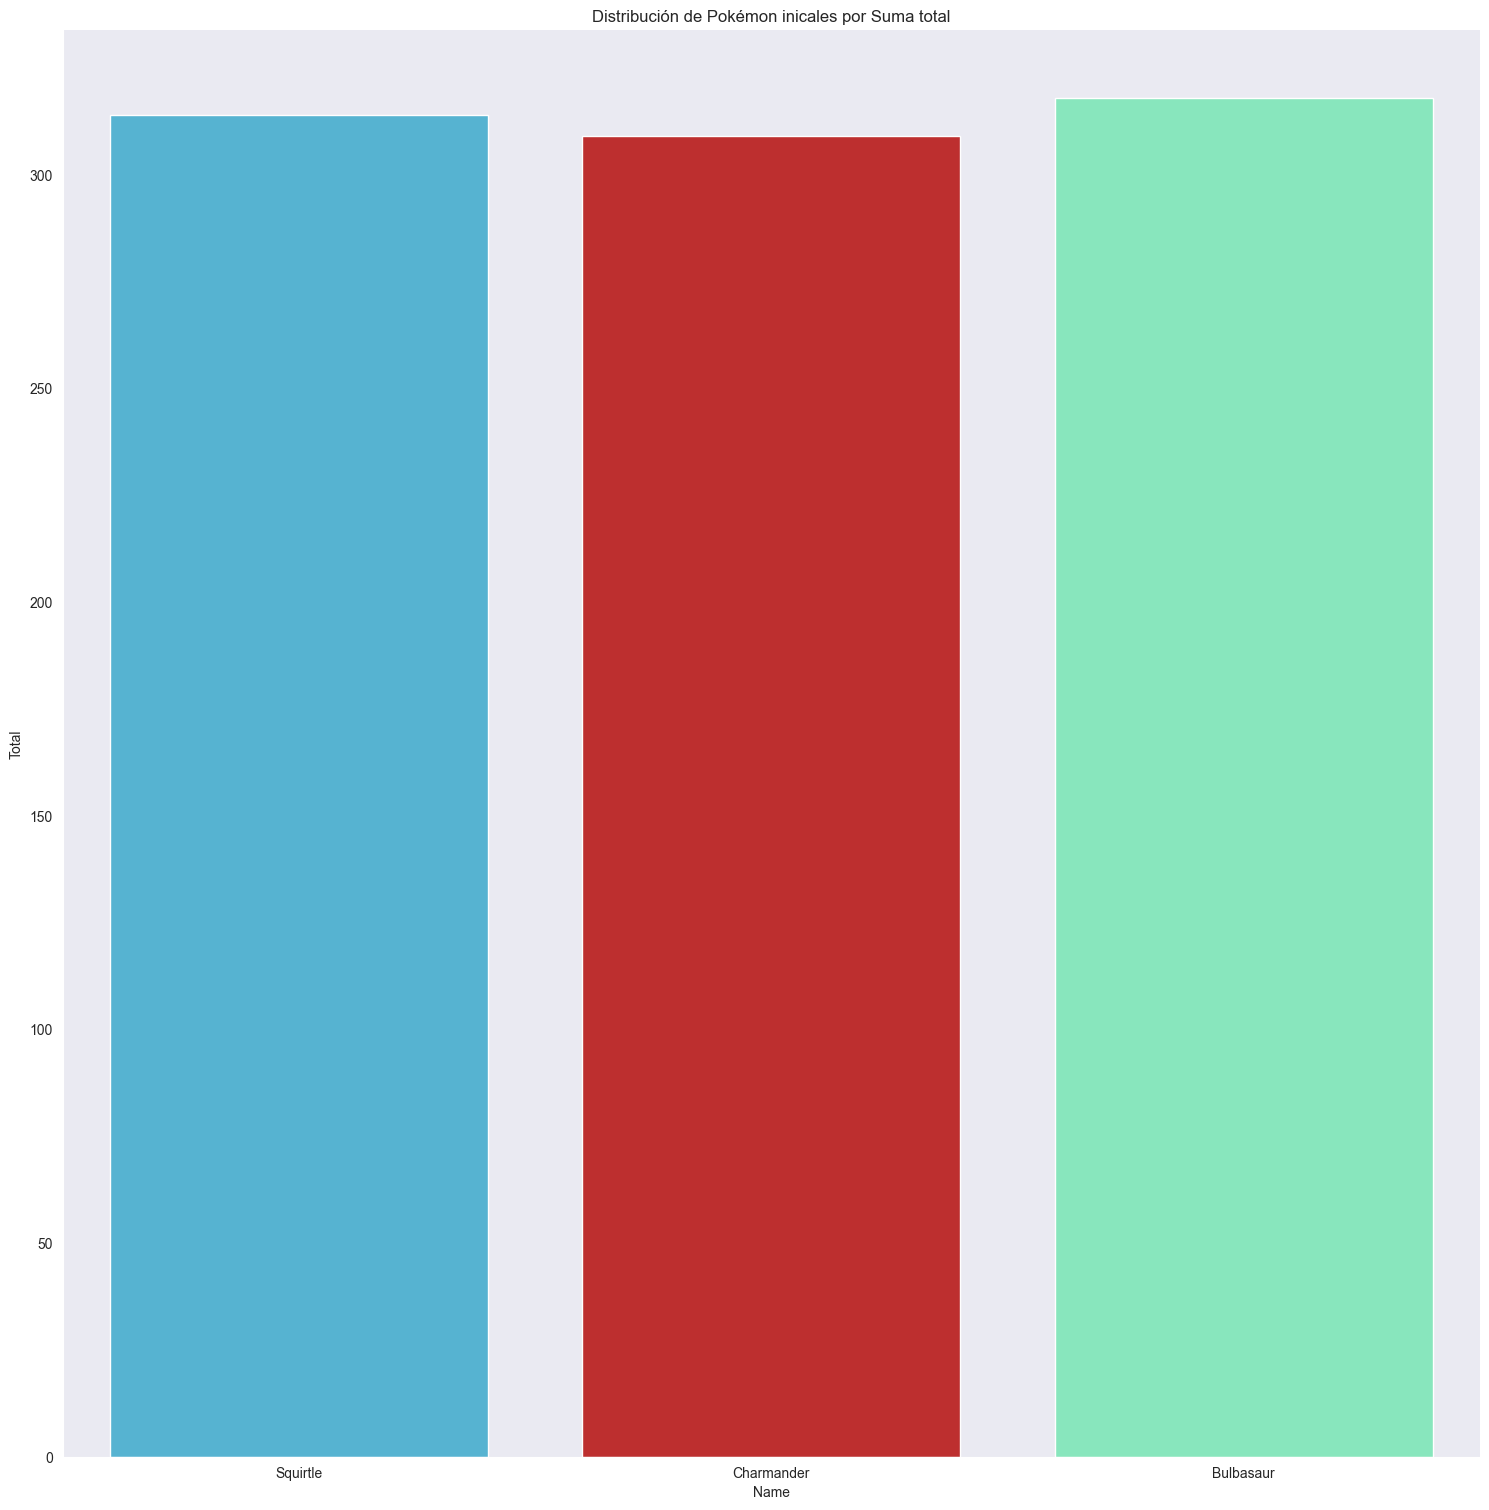

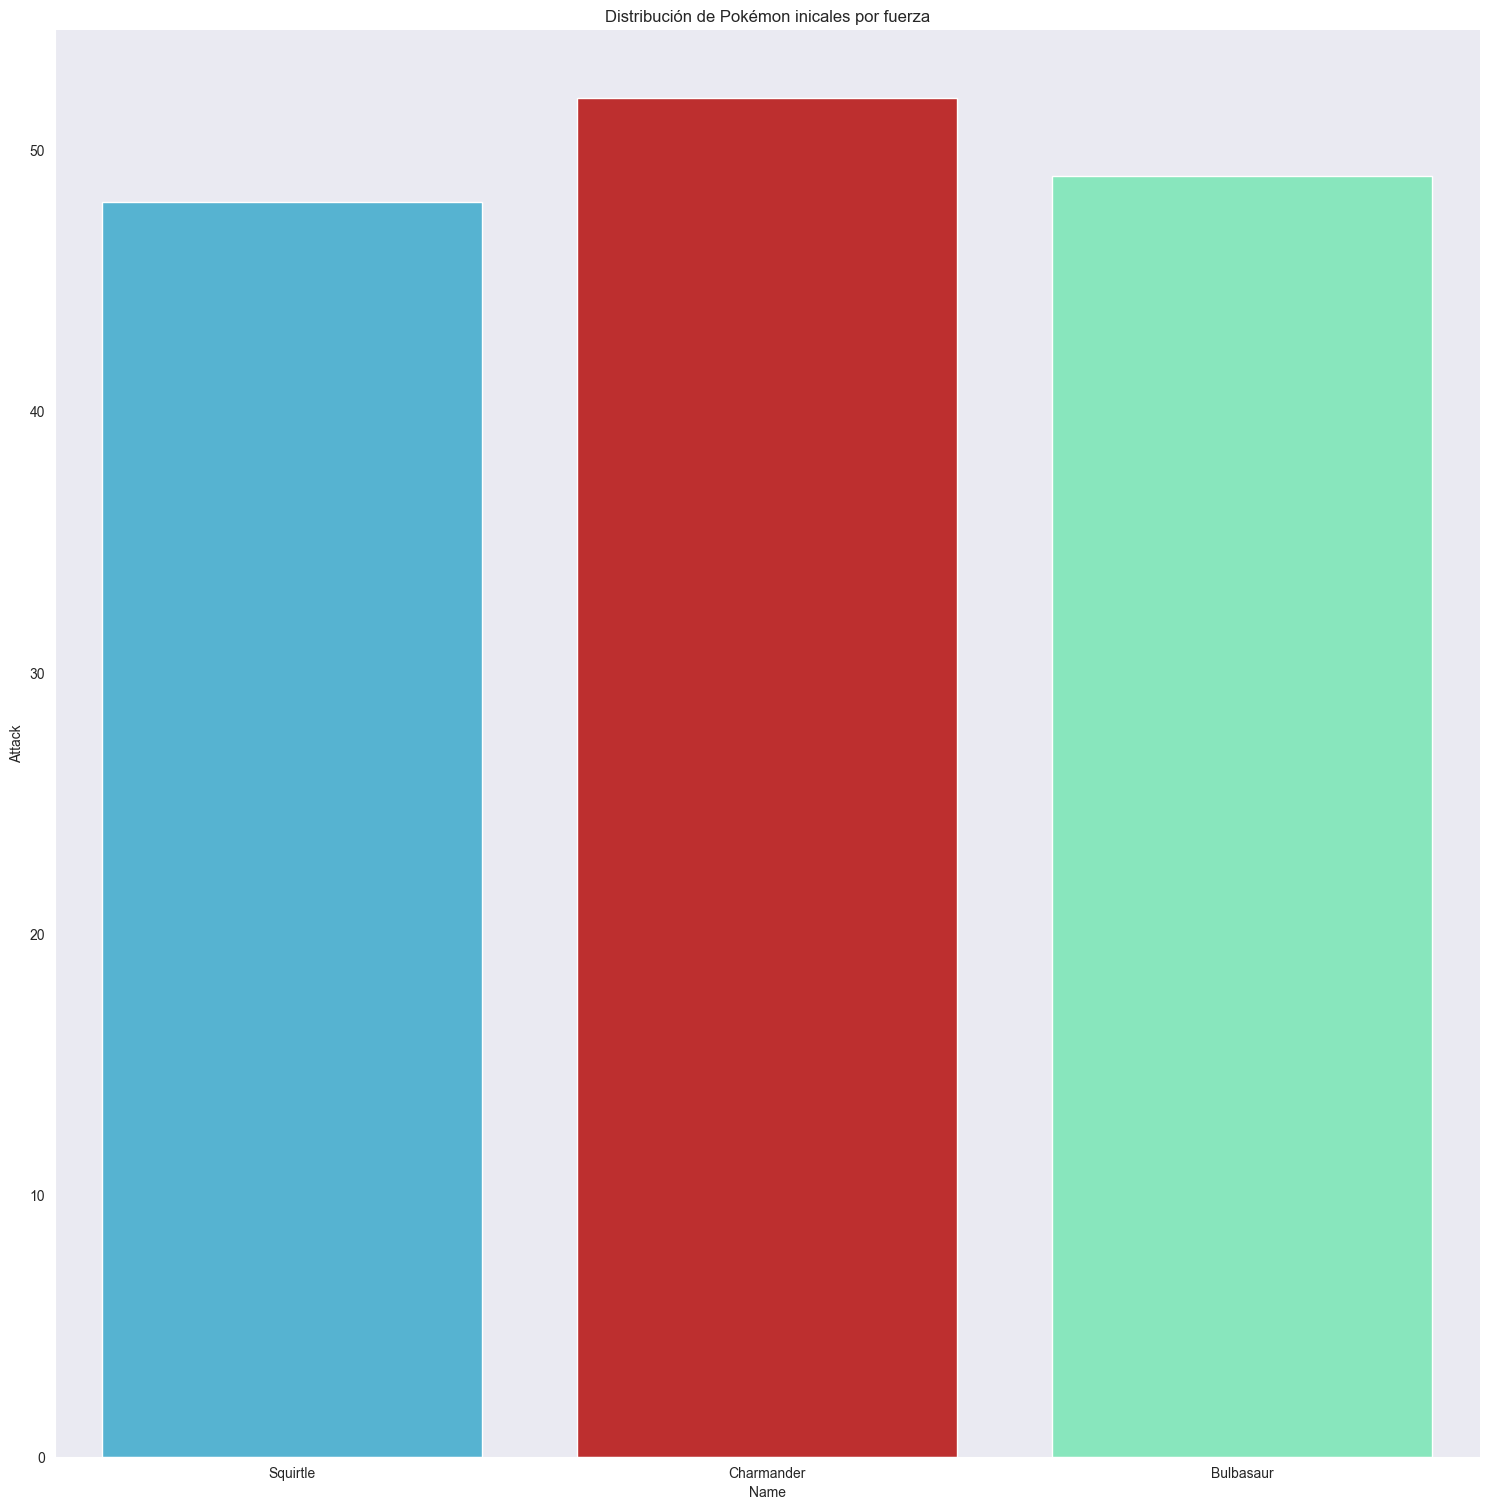

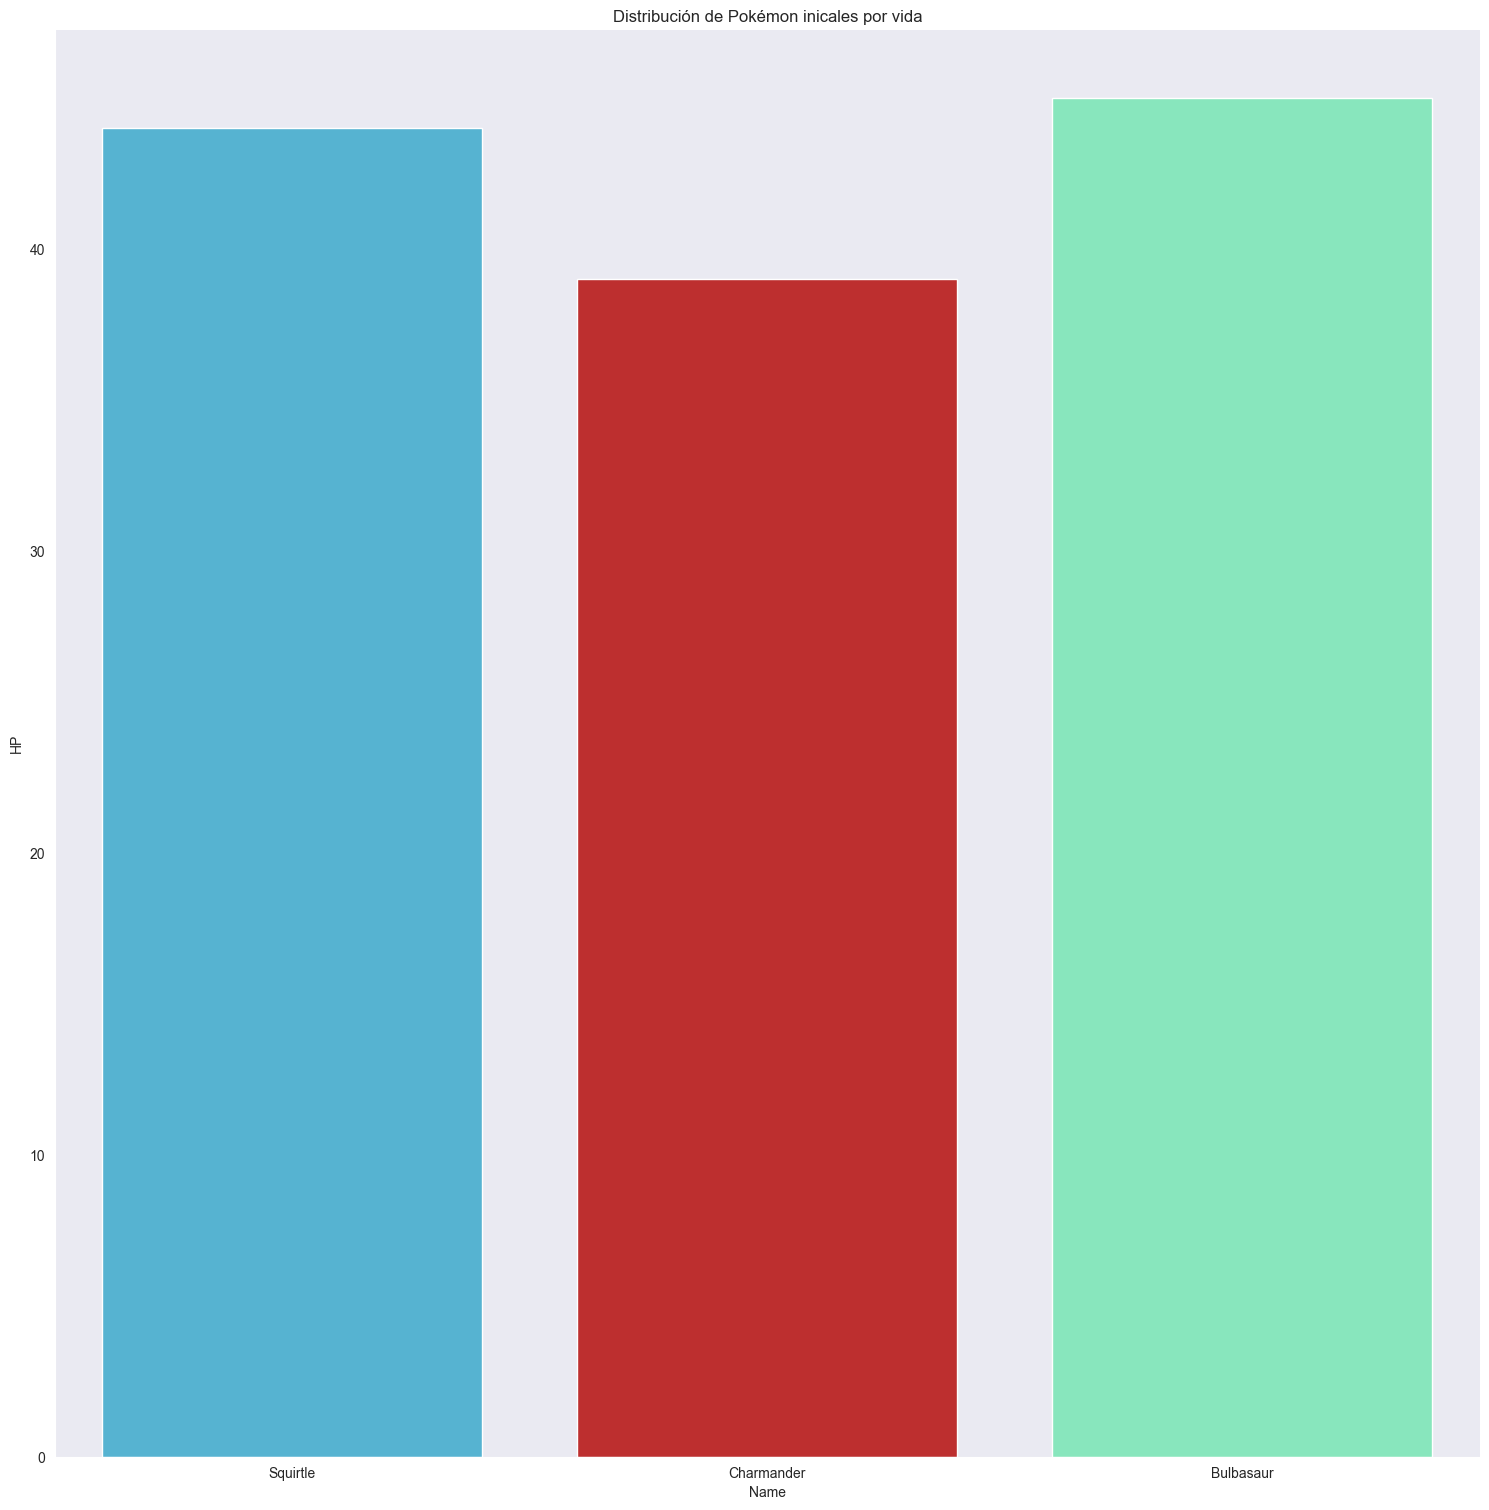

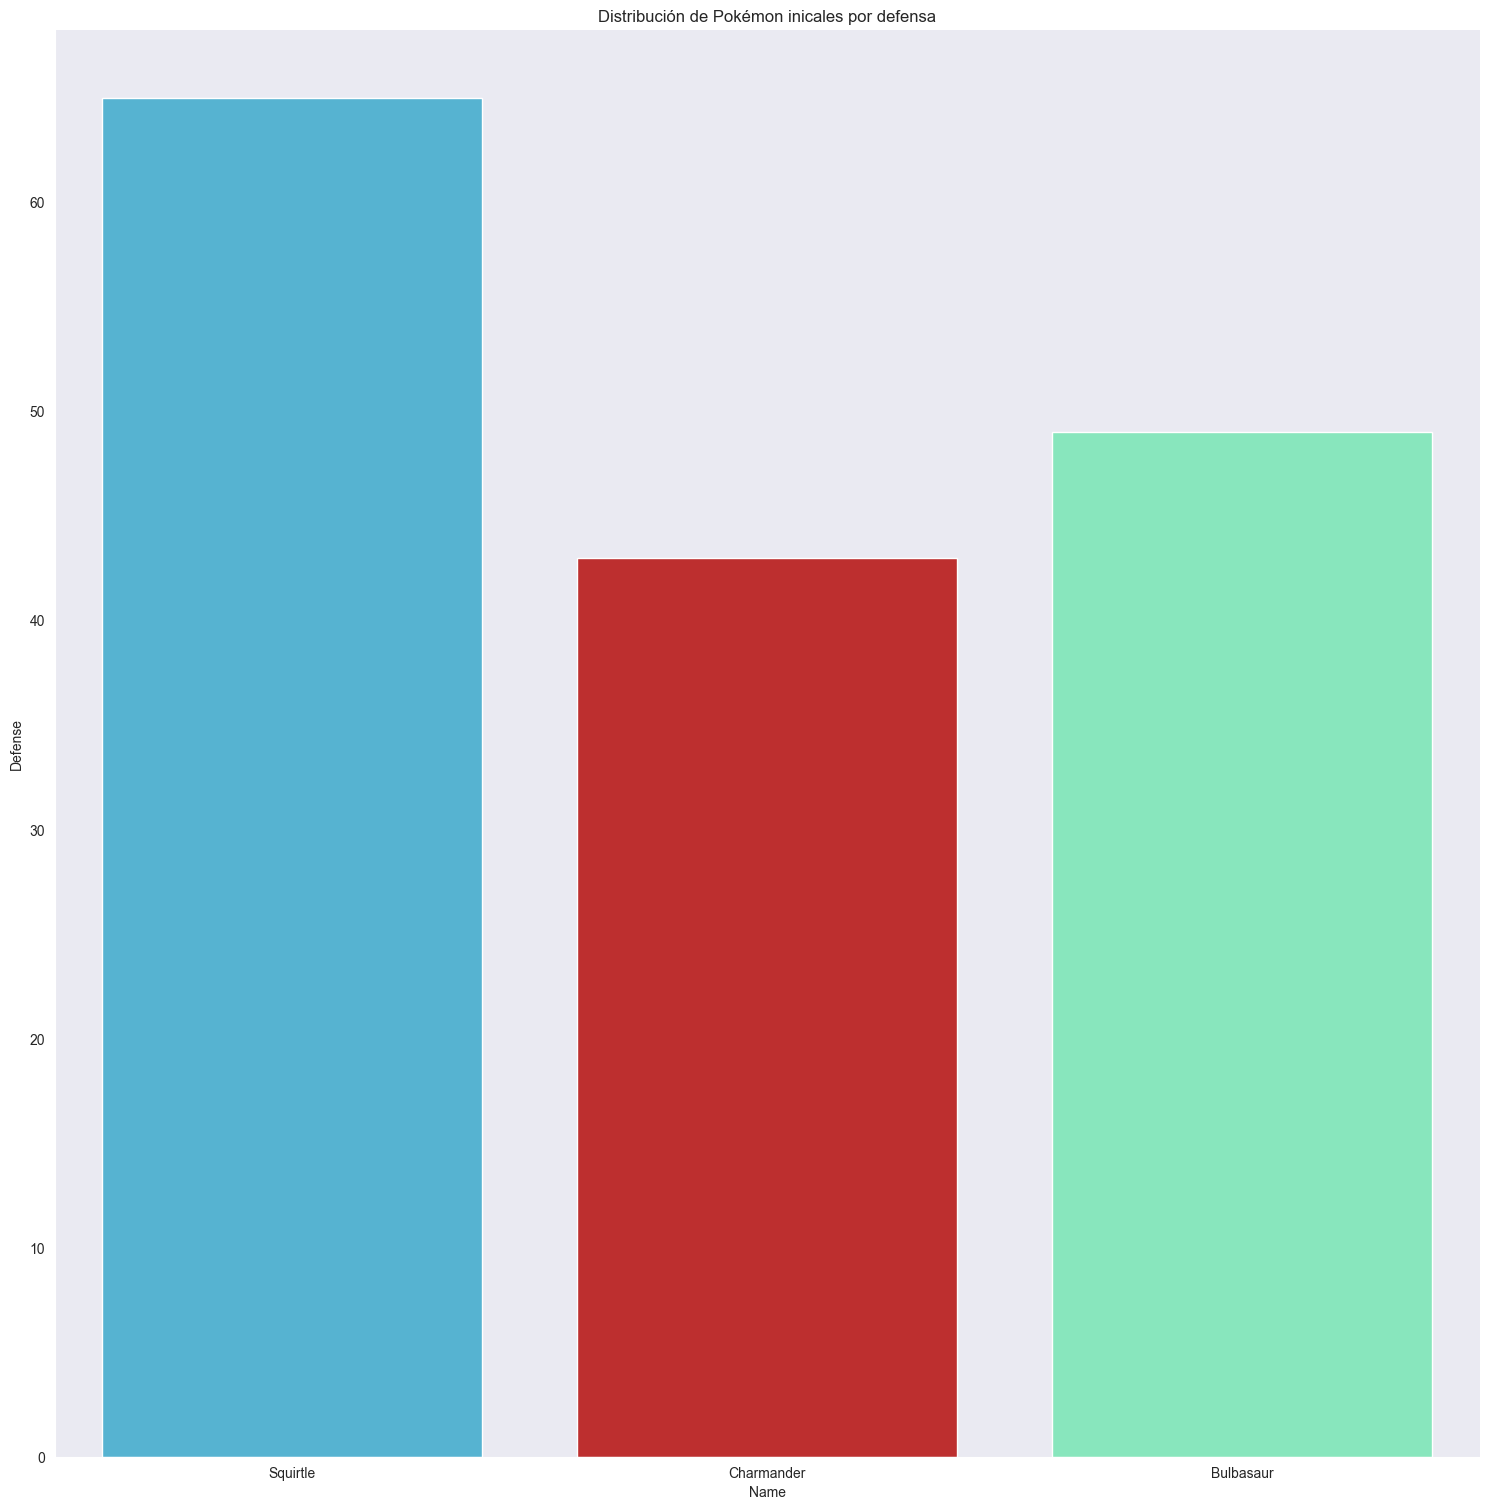

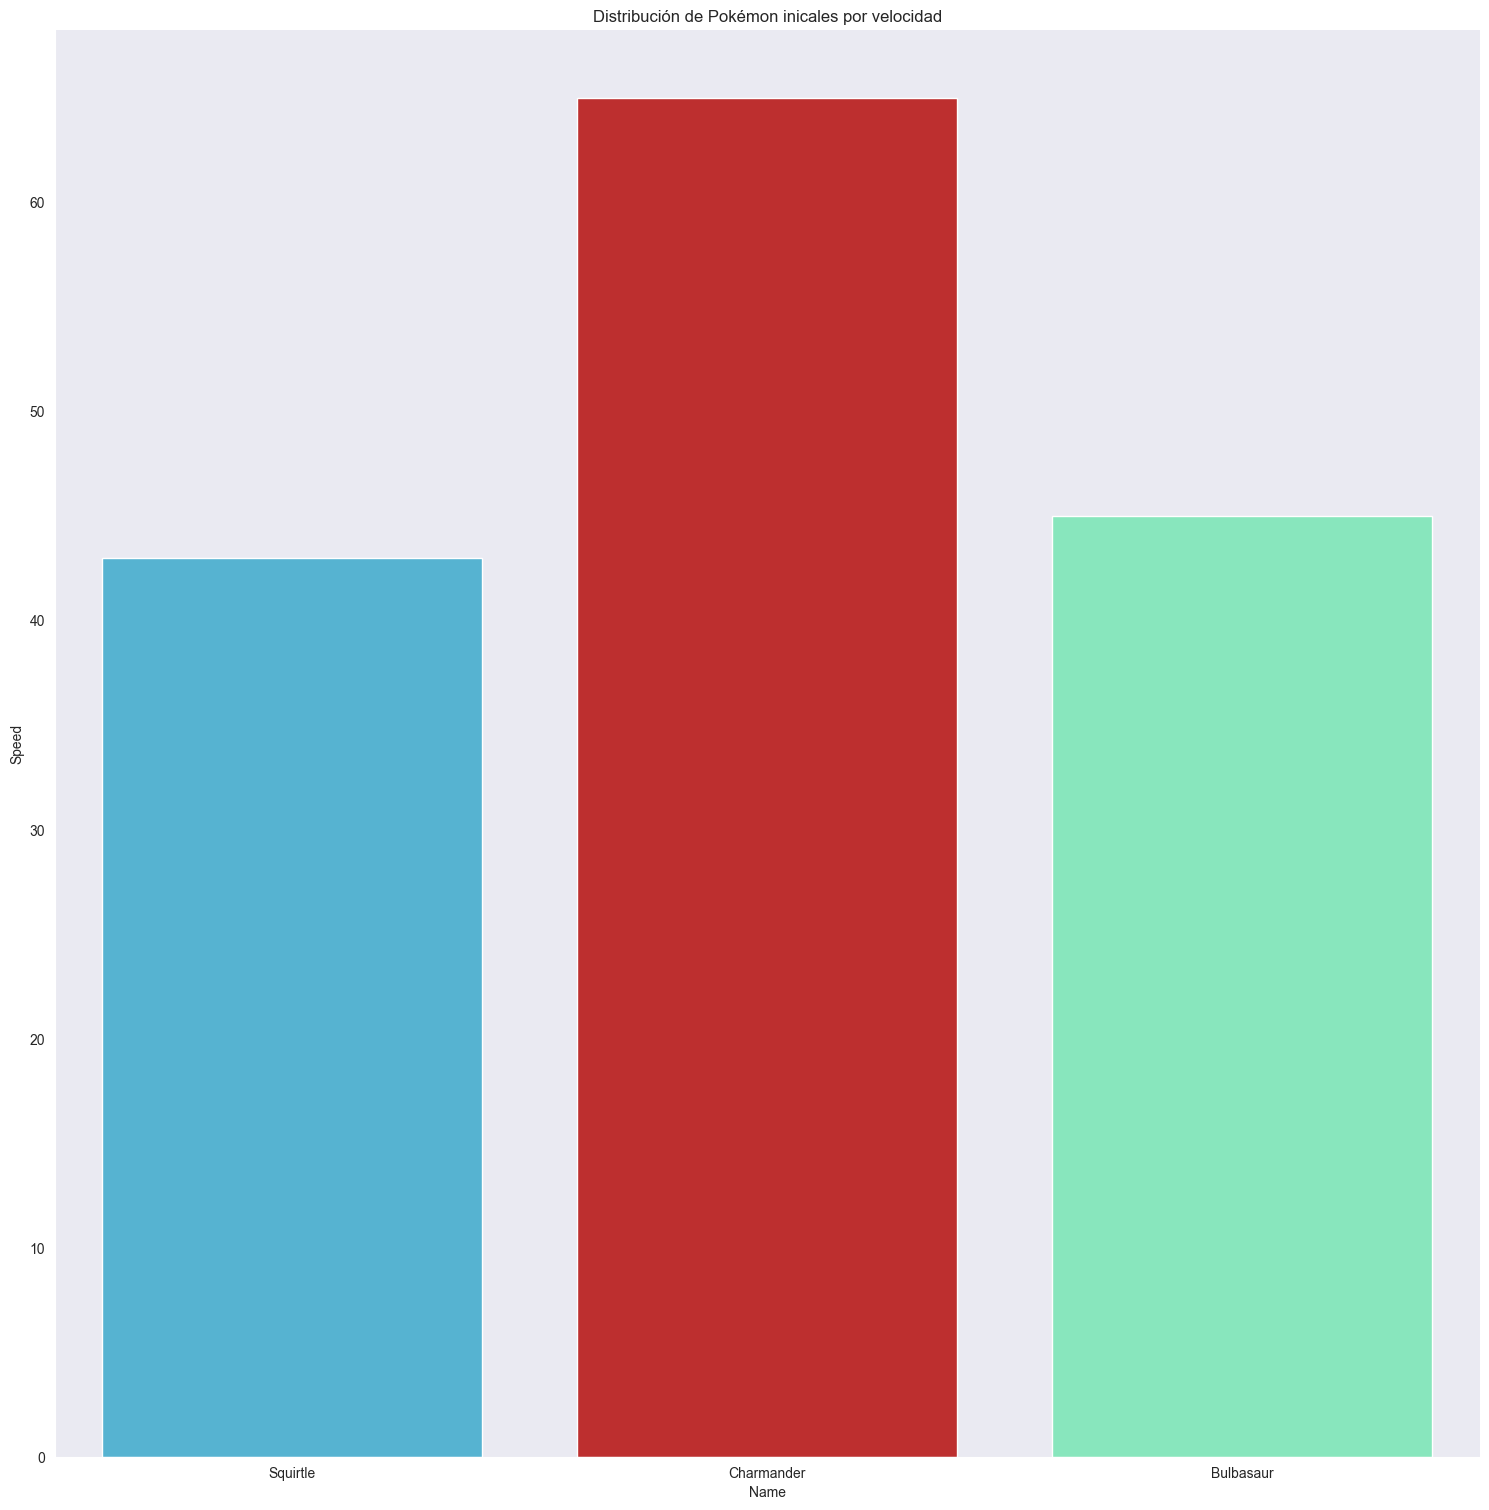

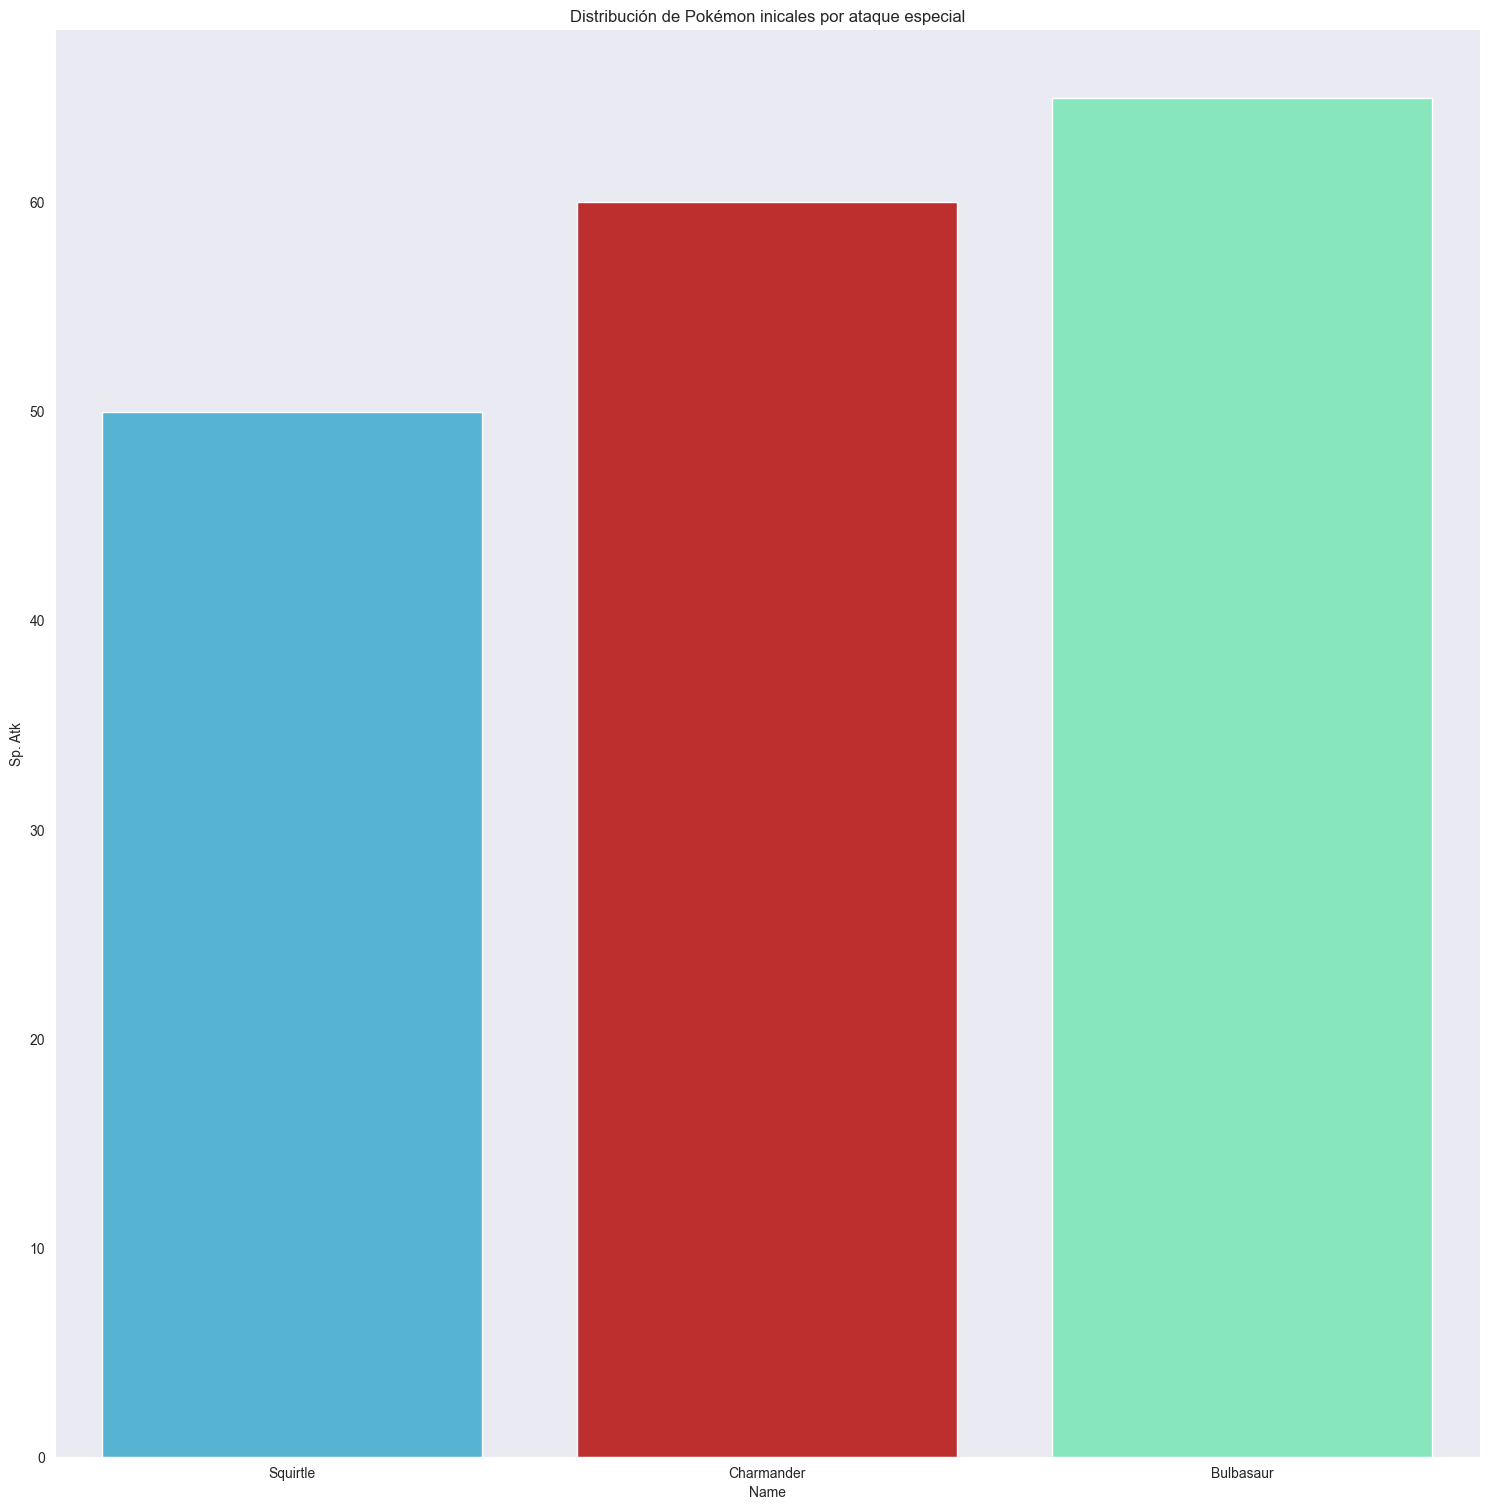

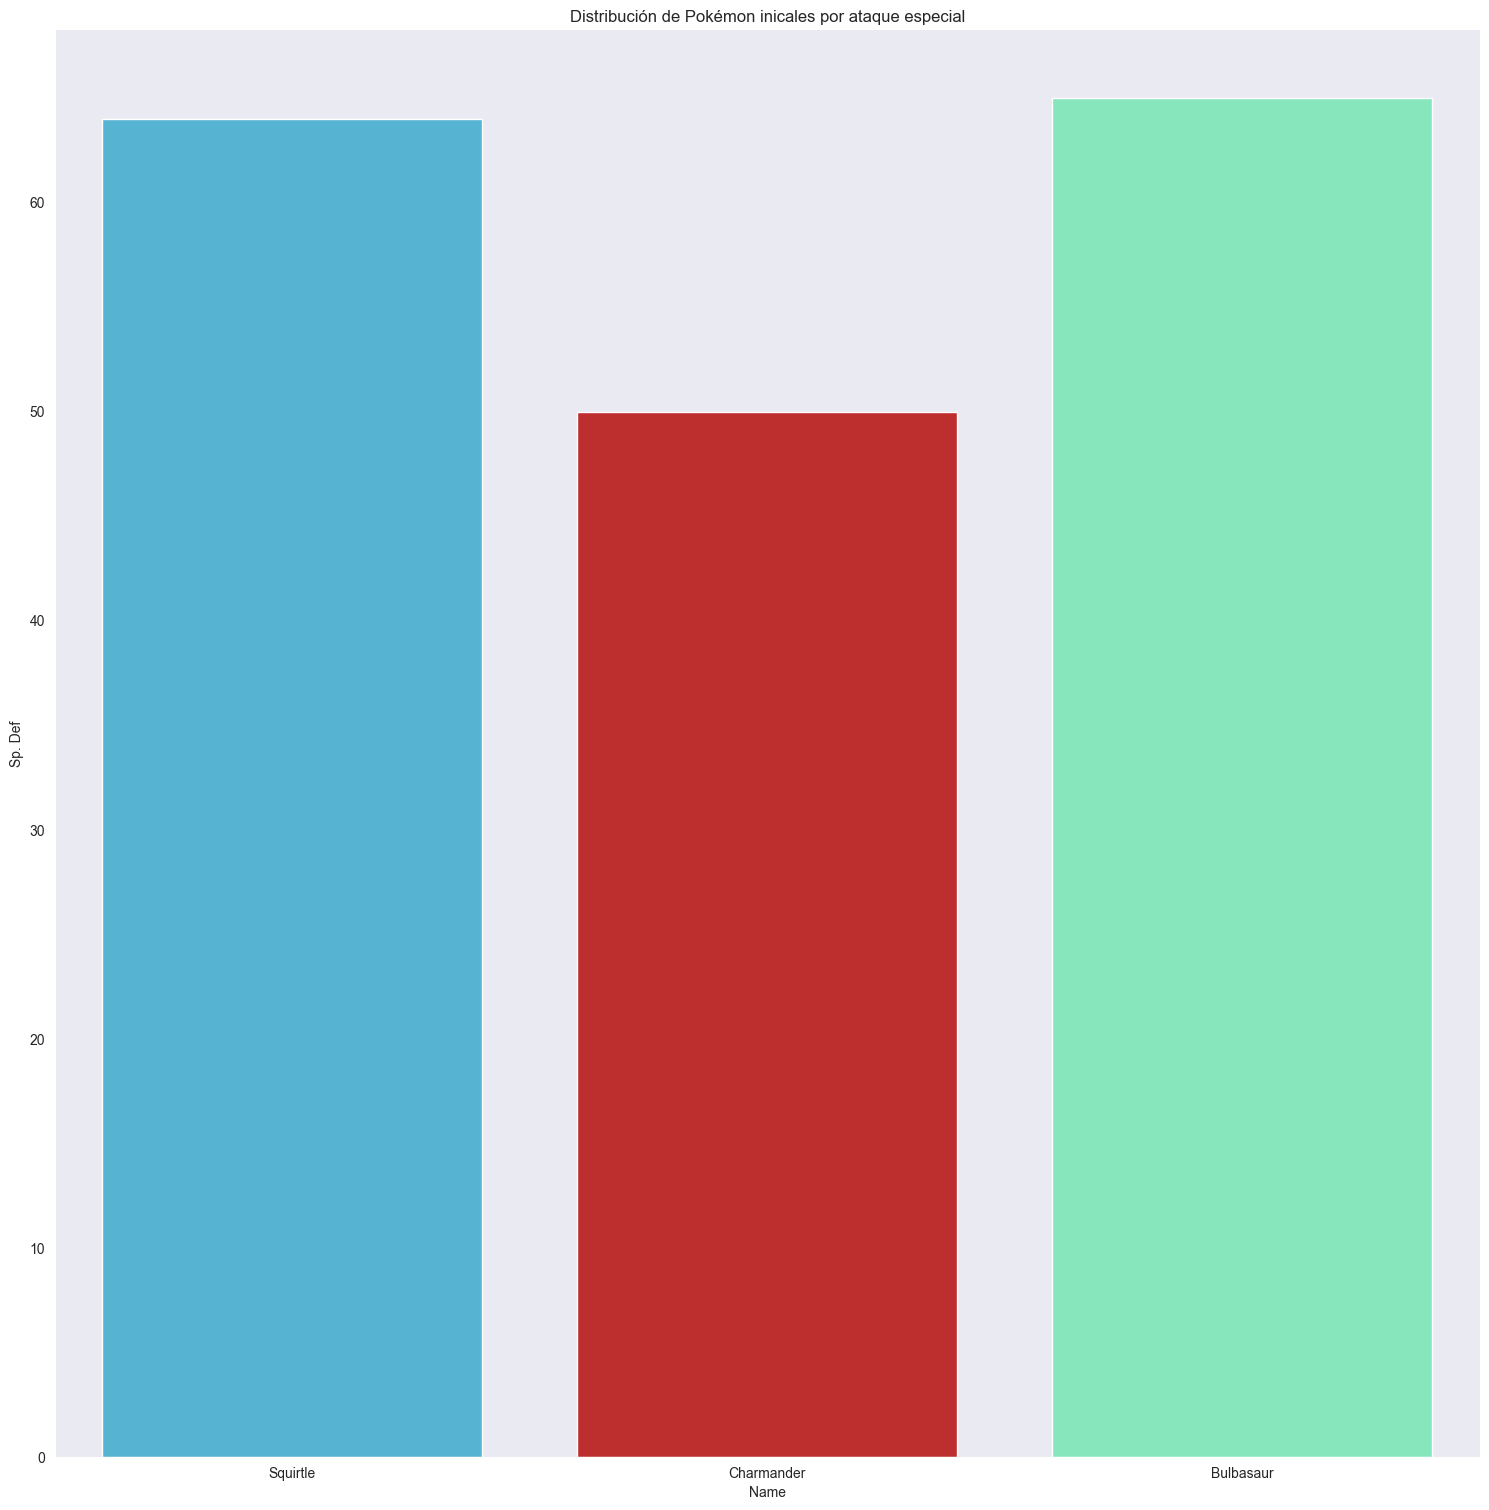

In [165]:

#Visualización por Total.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='Total', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por Suma total')

#Visualización por fuerza.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='Attack', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por fuerza')

#Visualización por vida.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='HP', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por vida')

#Visualización por defensa.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='Defense', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por defensa') 

#Visualización por velocidad.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='Speed', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por velocidad')

#Visualización por SP.Atk.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='Sp. Atk', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por ataque especial')

#Visualización por Sp. Def.
sns.catplot(best_ini, x= 'Name', hue='Name',legend=False, y='Sp. Def', palette=['#41bee6', '#d51717', '#79f5bf'], kind="bar", height = 15) 
plt.title('Distribución de Pokémon inicales por ataque especial')
plt.show()

In [166]:
#Visualización estadisticas tipo video juego. 
PokeFightfull(pokemon, 'Squirtle', 'Charmander', 'Bulbasaur')
plt.show()


---

### x Pikachu x ###

In [167]:
pokemon[pokemon['Name'] == 'Pikachu']

Name    Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
30  Pikachu  Electric      x    320  35      55       40       50       50   

    Speed  Generation  Legendary  
30     90           1      False

In [168]:
#¿Cuantos Pokémon tienen el total más alto que pikachu?
len(pokemon[pokemon['Total'] > 320])

617

In [169]:
#¿Cuantos Pokémon electricos tienen el total más alto que pikachu?
len(pokemon[(pokemon['Type 1'] == 'Electric') & (pokemon['Total']>320)])

36

In [170]:
#¿Cuantos Pokémon tienen el total más bajo que pikachu?
len(pokemon[pokemon['Total'] < 320])

175

In [171]:
#¿Cuantos Pokémon electricos tienen el total más bajo que pikachu?
len(pokemon[(pokemon['Type 1'] == 'Electric') & (pokemon['Total']<320)])

7

In [172]:
#Comparativa visual contra el mejor y el peor electrico.
PokeFightfull(pokemon, 'Pikachu', 'AmpharosMega Ampharos', 'Pichu')
plt.show()

C:\Users\borja\AppData\Local\Temp\ipykernel_15456\1035521072.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



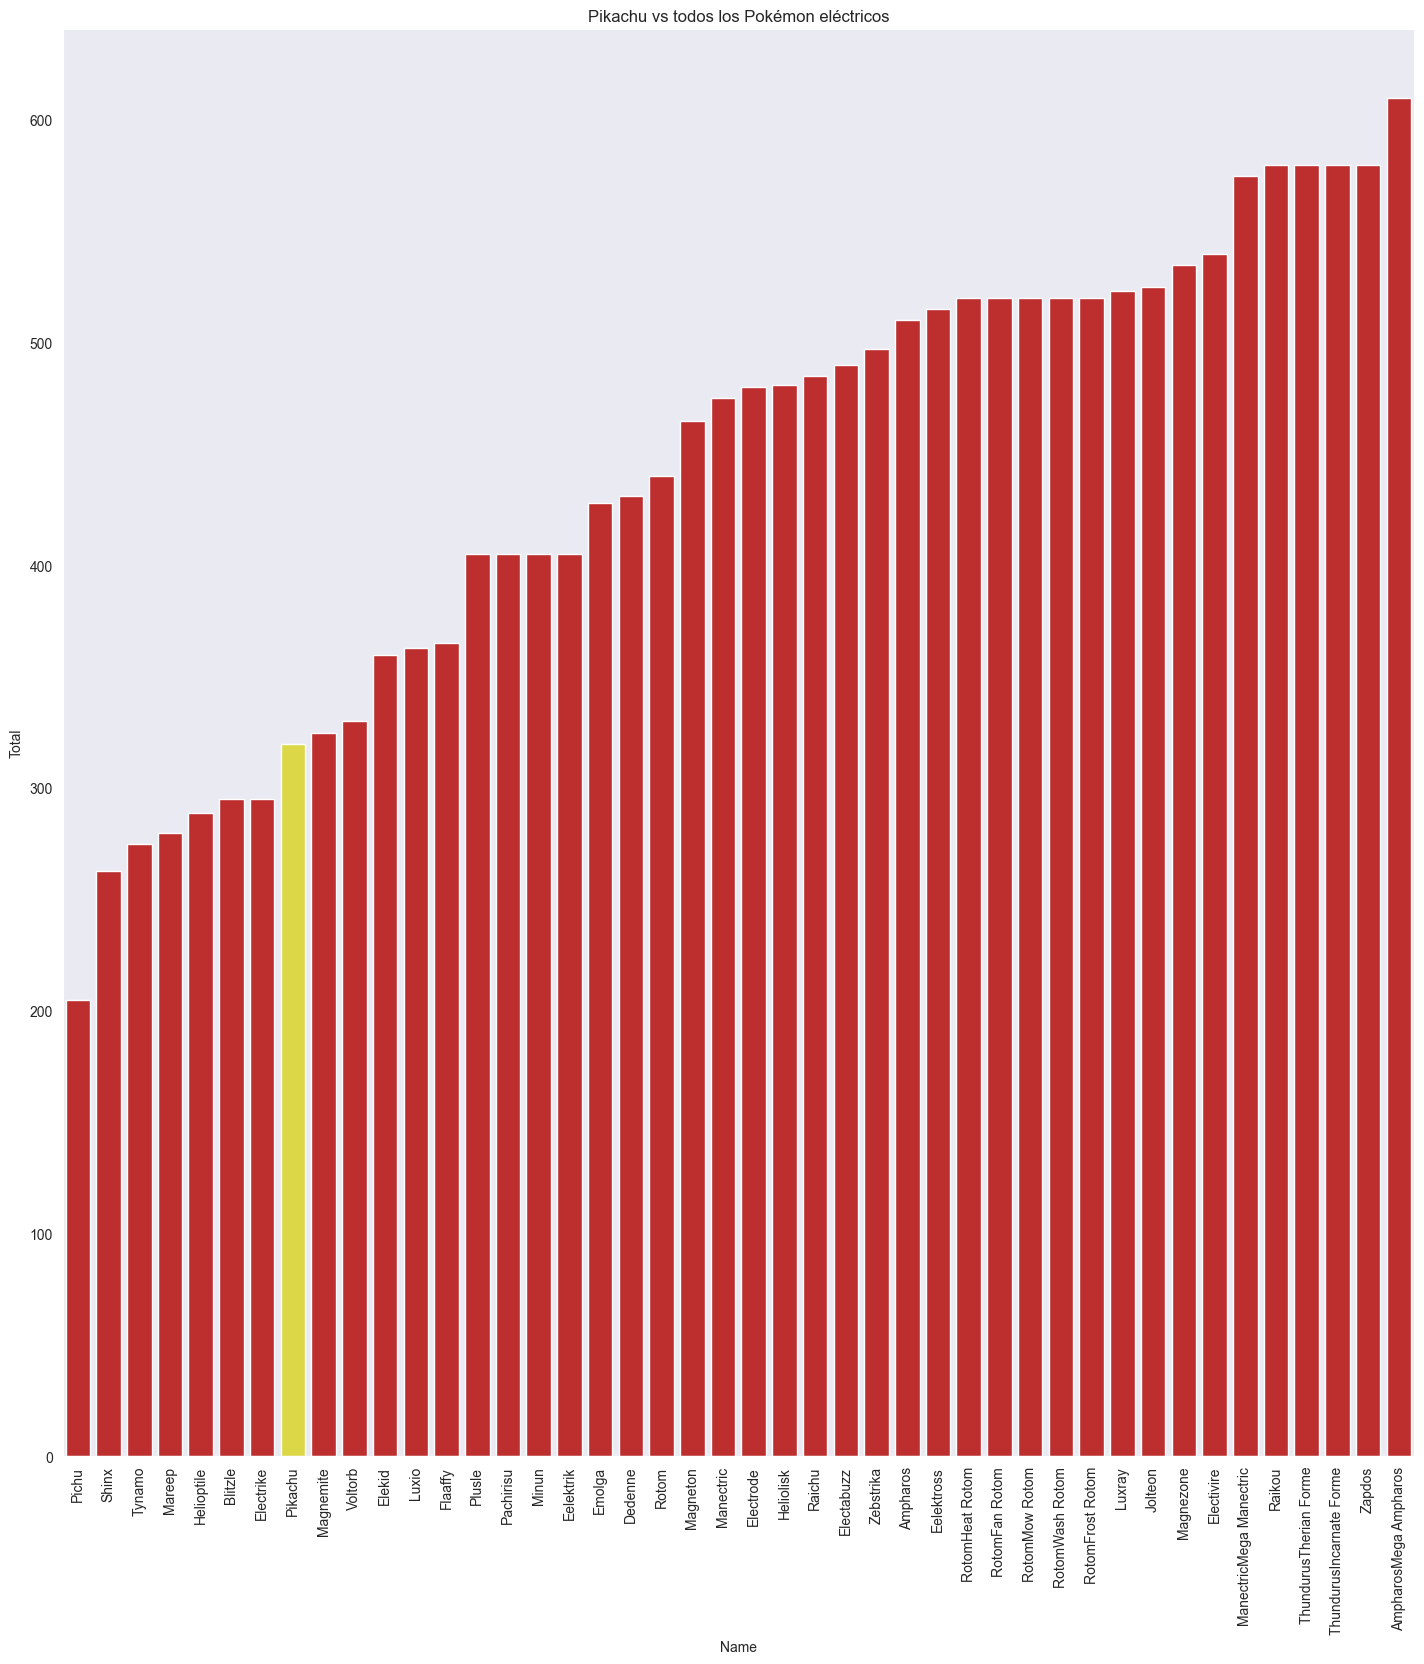

In [173]:
#Comparativa visual Pikachu vs los demás electricos.
electric_pokemon = pokemon[pokemon['Type 1'] == 'Electric']
electric_pokemon['pikachu'] = electric_pokemon['Name'].apply(lambda x: 'Pikachu' if x == 'Pikachu' else 'Others')
order_pika = electric_pokemon.groupby('Name')['Total'].mean().sort_values(ascending=True).index
sns.catplot(electric_pokemon, x= 'Name', hue='pikachu',order=order_pika, legend=False, y='Total', palette=['#f4ee2d', '#d51717'], kind="bar", height = 15) 
plt.xticks(rotation = 90)
plt.title('Pikachu vs todos los Pokémon eléctricos') 
plt.show()


No se puede decir que Pikachu destaque en su totalidad de estadisticas siendo el 8º peor Pokémon electrico.

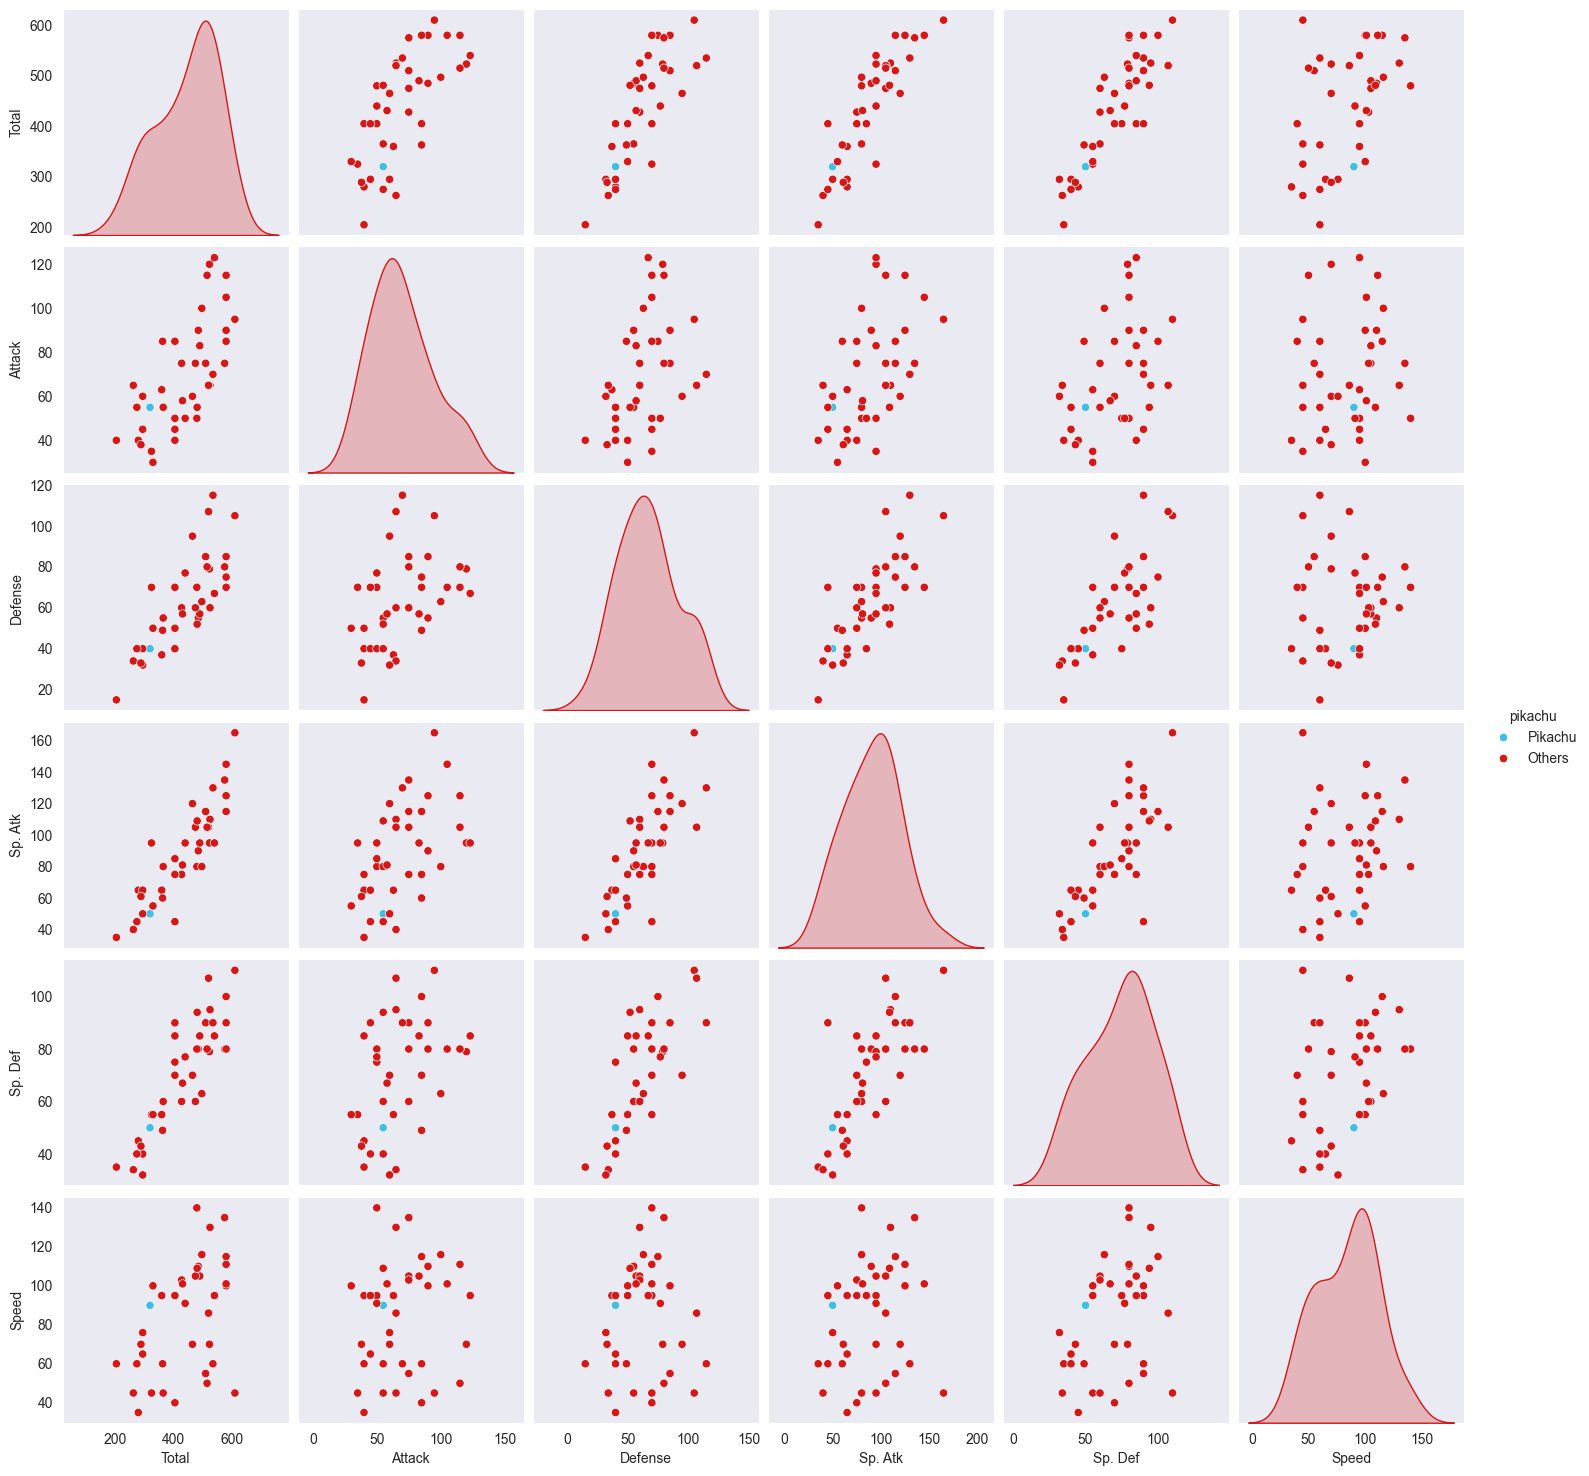

In [174]:

sns.pairplot(electric_pokemon, vars=['Total', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
             hue='pikachu', palette=['#41bee6', '#d51717'])
plt.show()

En esta comparativa se ve aun mejor como Pikachu no destaca en nada en niguna de sus estadisticas. 

---